In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [17]:
df=pd.read_csv("weatherAUS.csv")

pd.set_option("display.max_columns", None)
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.073773,146.913526
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.073773,146.913526
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.073773,146.913526
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.073773,146.913526
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.073773,146.913526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-25.345554,131.036961
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-25.345554,131.036961
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-25.345554,131.036961
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-25.345554,131.036961


In [18]:
num_vars= [parameter for parameter in df.columns if df[parameter].dtypes !='O']
dis_vars=[parameter for parameter in num_vars if len(df[parameter].unique())<25]
cont_vars=[parameter for parameter in num_vars if parameter not in dis_vars]
cat_vars=[parameter for parameter in df.columns if parameter not in num_vars]

In [19]:
print("num_vars.count is {}".format(len(num_vars)))
print("dis_vars.count is {}".format(len(dis_vars)))
print("cont_vars.count is {}".format(len(cont_vars)))
print("cat_vars.count is {}".format(len(cat_vars)))

num_vars.count is 18
dis_vars.count is 2
cont_vars.count is 16
cat_vars.count is 7


In [20]:
#len(df['WindGustDir'].unique())

In [21]:
df.isnull().sum()*100/len(df)
# this gives the percentage of missing values in each column


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Latitude          0.000000
Longitude         0.000000
dtype: float64

In [22]:
for col in num_vars:
        df[col].fillna(df[col].mean(), inplace=True)
    
    # Impute missing values in categorical columns with mode
for col in cat_vars:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Garima\AppData\Local\Temp\ipykernel_4632\3763912488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Garima\AppData\Local\Temp\ipykernel_4632\3763912488.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [23]:
df.to_csv('app.csv',index=False)

In [24]:
print(num_vars)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Latitude', 'Longitude']


In [25]:
#creating a function to handle missinng values of column by imputing them
def randomsampleimputation(df,variable):
    df[variable]=df[variable]
    rand_samp=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    rand_samp.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=rand_samp

In [26]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [27]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Latitude         0
Longitude        0
dtype: int64

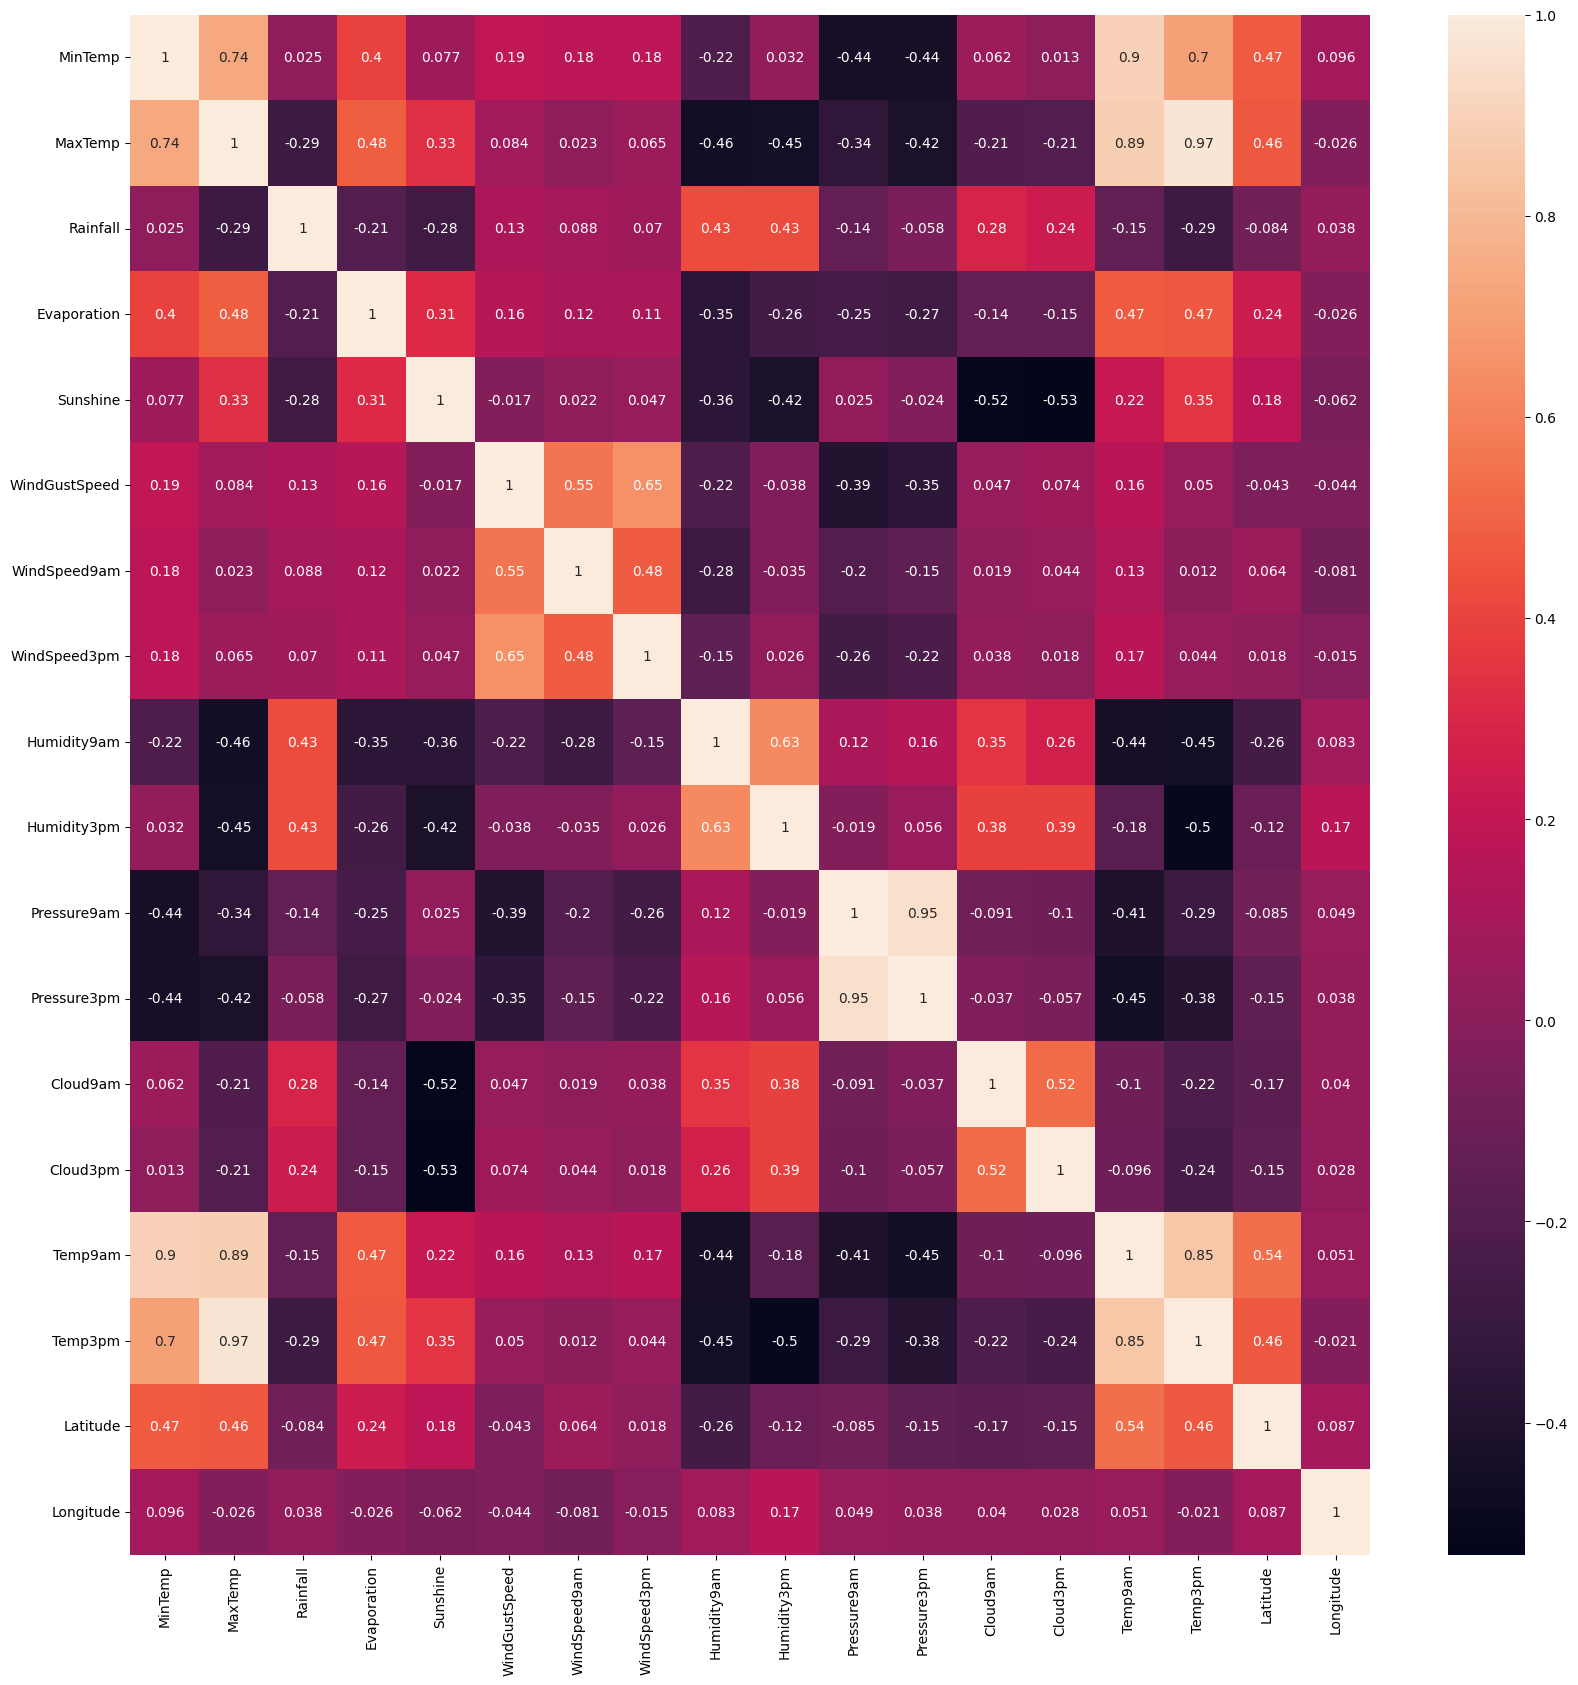

In [28]:

corrmat=df.corr(method="spearman",numeric_only=True)
plt.figure(figsize=(20,20))
heat_map=sns.heatmap(corrmat,annot=True)

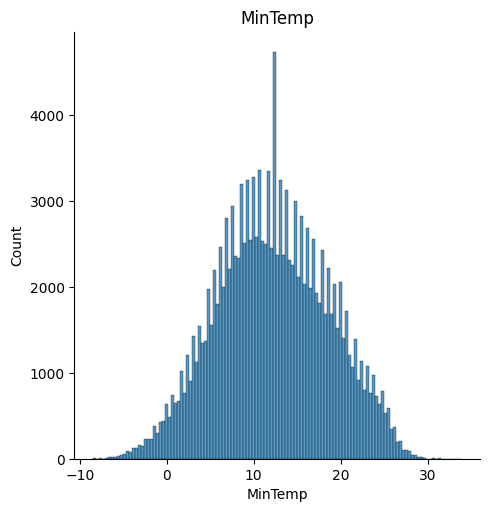

<Figure size 1500x1500 with 0 Axes>

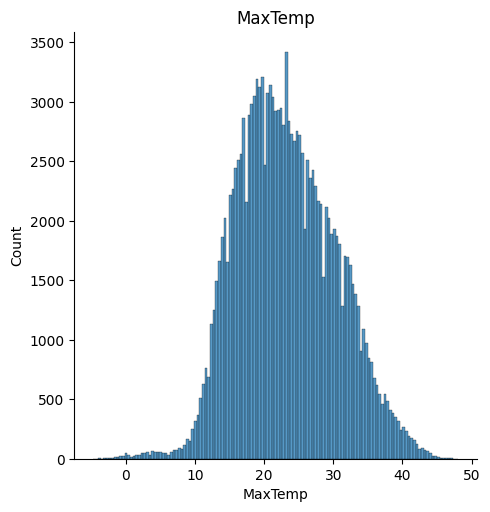

<Figure size 1500x1500 with 0 Axes>

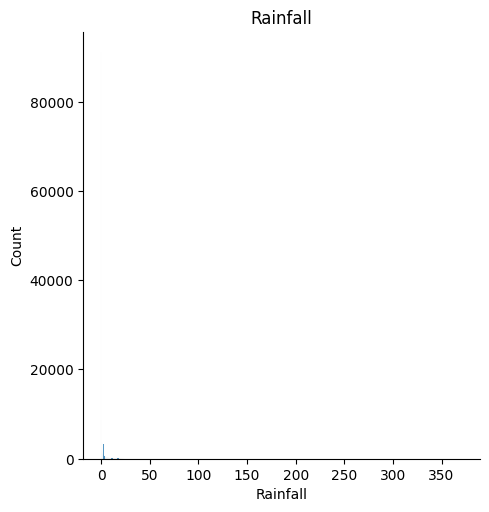

<Figure size 1500x1500 with 0 Axes>

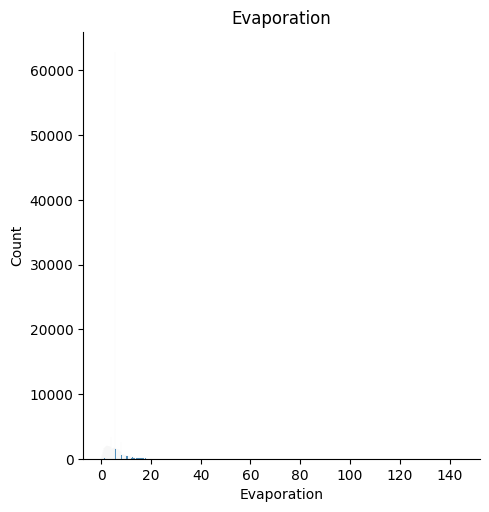

<Figure size 1500x1500 with 0 Axes>

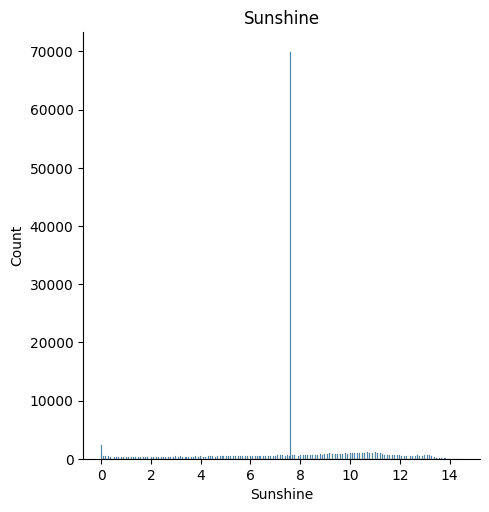

<Figure size 1500x1500 with 0 Axes>

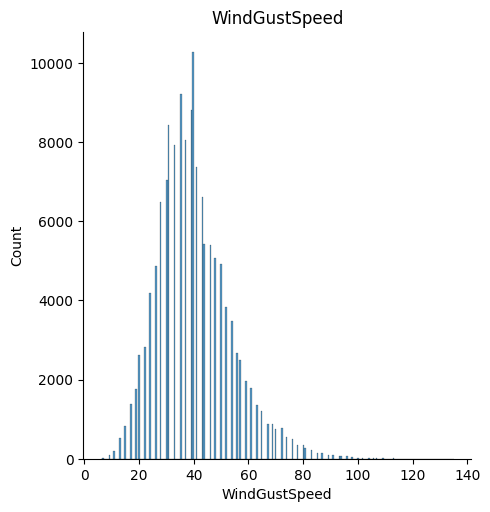

<Figure size 1500x1500 with 0 Axes>

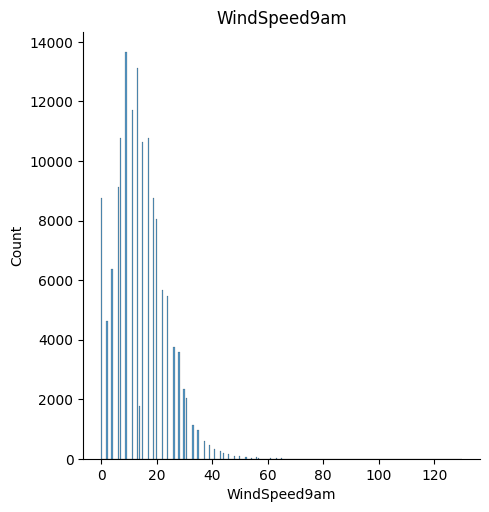

<Figure size 1500x1500 with 0 Axes>

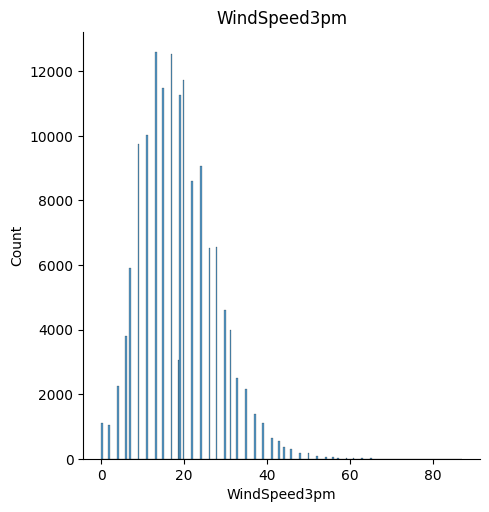

<Figure size 1500x1500 with 0 Axes>

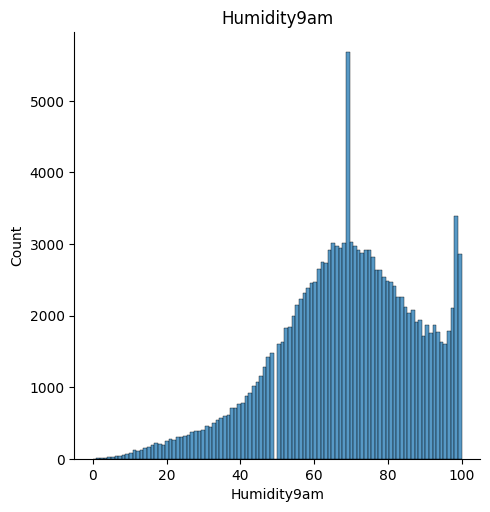

<Figure size 1500x1500 with 0 Axes>

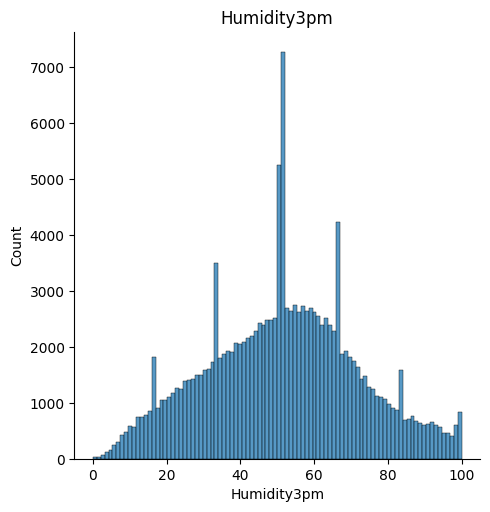

<Figure size 1500x1500 with 0 Axes>

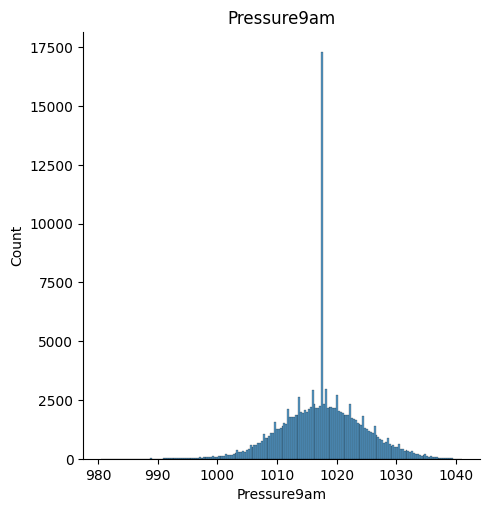

<Figure size 1500x1500 with 0 Axes>

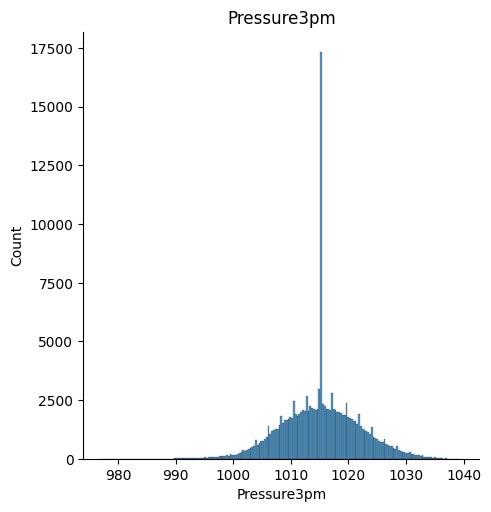

<Figure size 1500x1500 with 0 Axes>

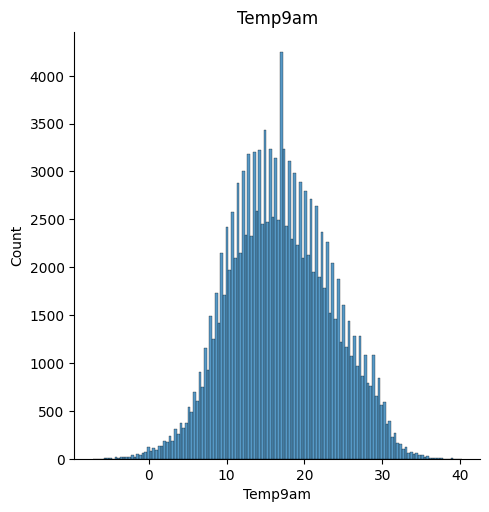

<Figure size 1500x1500 with 0 Axes>

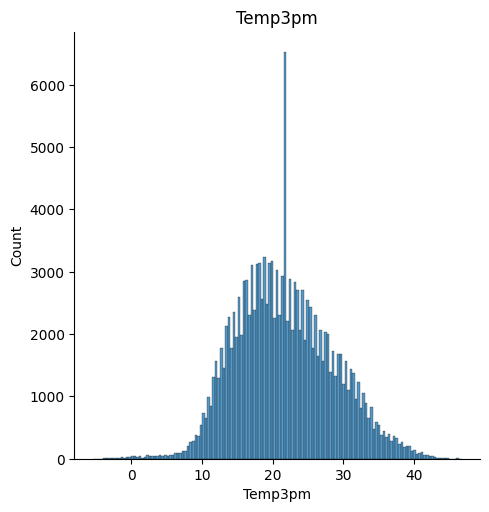

<Figure size 1500x1500 with 0 Axes>

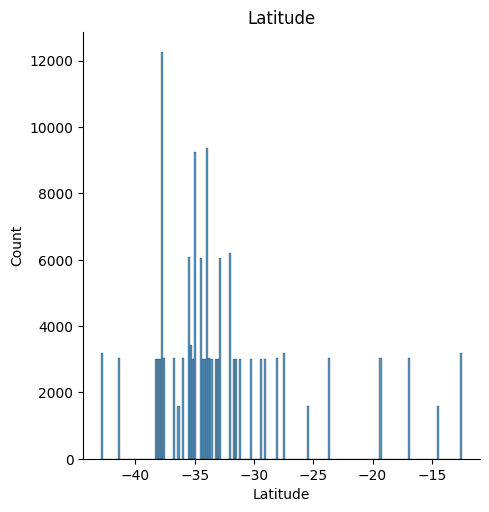

<Figure size 1500x1500 with 0 Axes>

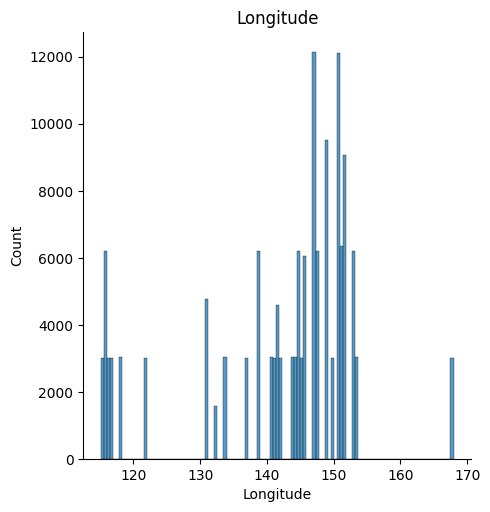

<Figure size 1500x1500 with 0 Axes>

In [29]:

for feature in cont_vars:
    data=df.copy()
    
    sns.displot(df[feature])
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()



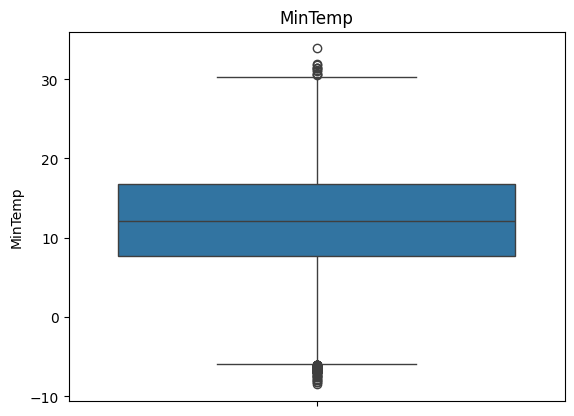

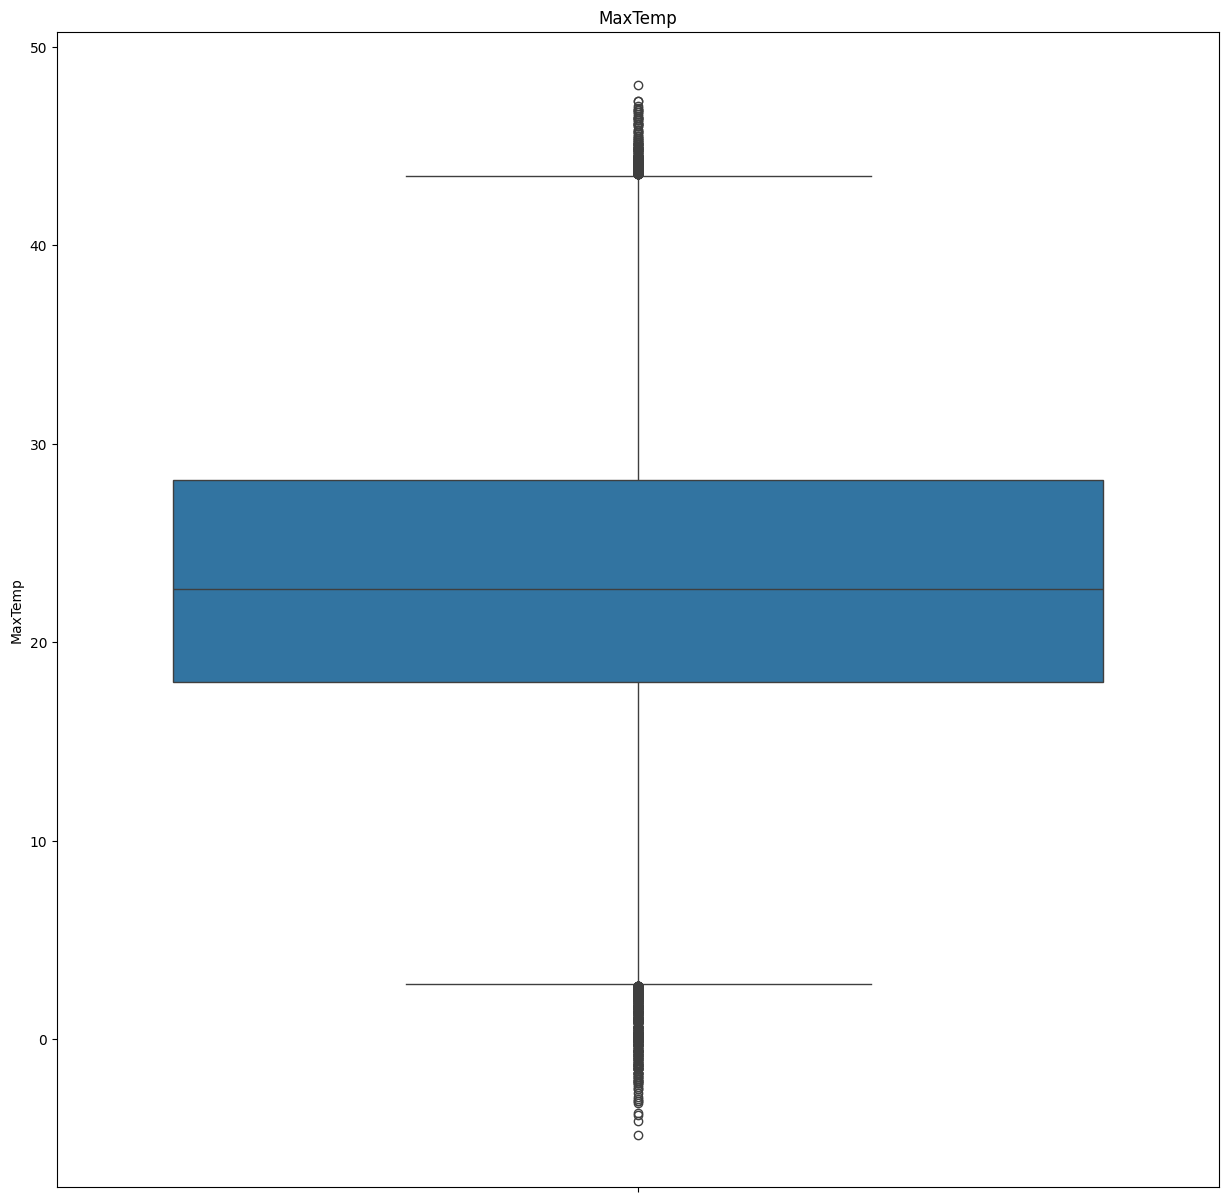

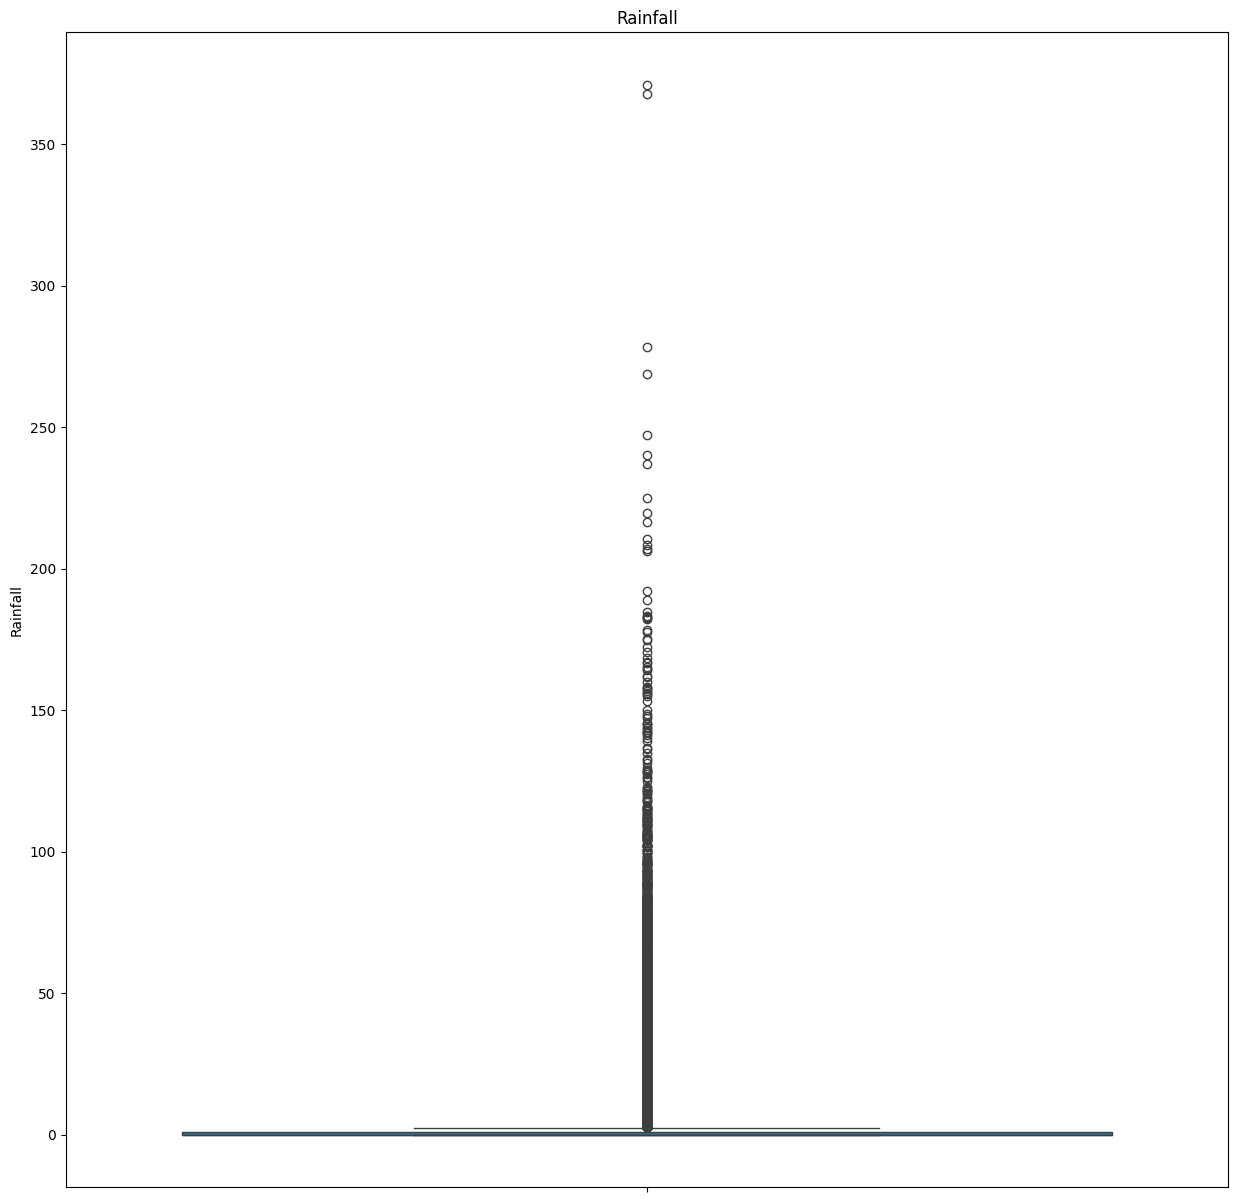

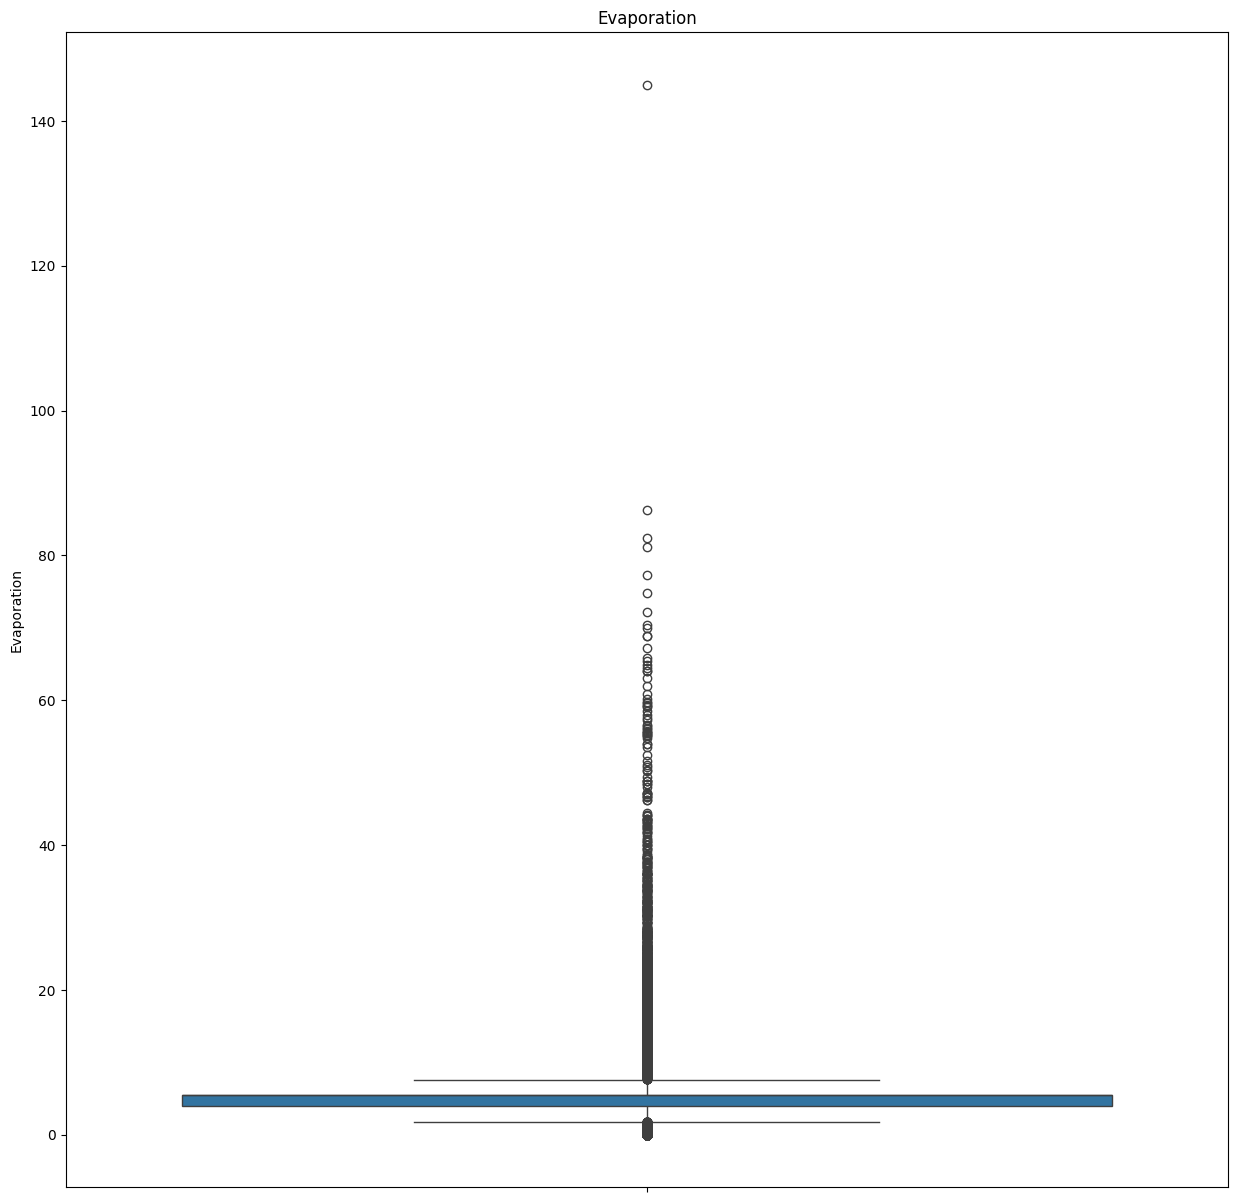

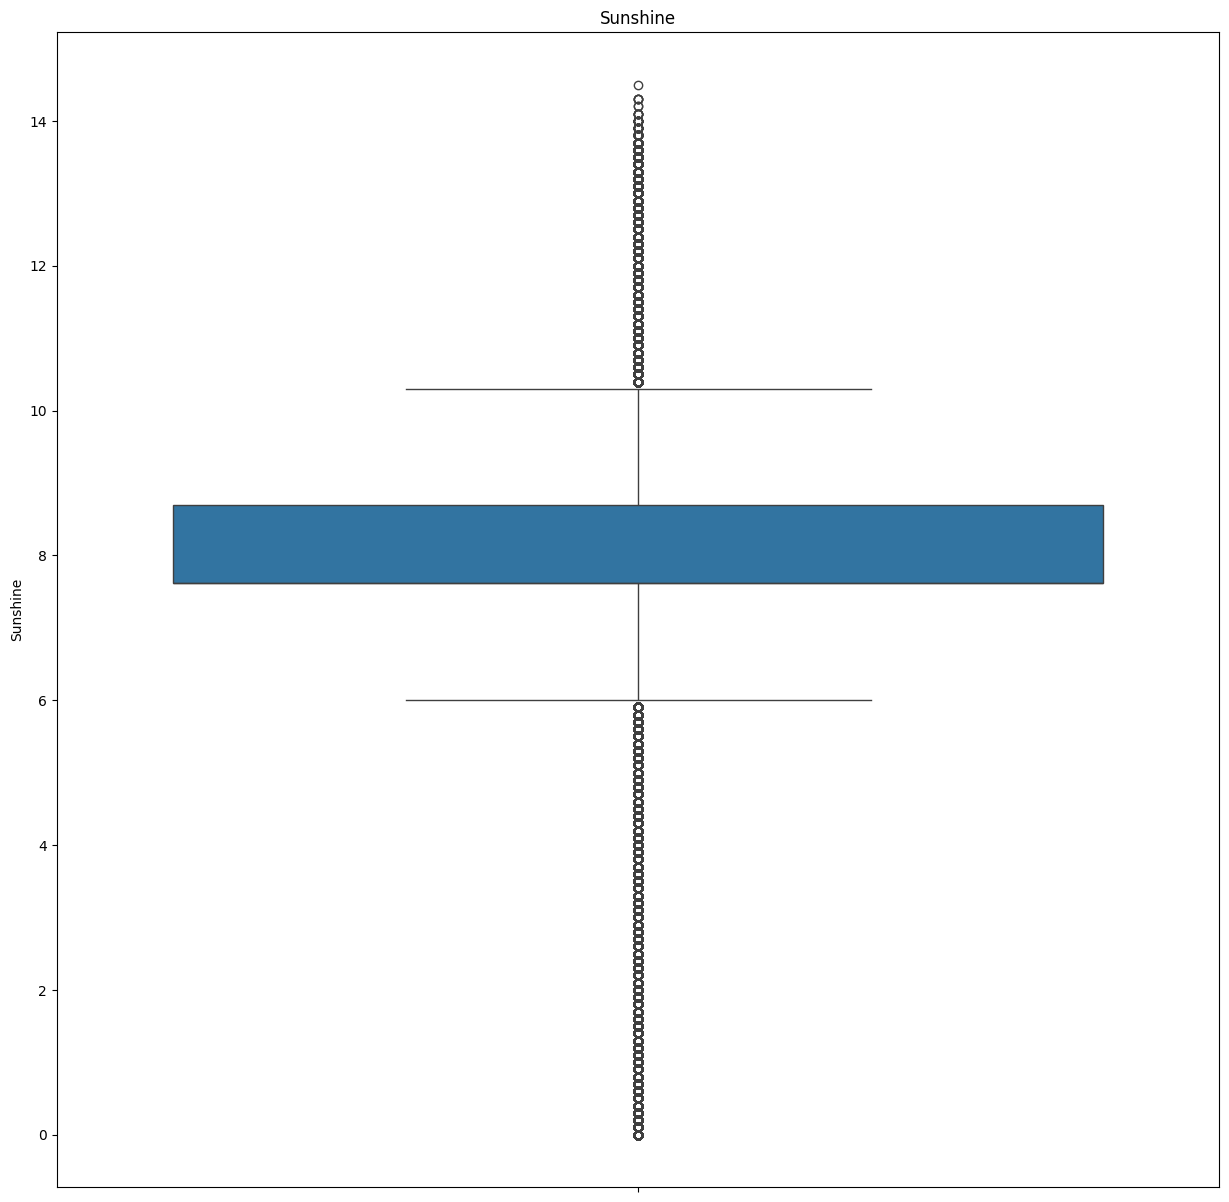

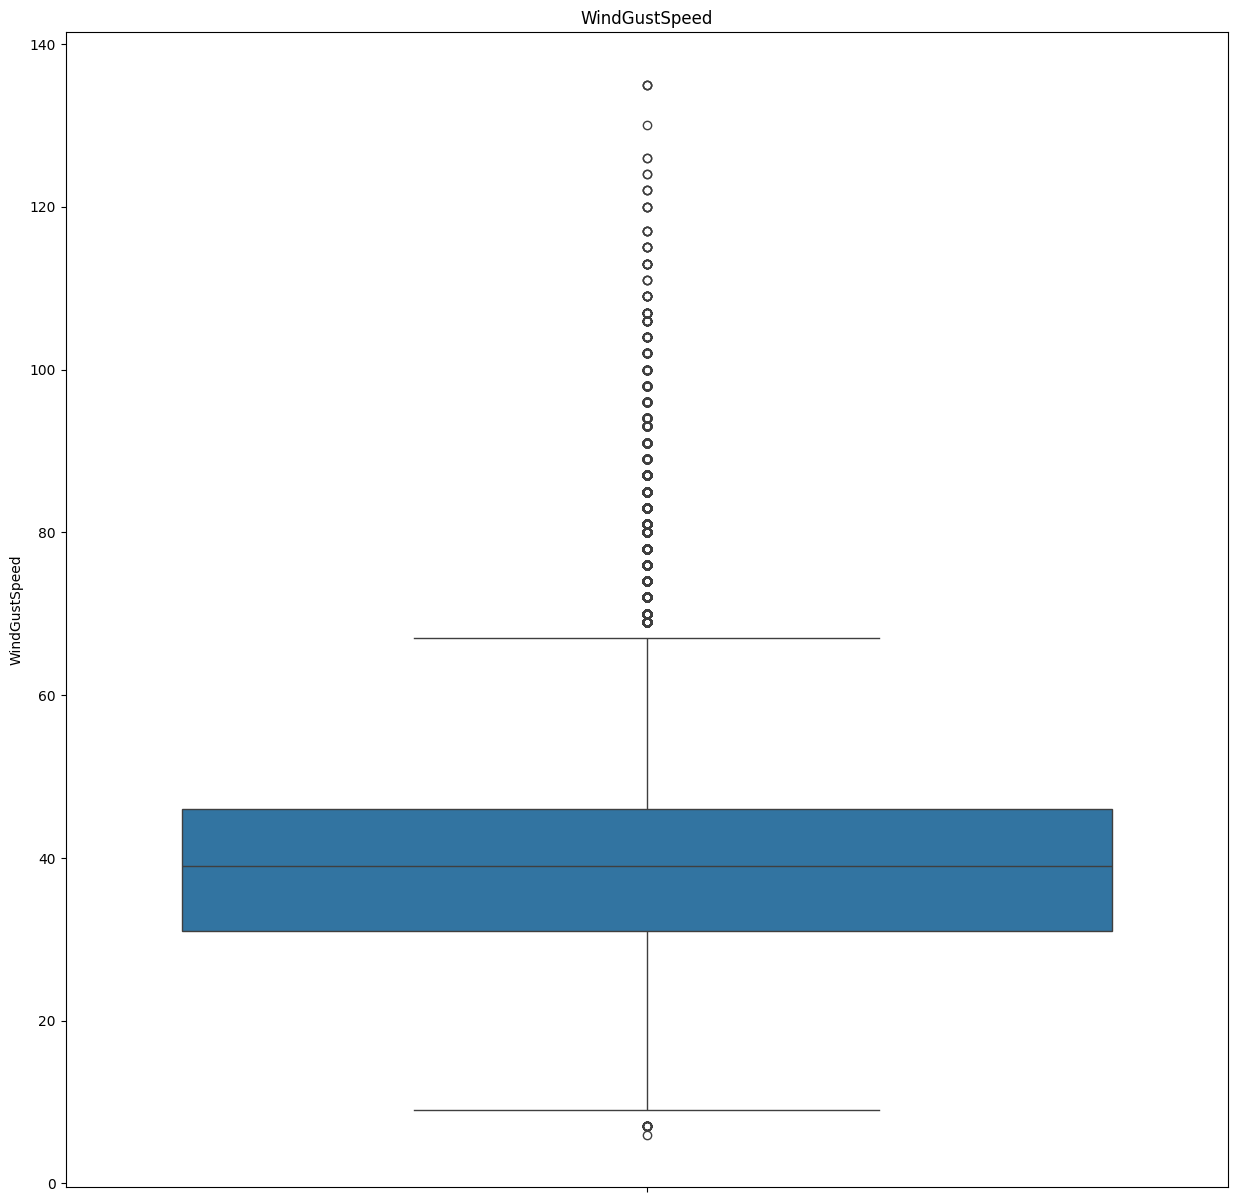

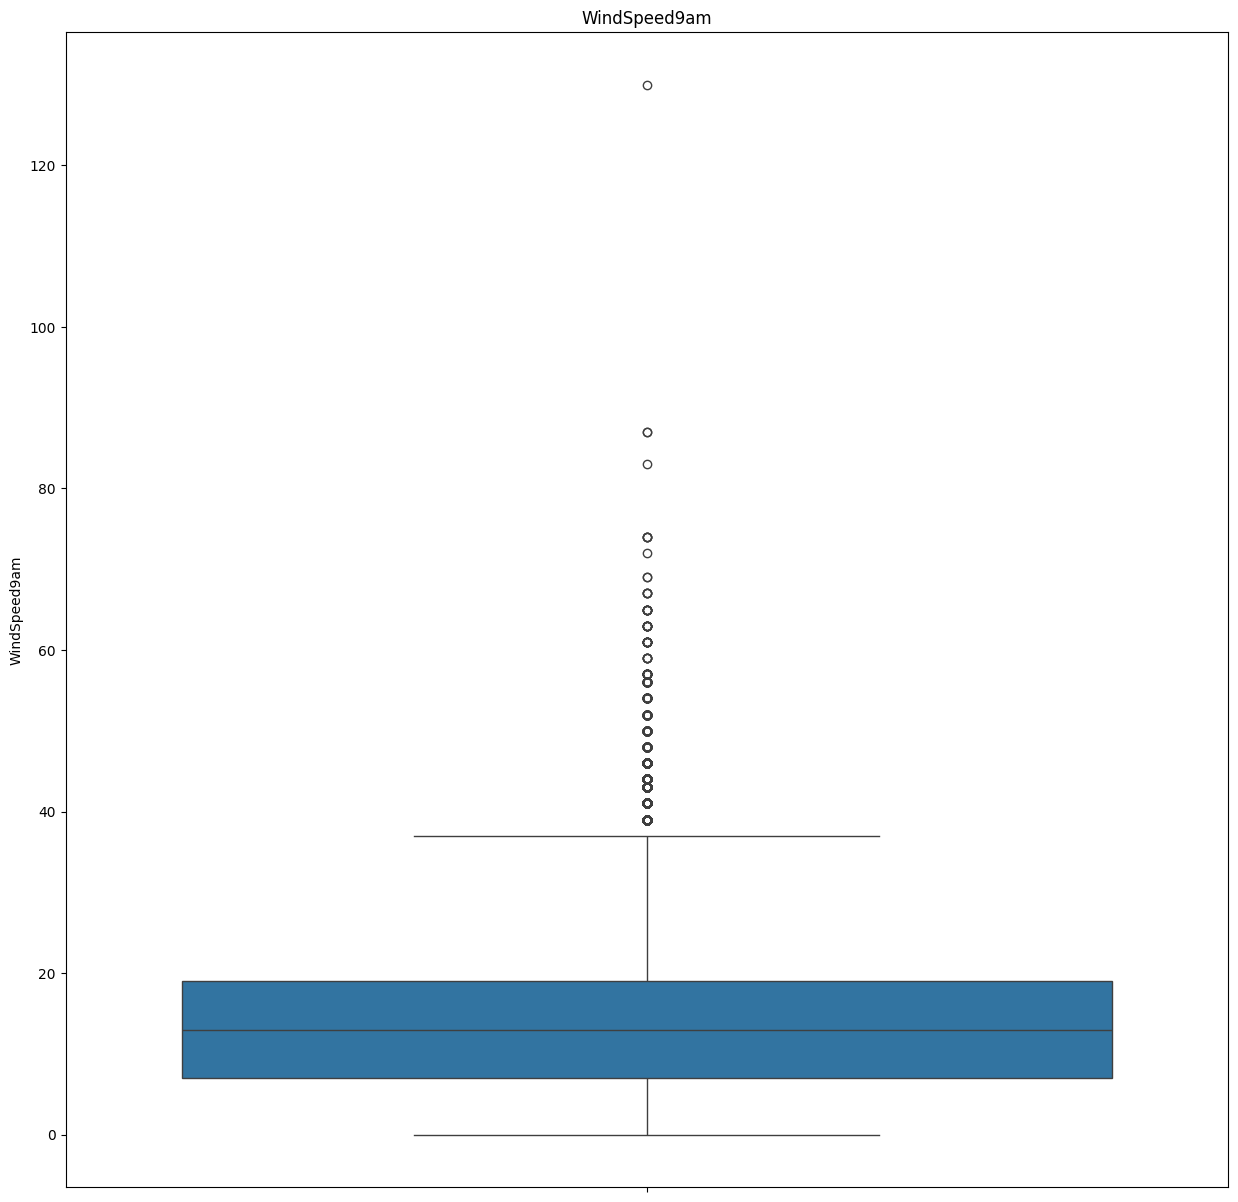

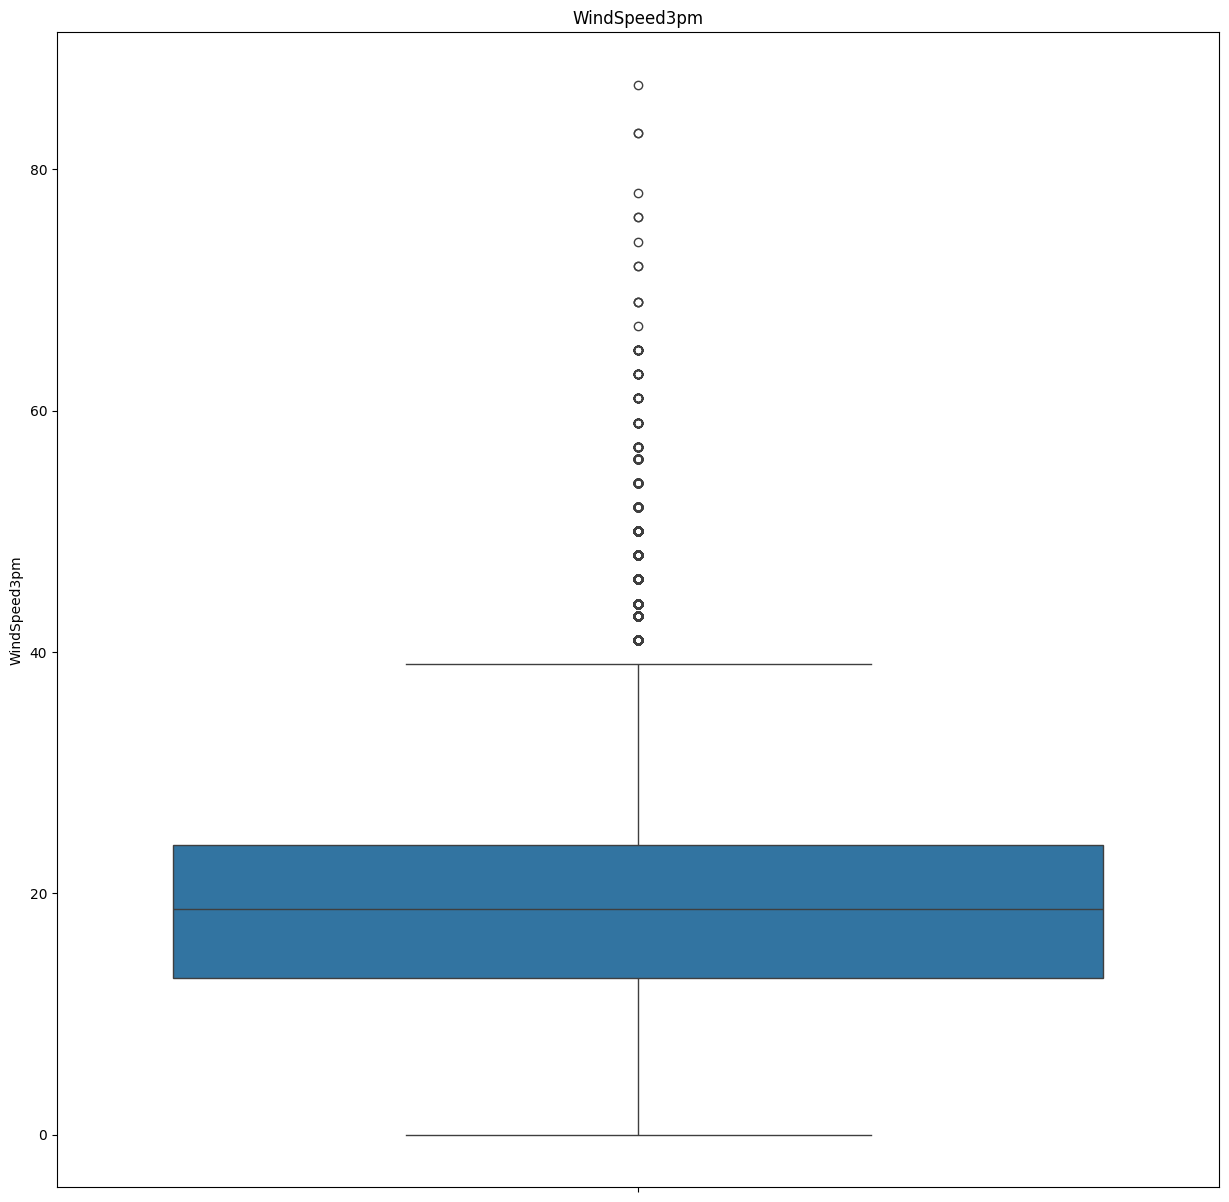

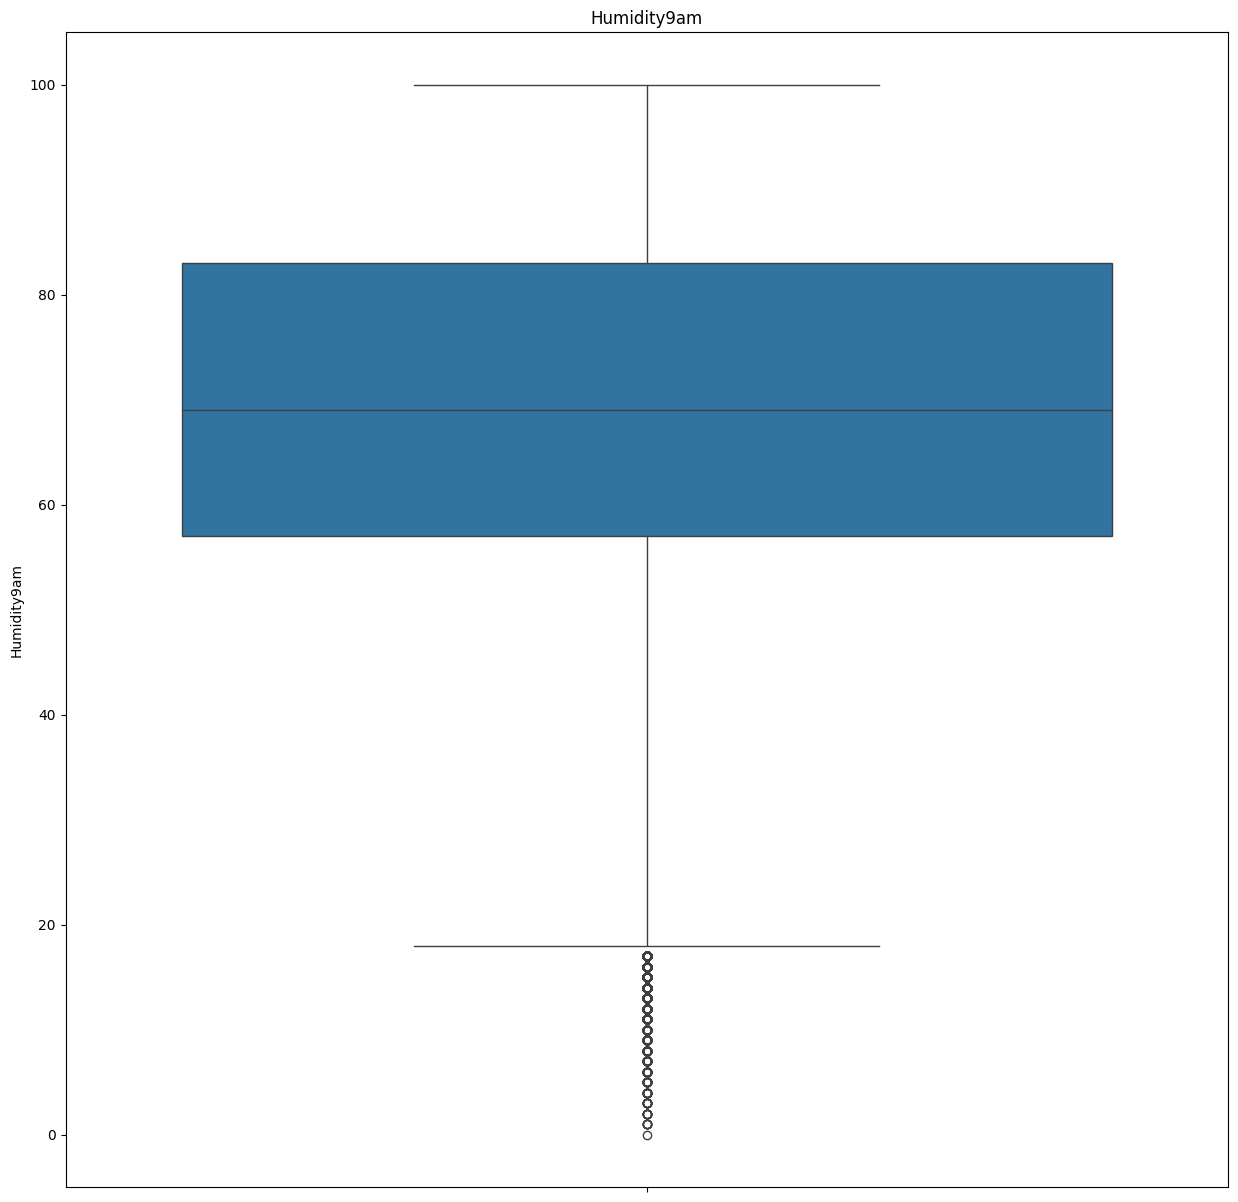

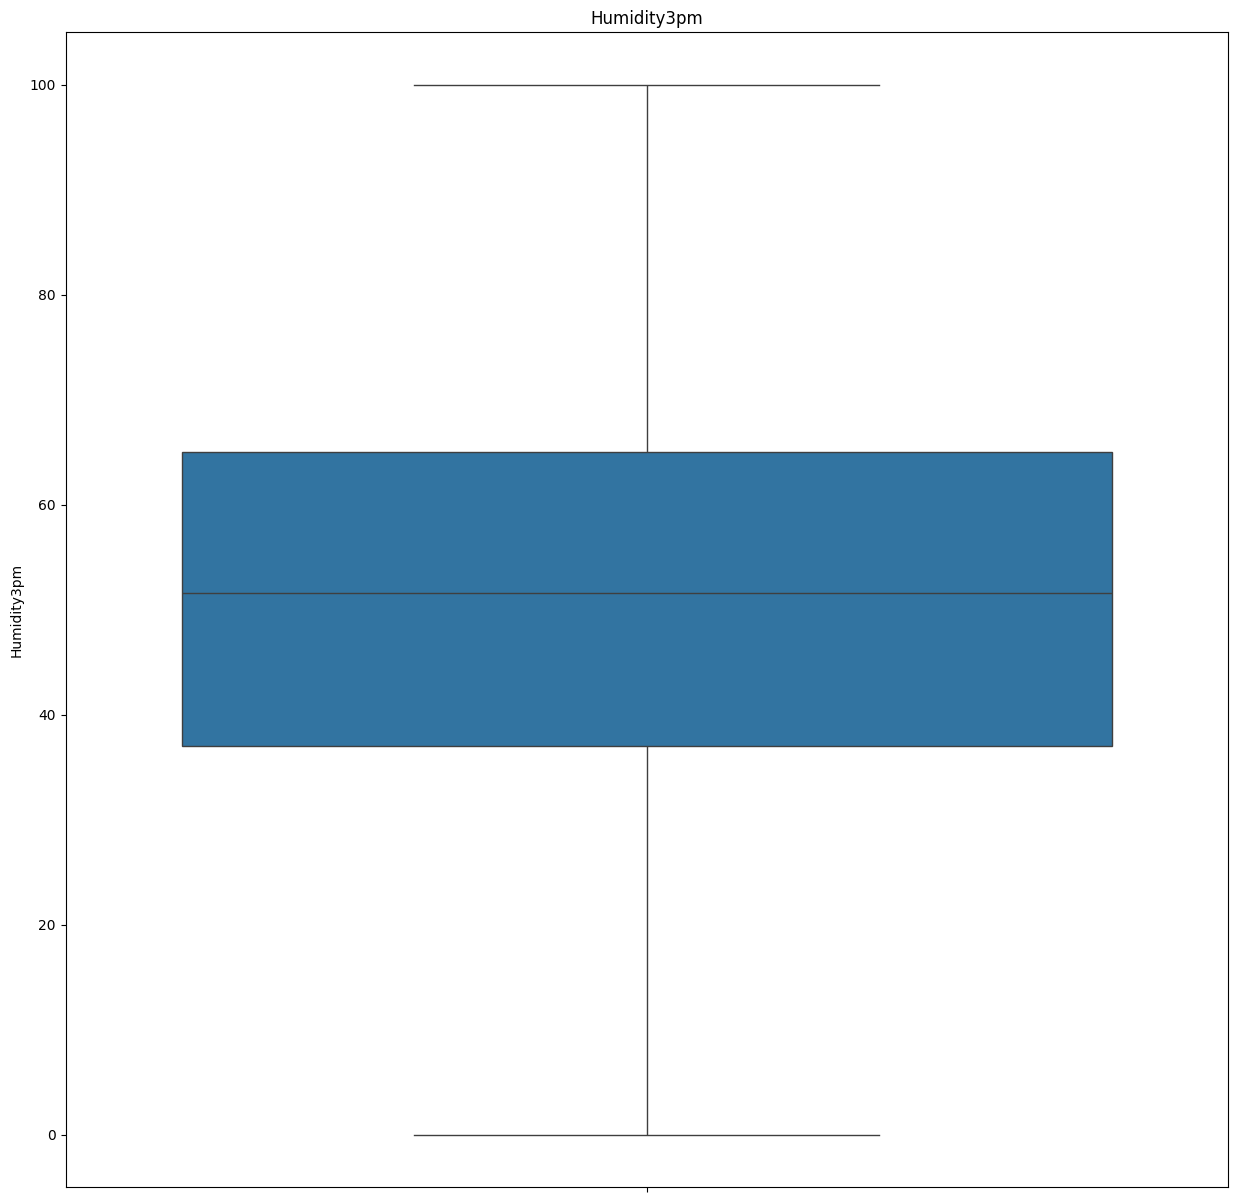

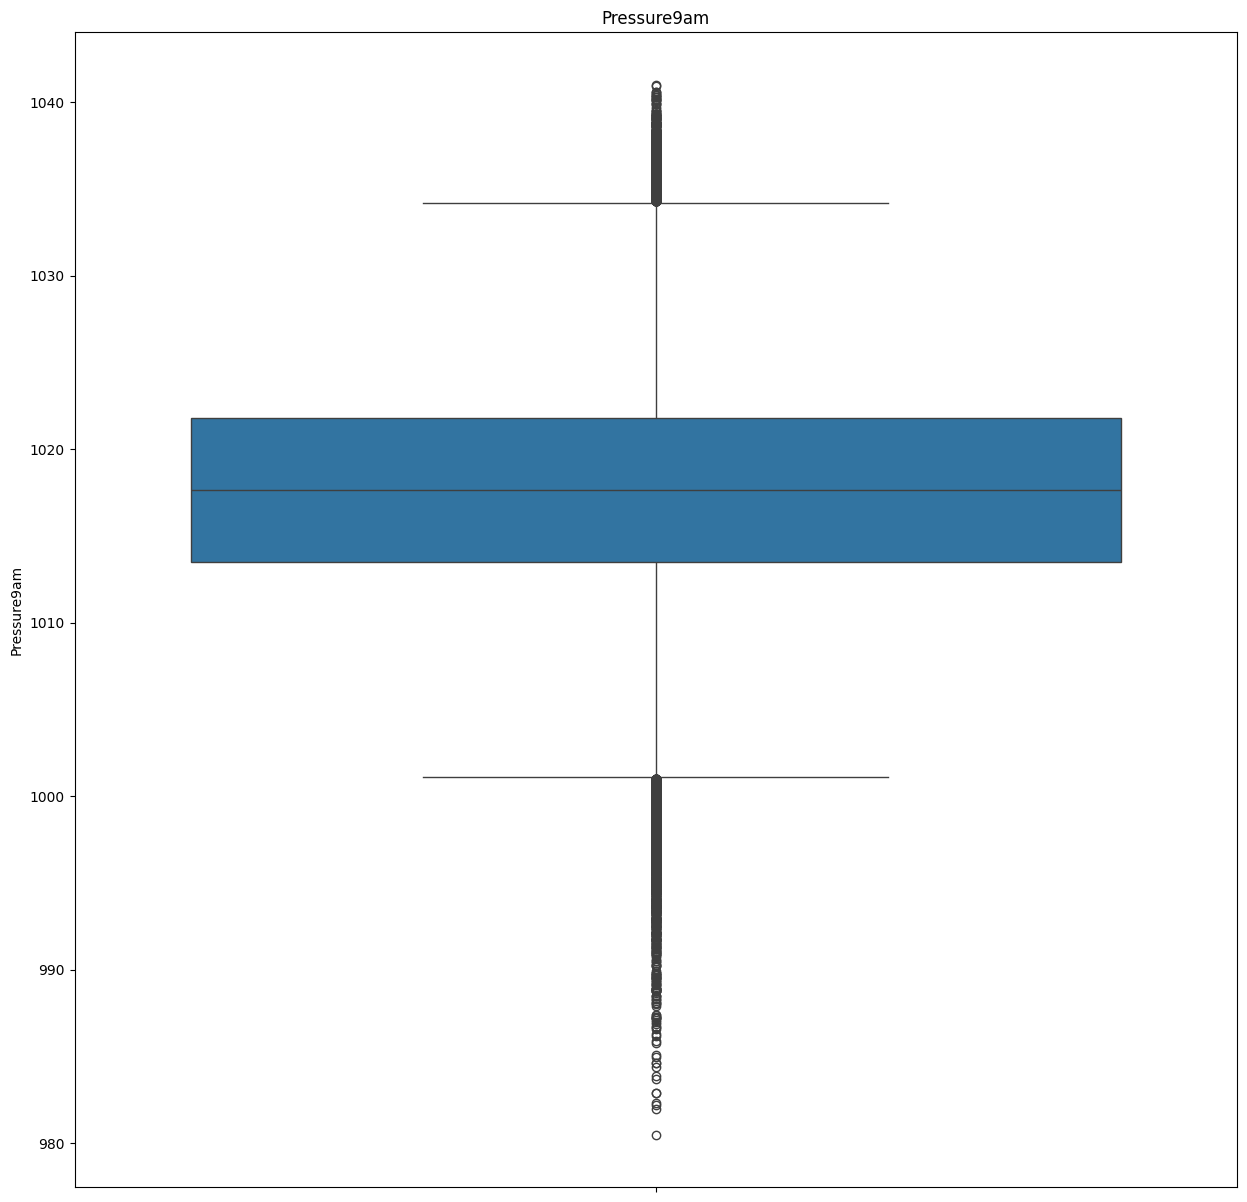

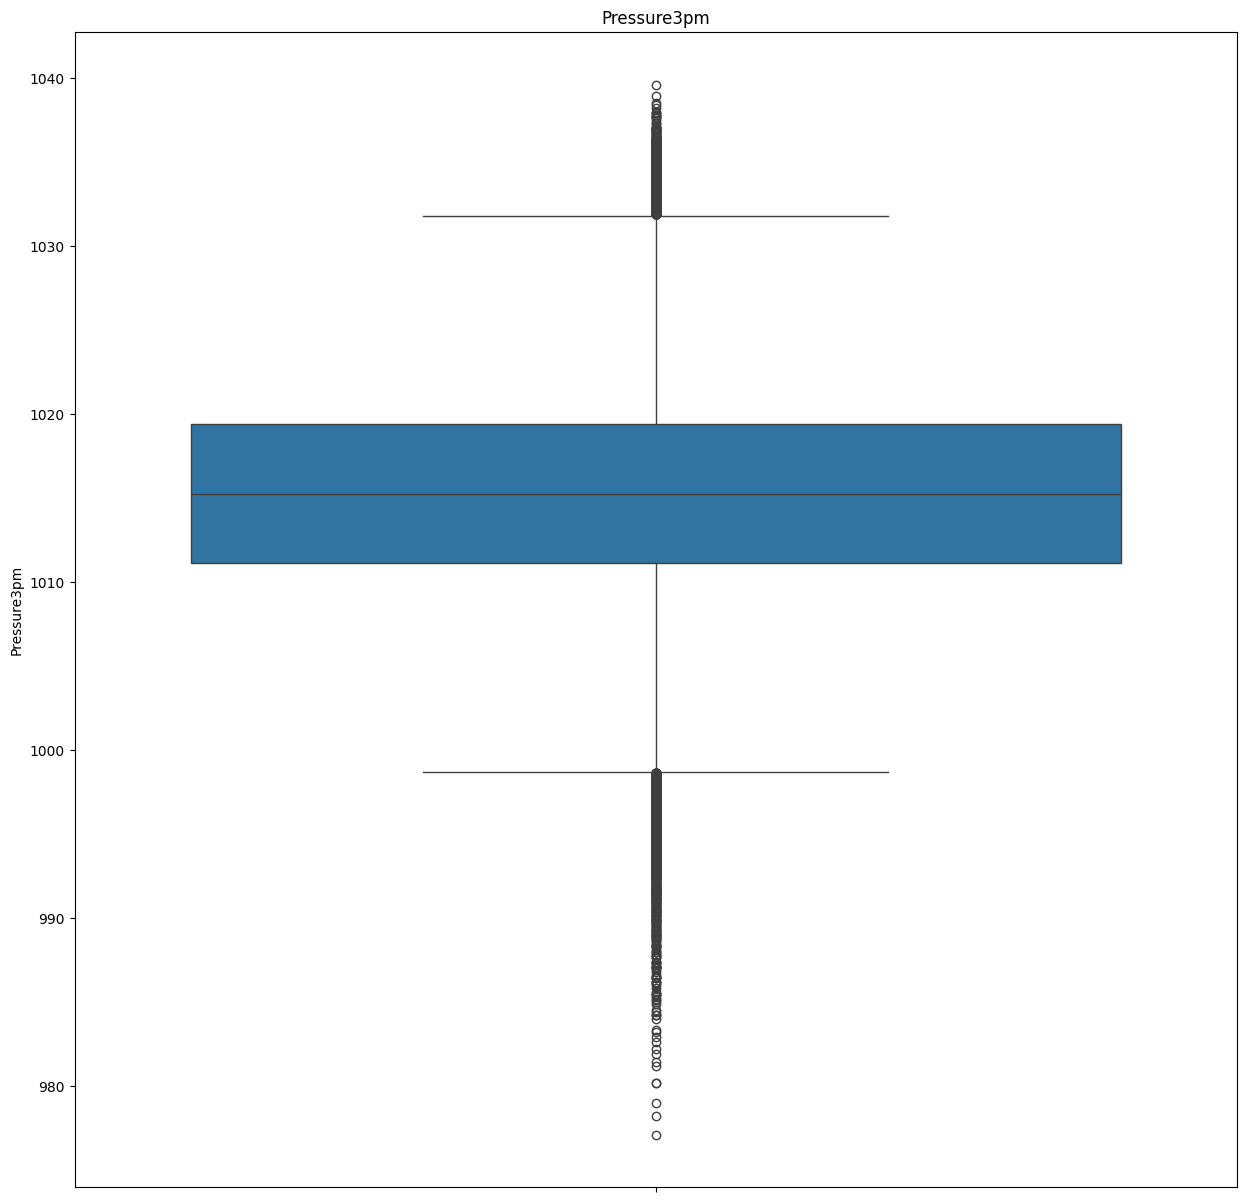

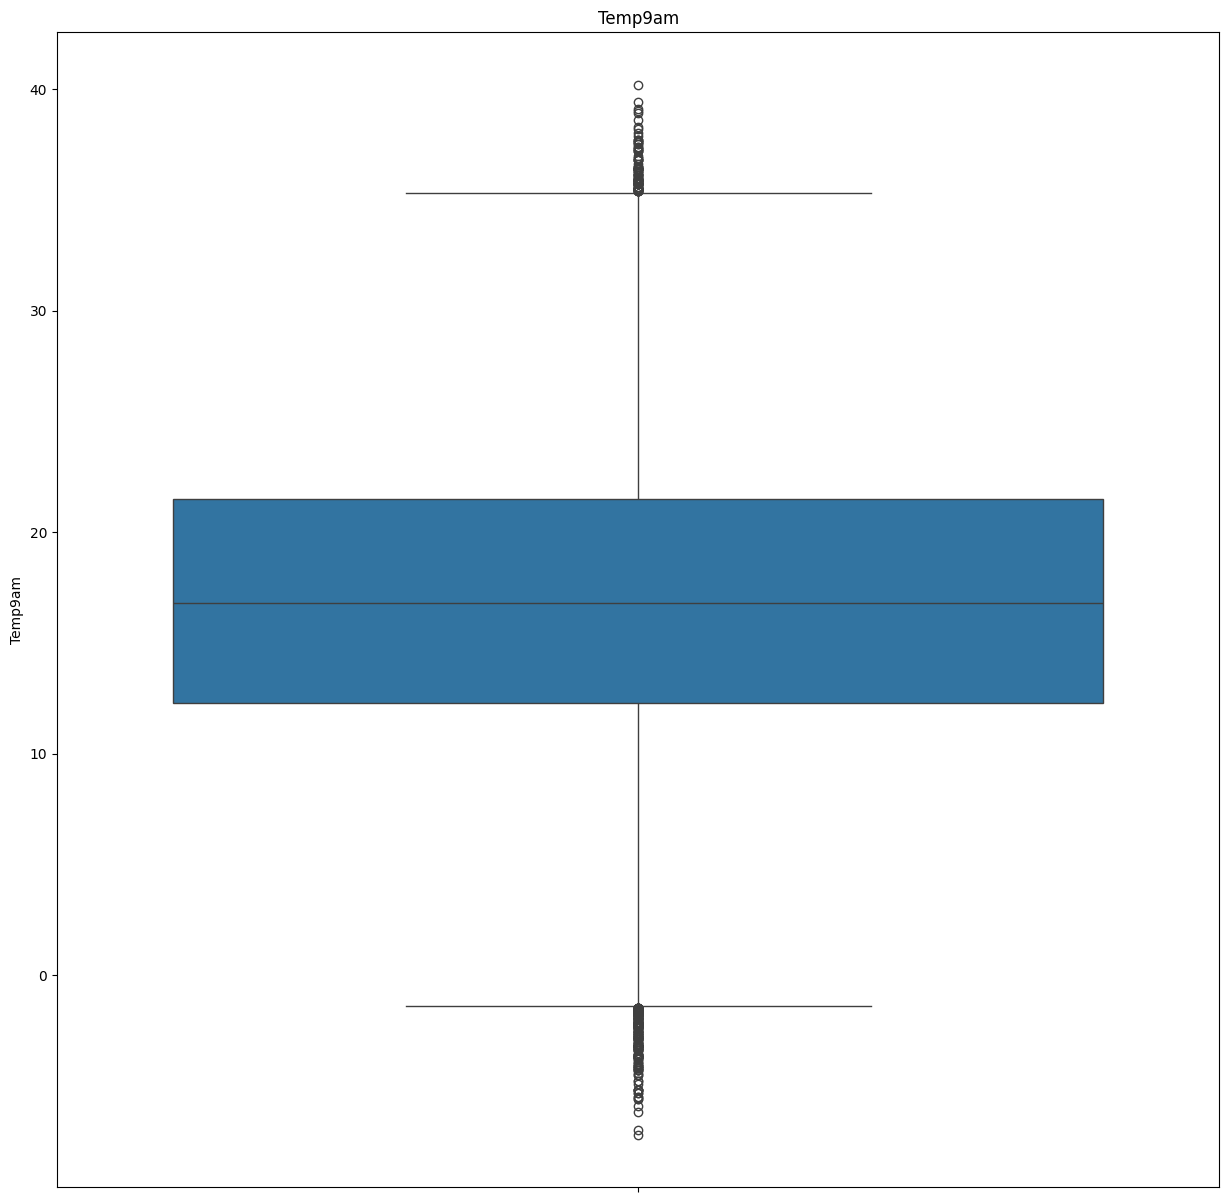

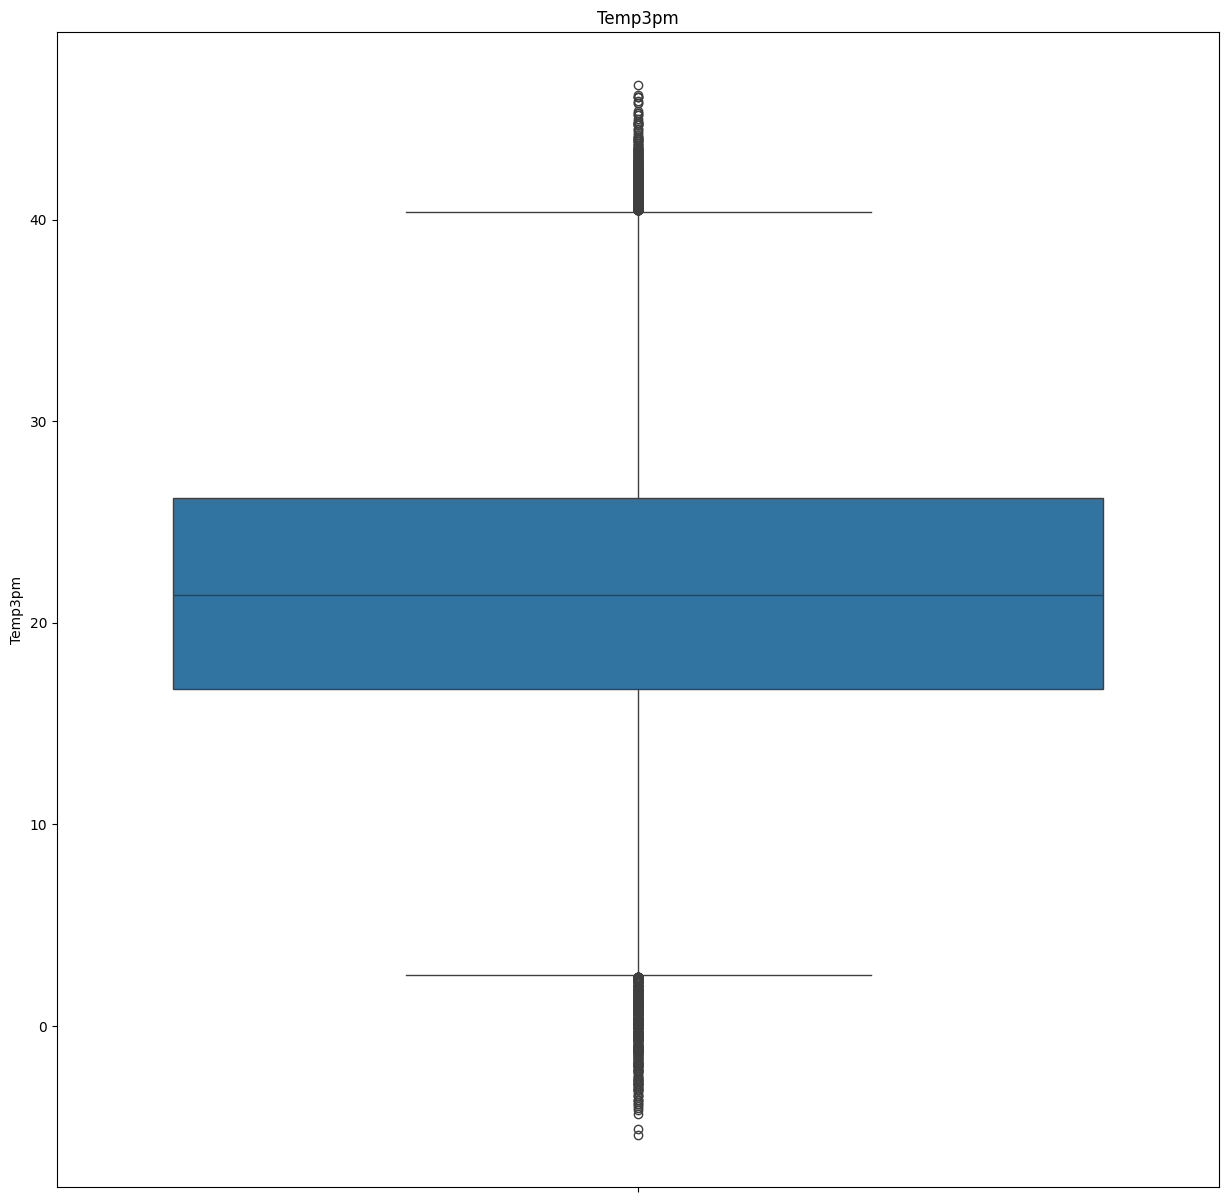

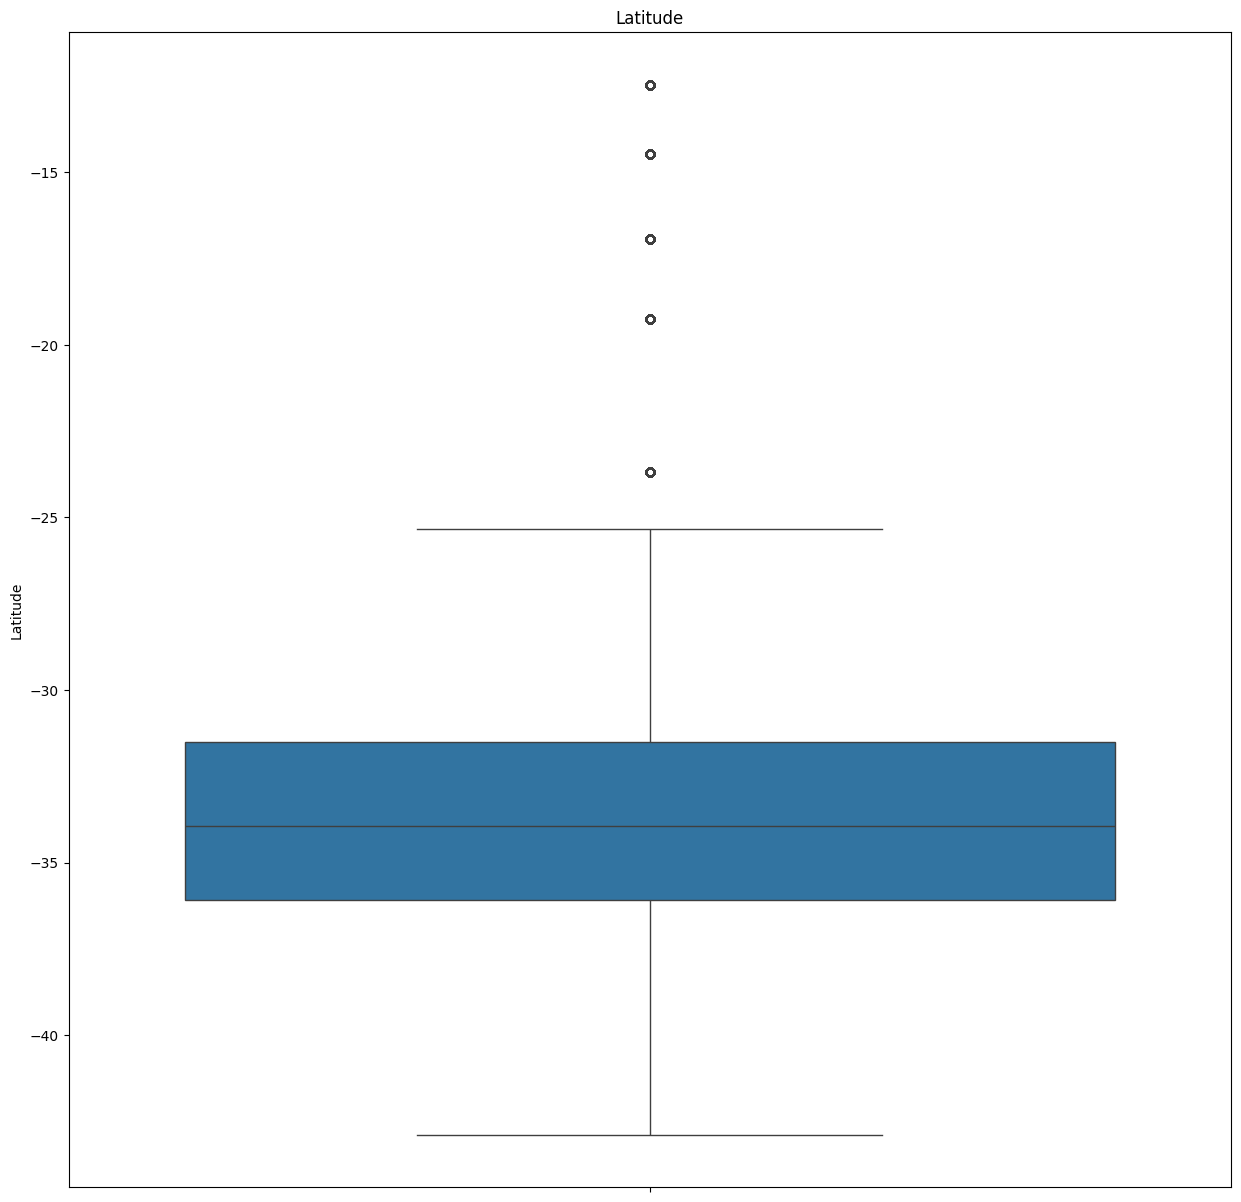

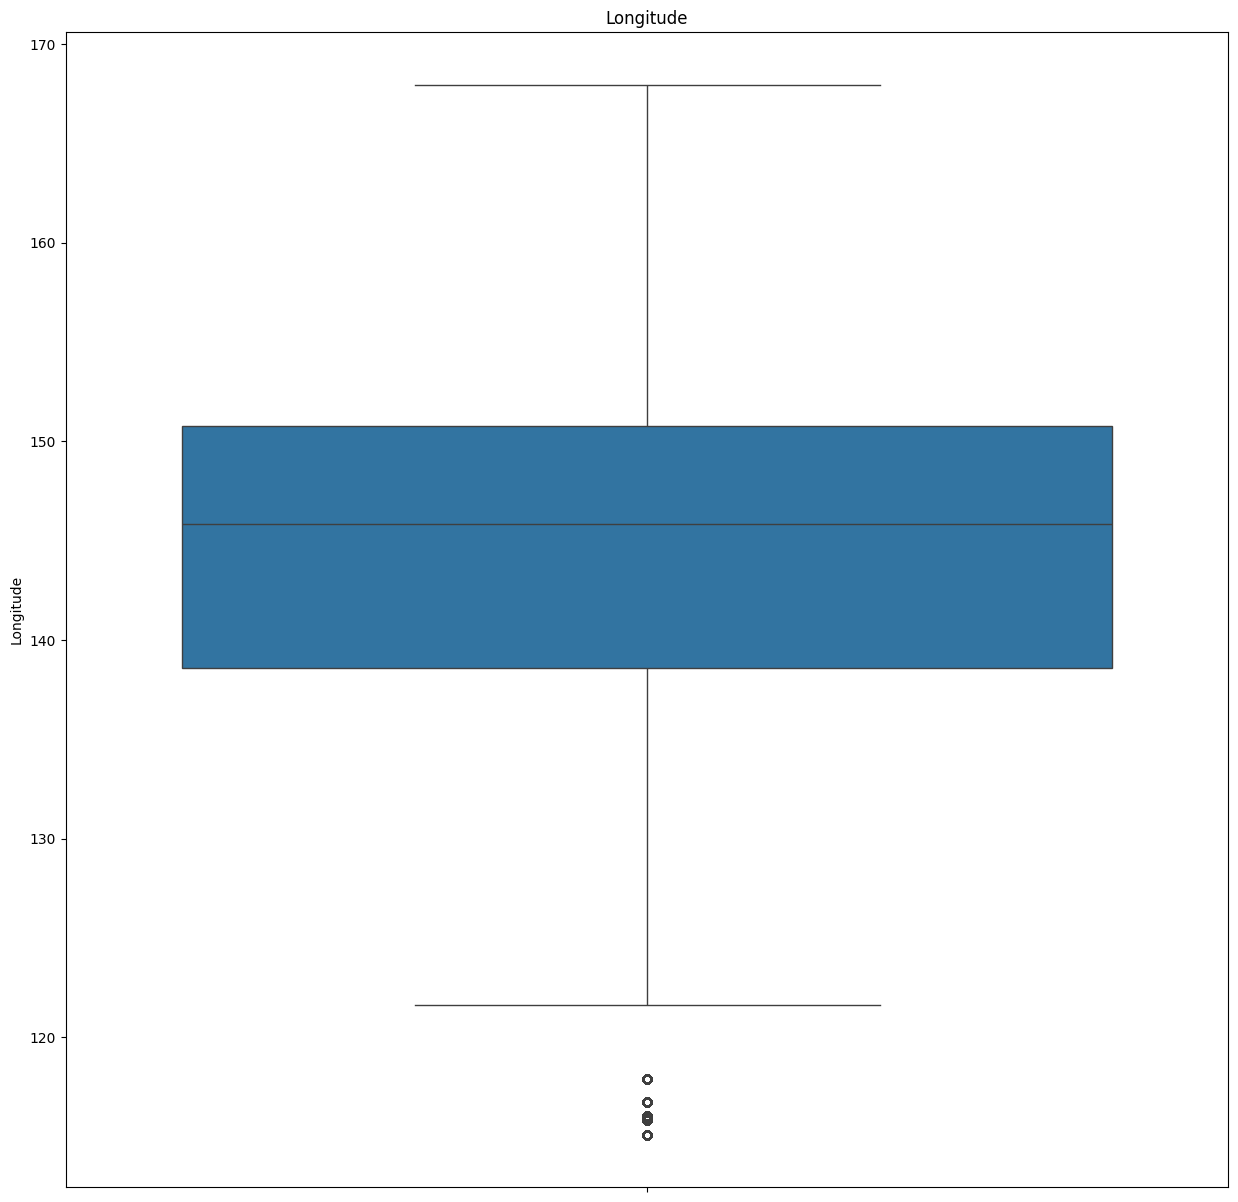

<Figure size 1500x1500 with 0 Axes>

In [30]:
for feature in cont_vars:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [31]:
for feature in cont_vars:
    if(df[feature].isnull().sum()*100/len(df)>0):
        df[feature]=df[feature].fillna(df[feature].median())
        #df[feature].fillna(df[feature].median(),inplace=True) same as above line (using inplace)
    

In [32]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Latitude         0.0
Longitude        0.0
dtype: float64

In [33]:
dis_vars

['Cloud9am', 'Cloud3pm']

In [34]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")
    

C:\Users\Garima\AppData\Local\Temp\ipykernel_4632\2871935832.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(mode,inplace=True)


In [35]:
#categoriacal variables
df["RainToday"]=pd.get_dummies(df["RainToday"],drop_first=True)
df["RainTomorrow"]=pd.get_dummies(df["RainTomorrow"],drop_first=True)

In [36]:
#value_1_present = (df['RainToday'] == 1).any()
#value_2_present =(df['RainTomorrow'] == 1).any()
#print(value_1_present)
#print(value_2_present)
# checking for the presence of a specific value in columns

In [37]:
#grouping all unique values in categorical columns based on the mean of corresponding values in RainTomorrow column
for feature in cat_vars:
    print(feature,(df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending=False)).index)
    
    

Date Index(['19-12-2007', '30-01-2008', '24-12-2007', '13-04-2008', '19-06-2008',
       '02-11-2007', '03-11-2007', '20-12-2007', '03-12-2007', '21-12-2007',
       ...
       '29-04-2008', '25-04-2008', '14-01-2008', '14-02-2008', '19-08-2008',
       '29-03-2008', '29-02-2008', '08-03-2008', '19-07-2008', '01-01-2008'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [38]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15} 

#mapping categoriacal values to numerical values for computation

df["WindGustDir"]=df["WindGustDir"].map(windgustdir)
df["WindDir9am"]=df["WindDir9am"].map(winddir9am)
df["WindDir3pm"]=df["WindDir3pm"].map(winddir3pm)

In [39]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

#df["WindDir9am"]=df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
#df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0],inplace=True)
# either use inplace=True or assigment operator to change the dataframe and fill missing value using fillna() method

In [40]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Latitude         0.0
Longitude        0.0
dtype: float64

In [41]:
#df1=df.groupby(["Location"])["RainTomorrow"].value_counts(sort=False).unstack()
#both the above and below line do the same operation
df1=df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [42]:
df1

RainTomorrow,False,True
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [43]:
df1.iloc[:,1].sort_values(ascending=False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [44]:
df1.head()

RainTomorrow,False,True
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [45]:
df1.iloc[:, 1].sort_values(ascending=False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [46]:
len(df1.iloc[:,1].sort_values(ascending=False).index)

49

In [47]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"]=df["Location"].map(location)

In [48]:
df["Date"]=pd.to_datetime(df["Date"],format="%Y-%m-%dT" ,errors="coerce")

In [49]:
df["Date-month"]=df["Date"].dt.month
df["Date-day"]=df["Date"].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,Date-month,Date-day
0,NaT,30,13.4,22.900000,0.6,5.468232,7.611178,4,44.00000,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,False,False,-36.073773,146.913526,NaN,NaN
1,NaT,30,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,False,False,-36.073773,146.913526,NaN,NaN
2,NaT,30,12.9,25.700000,0.0,5.468232,7.611178,5,46.00000,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,False,False,-36.073773,146.913526,NaN,NaN
3,NaT,30,9.2,28.000000,0.0,5.468232,7.611178,11,24.00000,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,False,False,-36.073773,146.913526,NaN,NaN
4,NaT,30,17.5,32.300000,1.0,5.468232,7.611178,4,41.00000,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,False,False,-36.073773,146.913526,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,NaT,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,13,13,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,False,False,-25.345554,131.036961,NaN,NaN
145456,NaT,49,3.6,25.300000,0.0,5.468232,7.611178,0,22.00000,13,2,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,False,False,-25.345554,131.036961,NaN,NaN
145457,NaT,49,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,13,3,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,False,False,-25.345554,131.036961,NaN,NaN
145458,NaT,49,7.8,27.000000,0.0,5.468232,7.611178,12,28.00000,11,2,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,False,False,-25.345554,131.036961,NaN,NaN


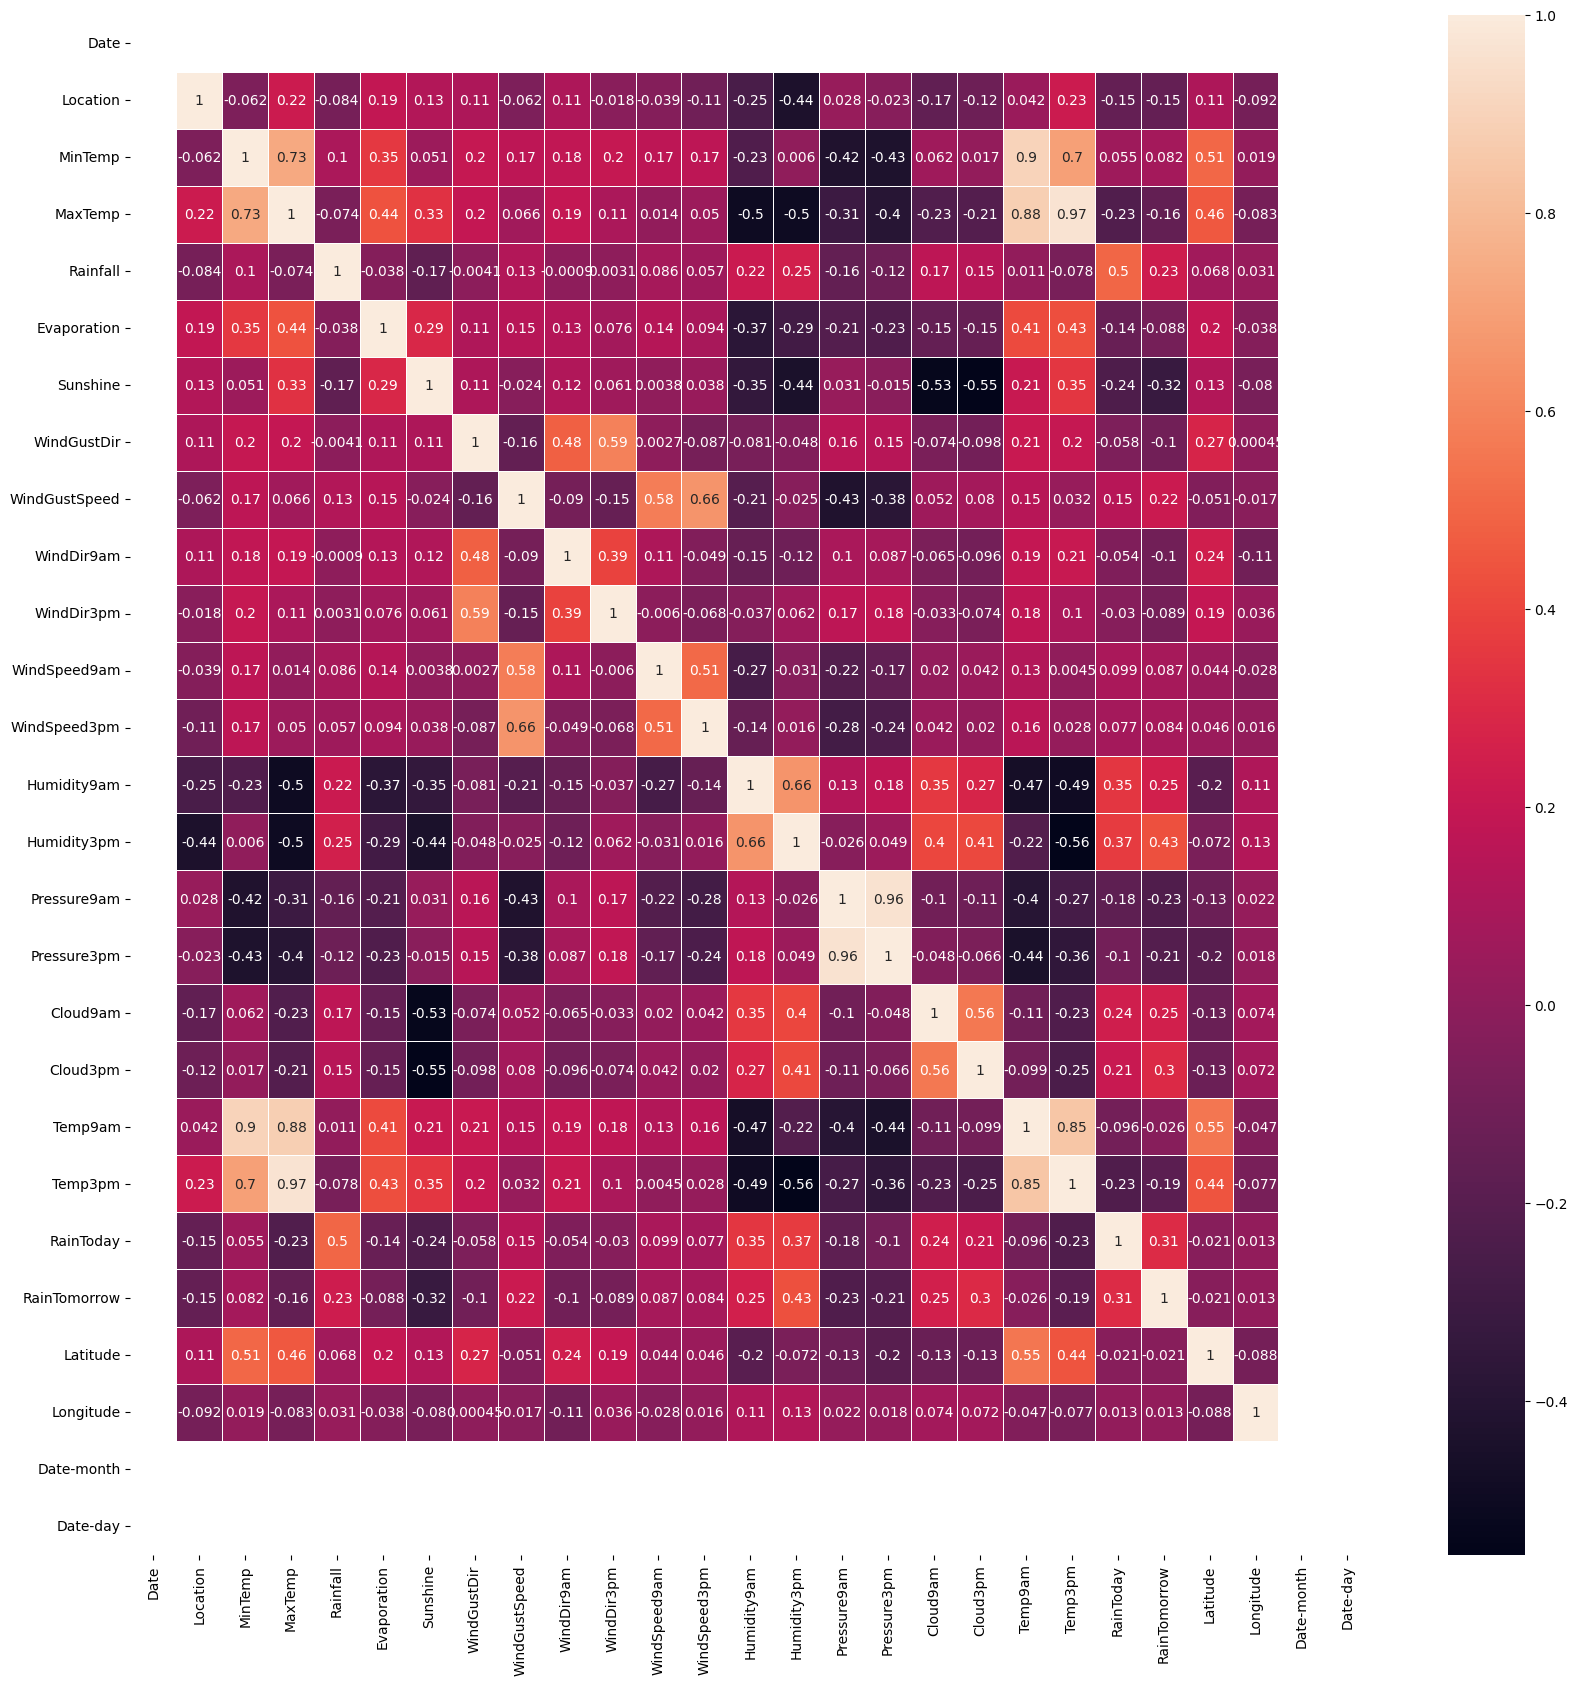

In [50]:
#df.corr()
corrmat=df.corr()
plt.figure(figsize=(20,20))
heat_map=sns.heatmap(corrmat,annot=True,linewidth=0.5)

In [51]:
#sns.countplot(df["RainTomorrow"])

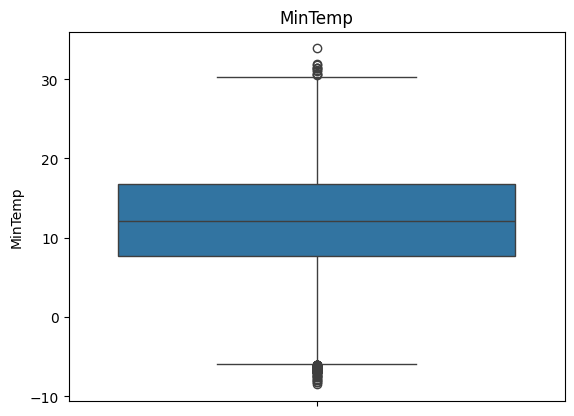

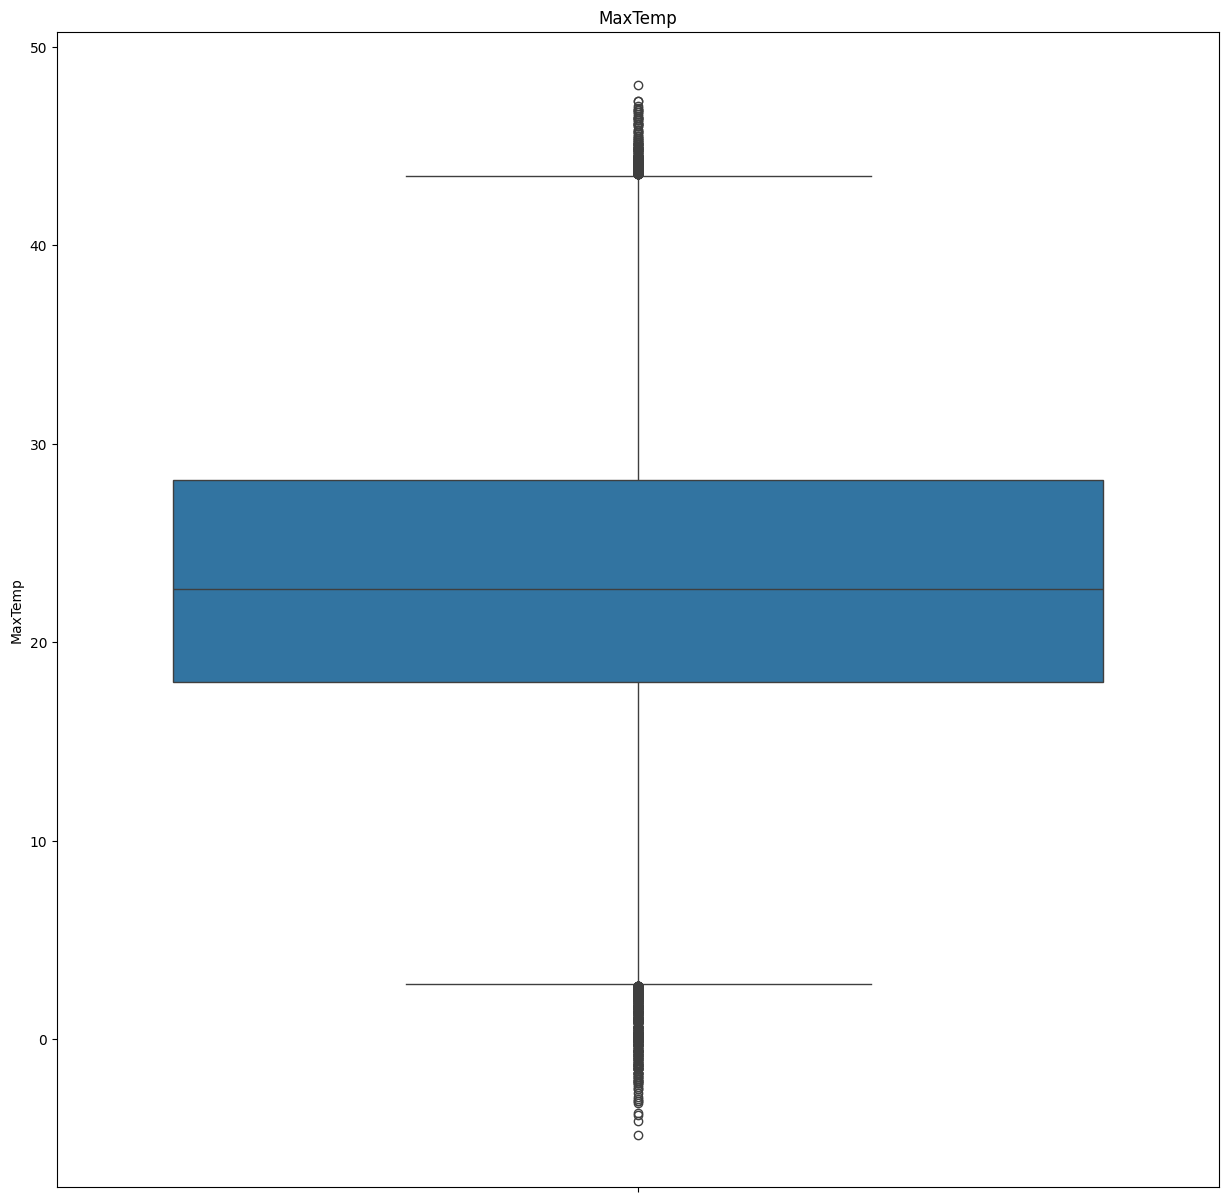

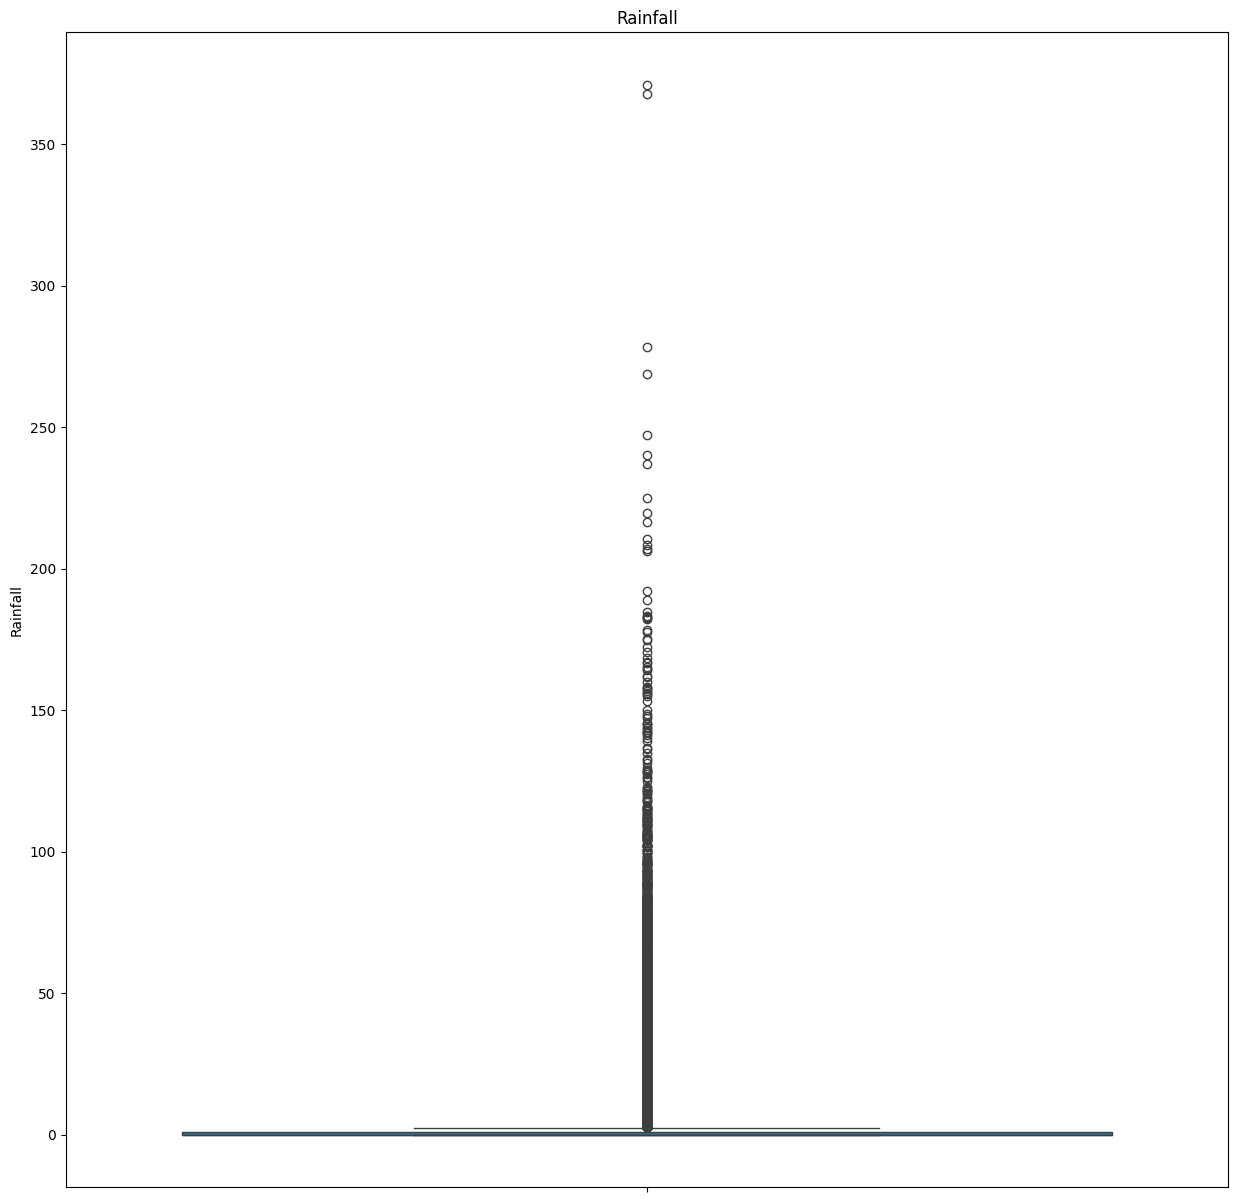

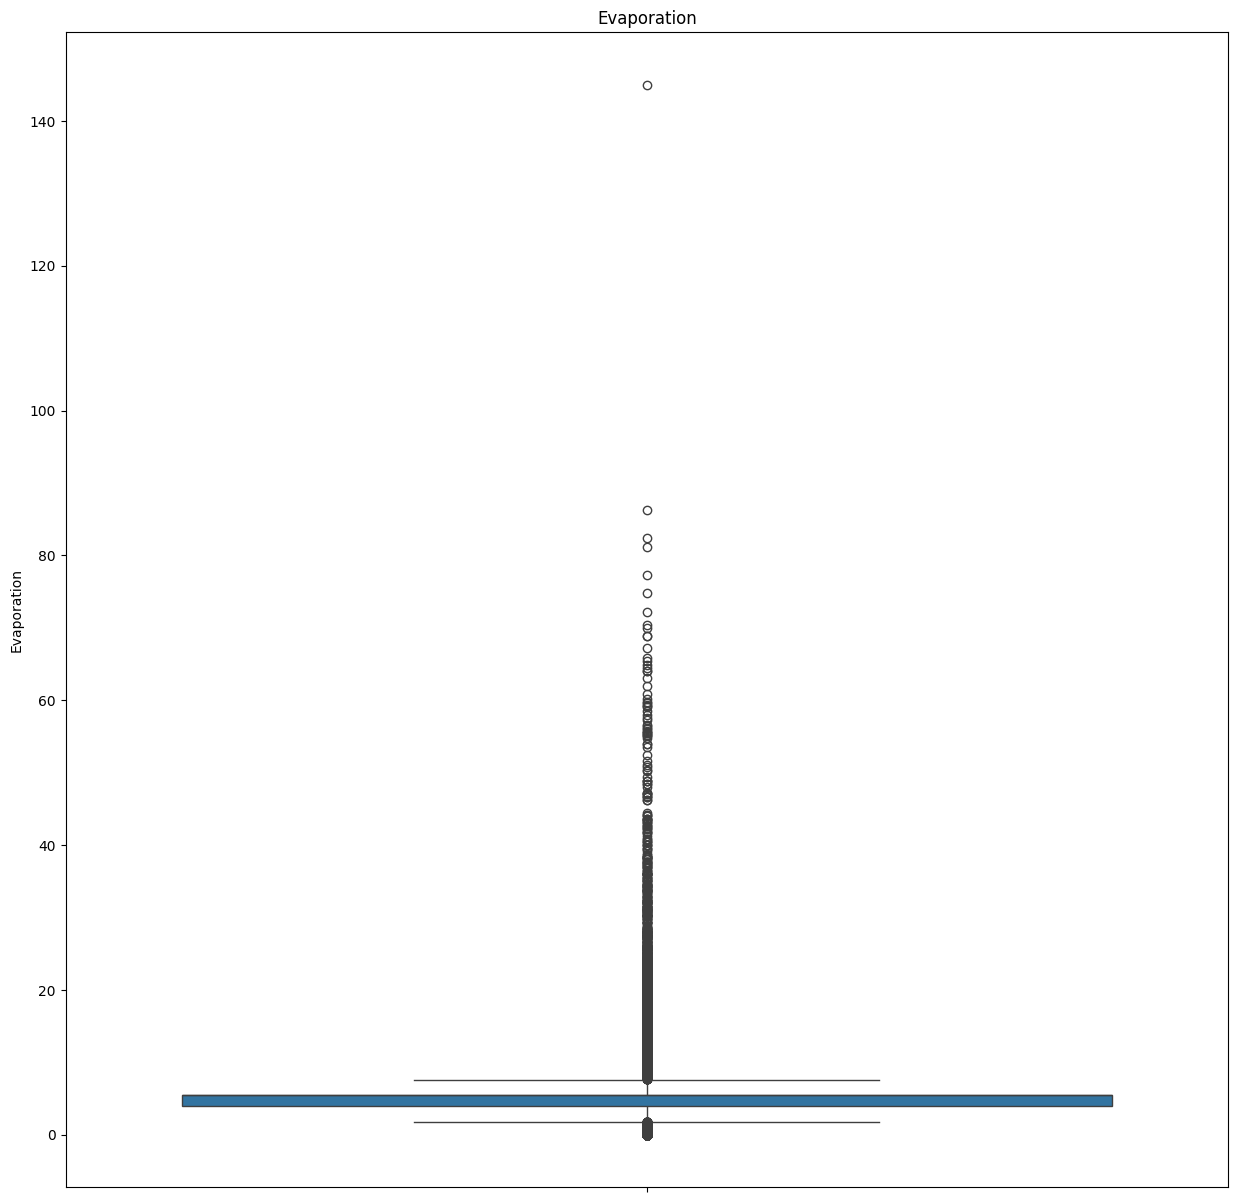

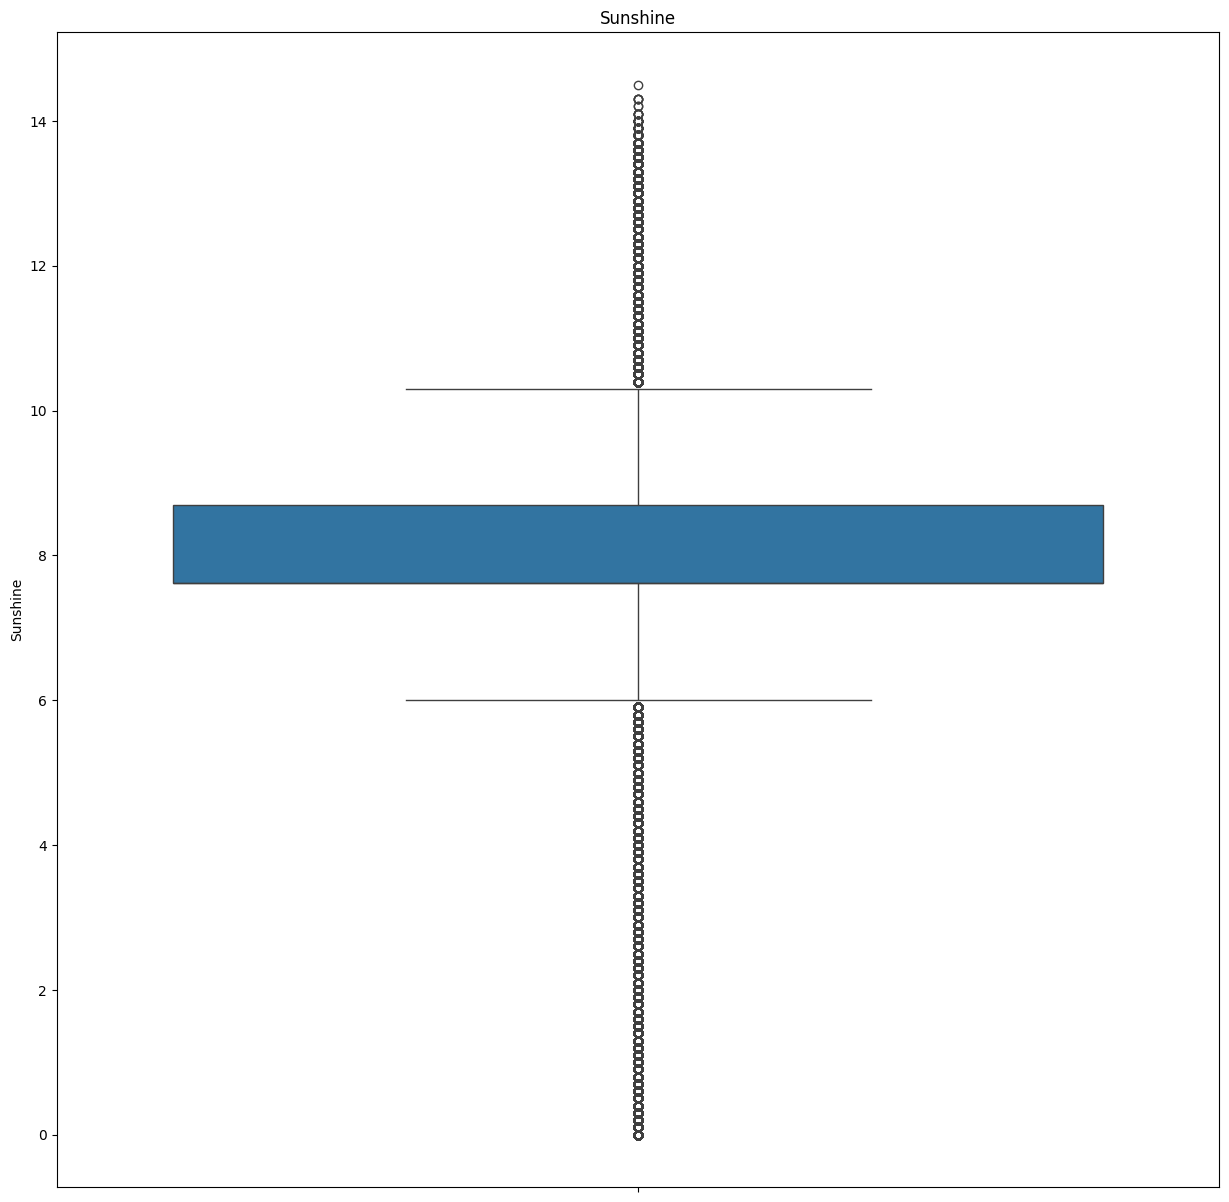

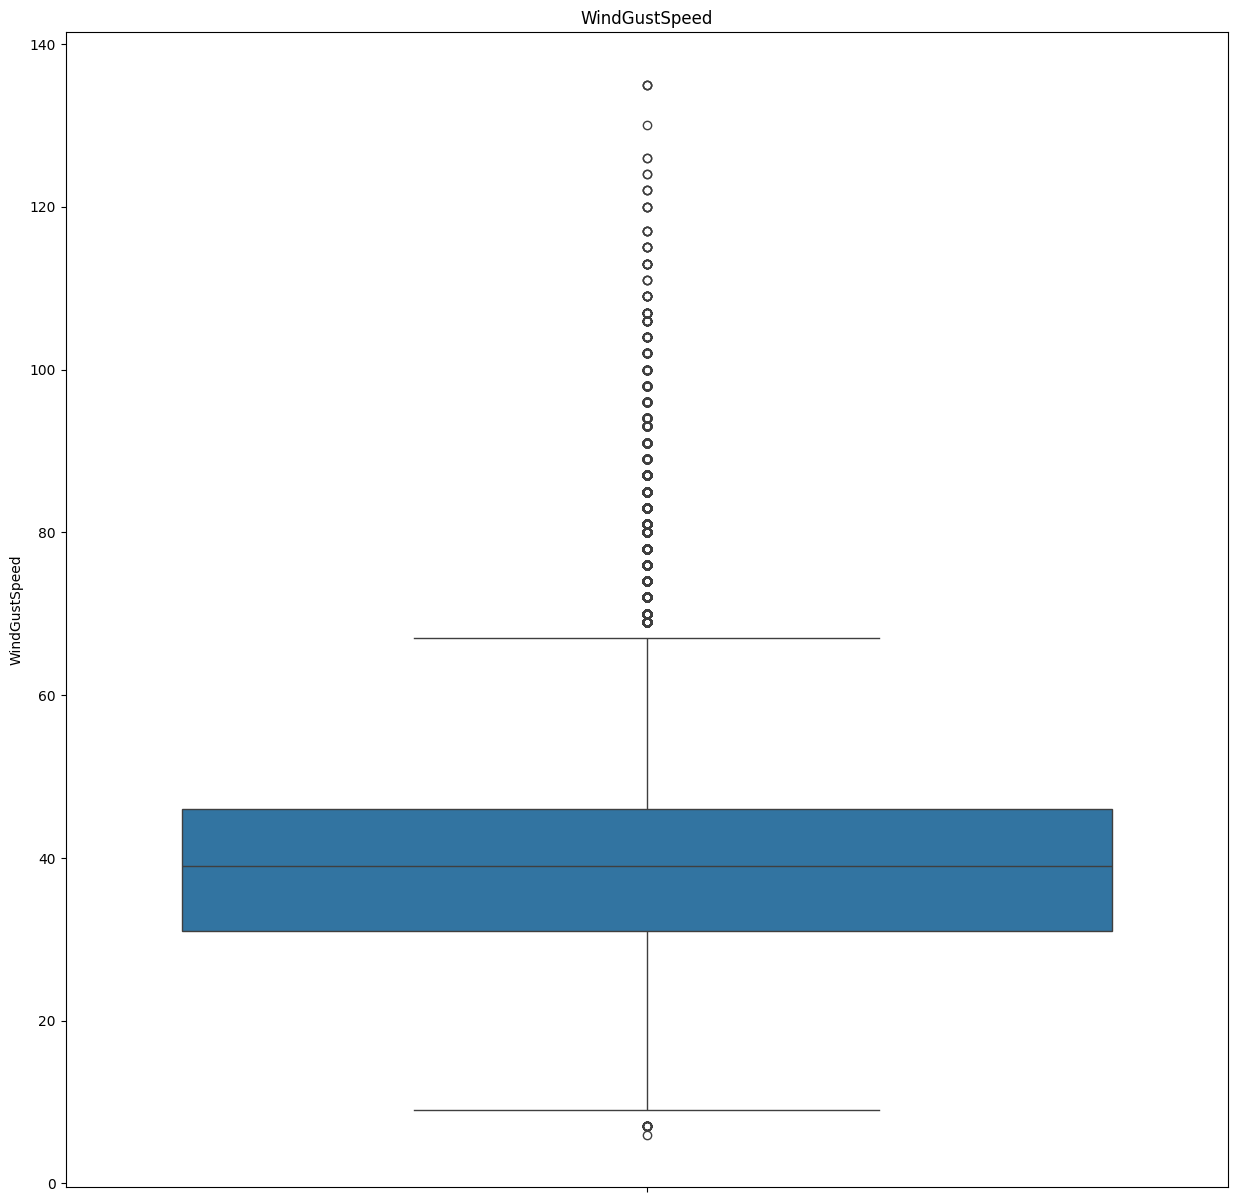

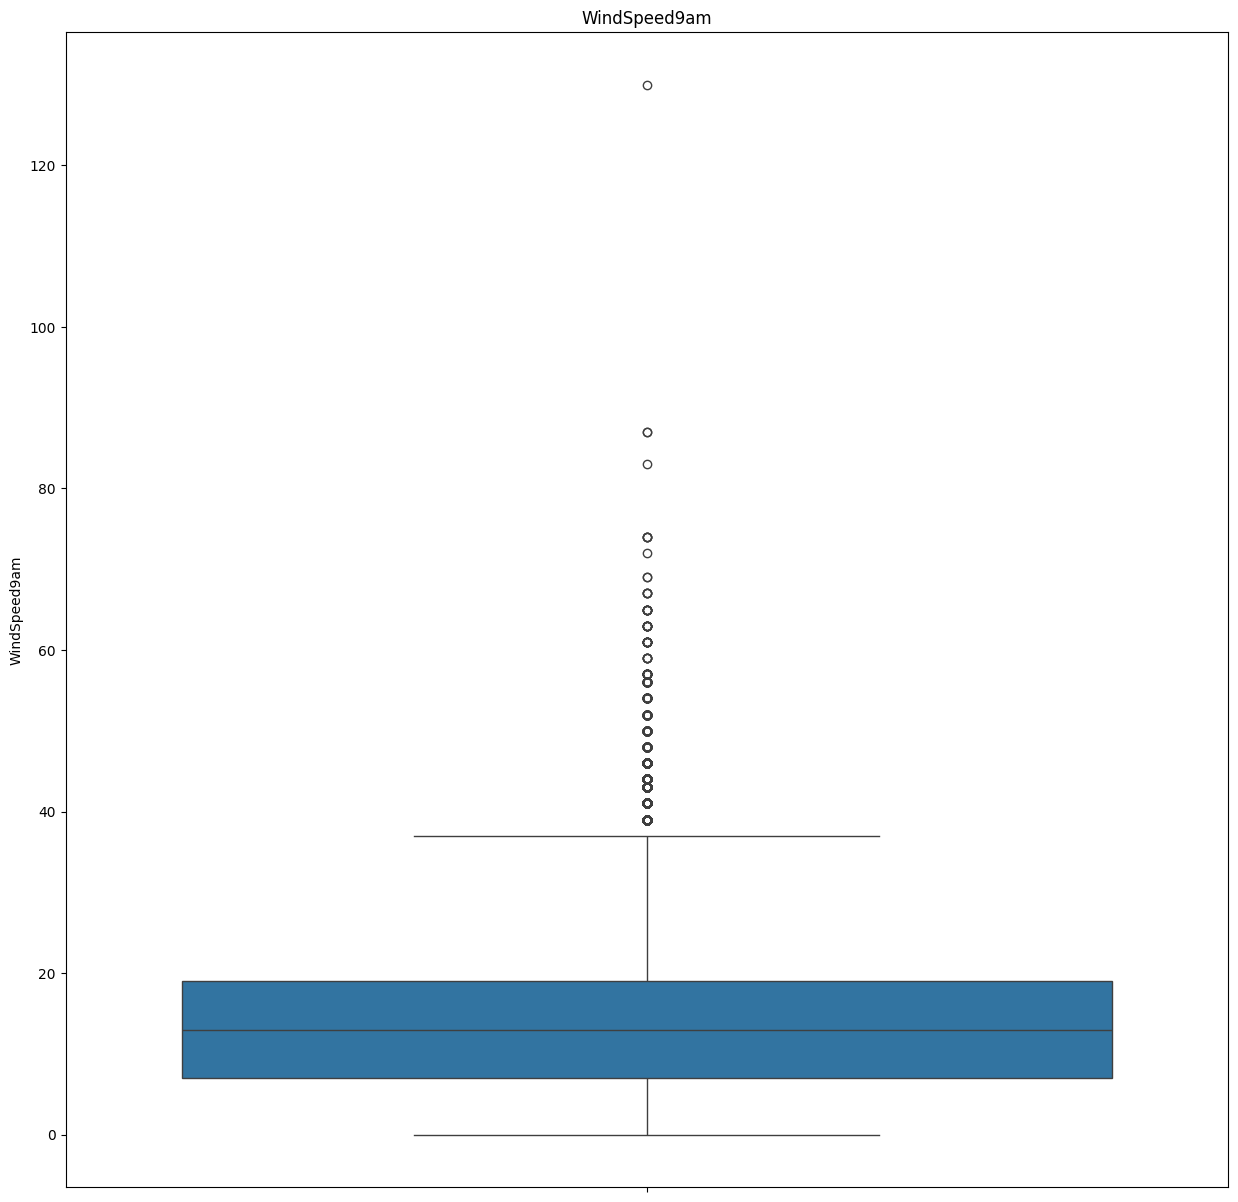

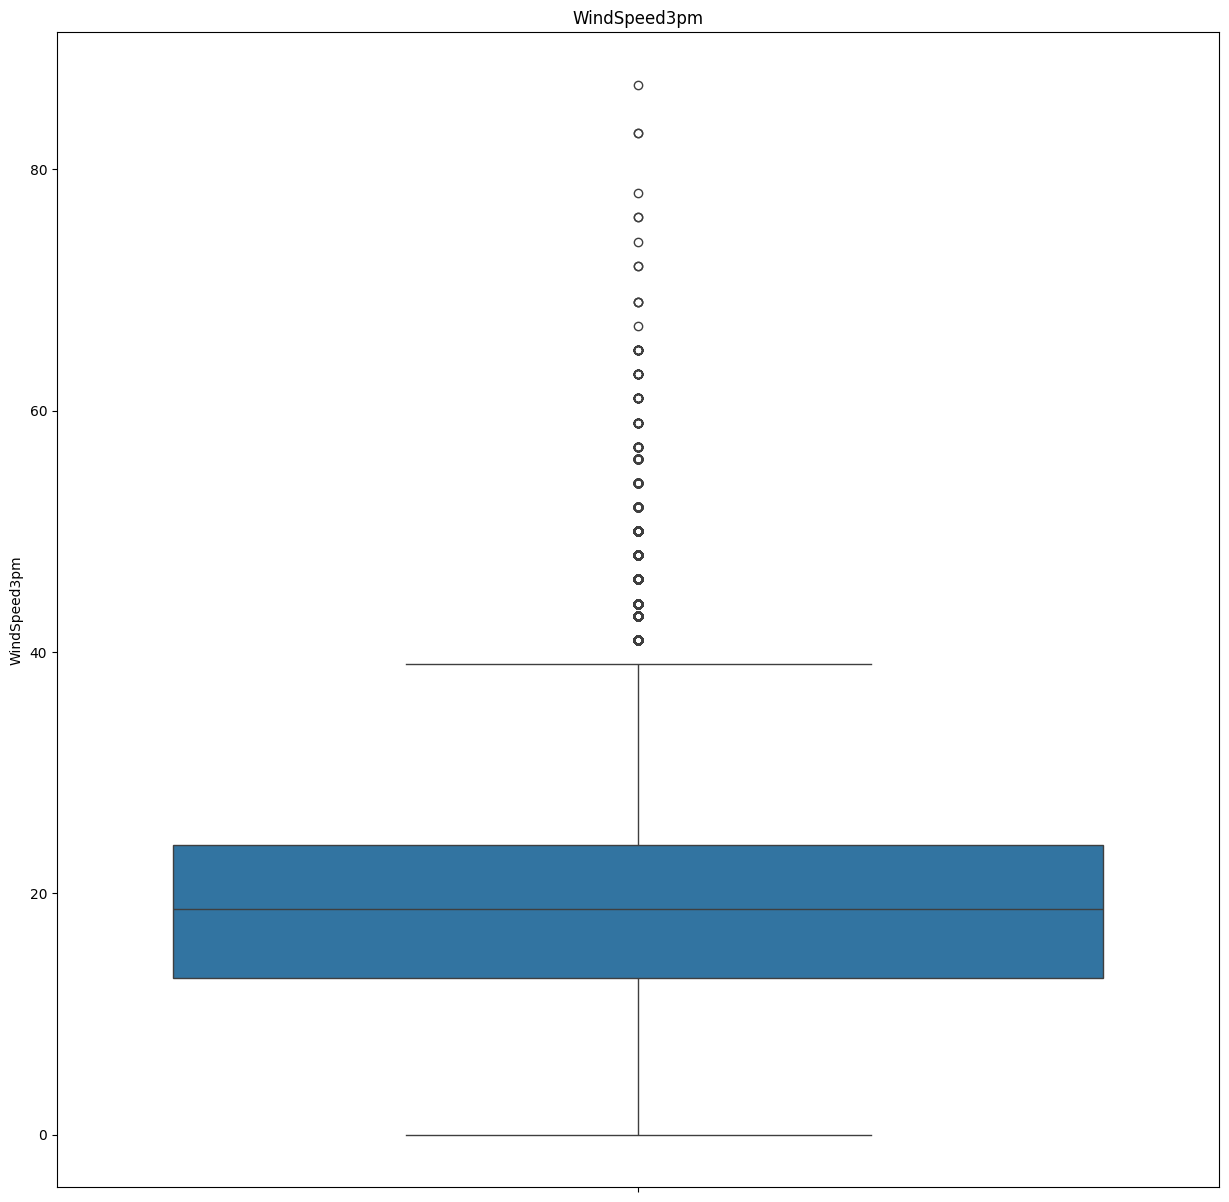

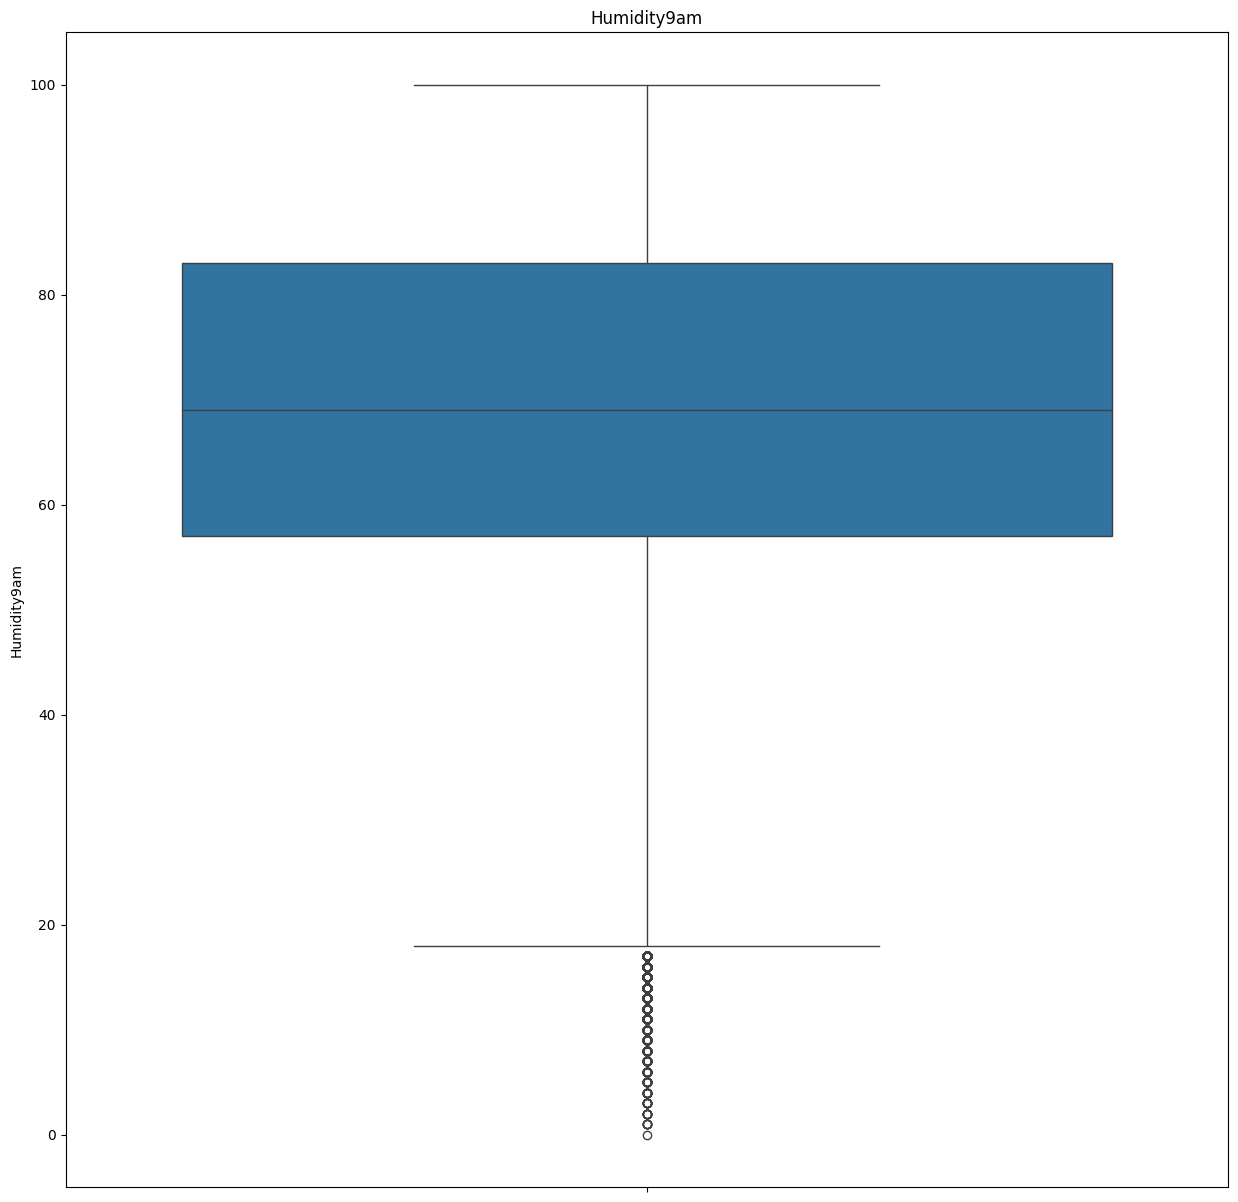

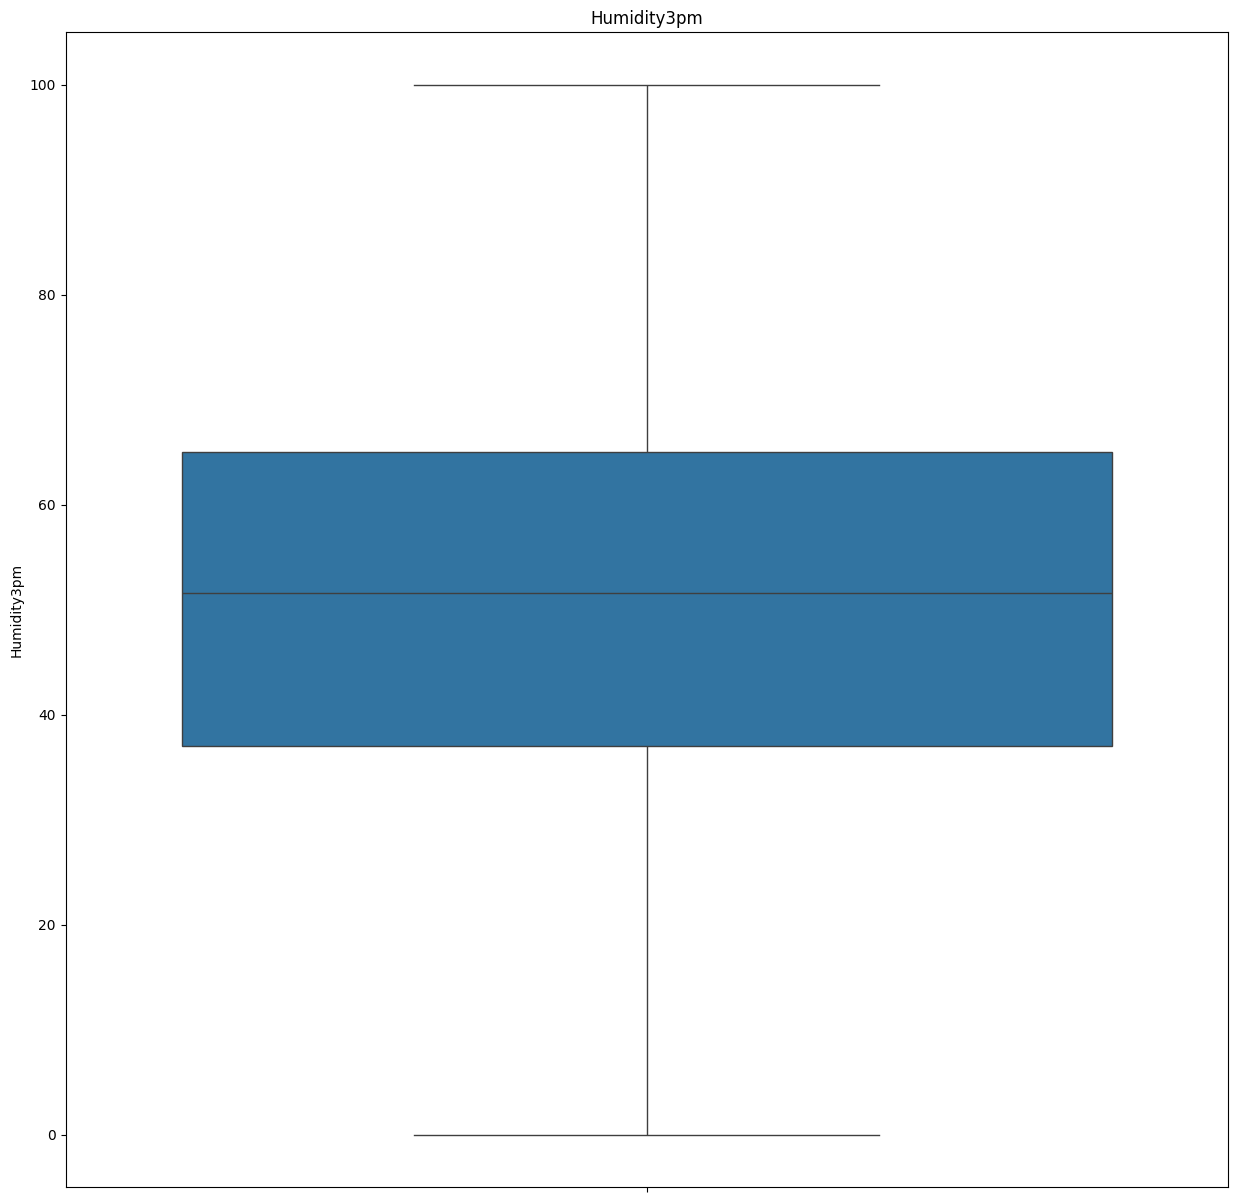

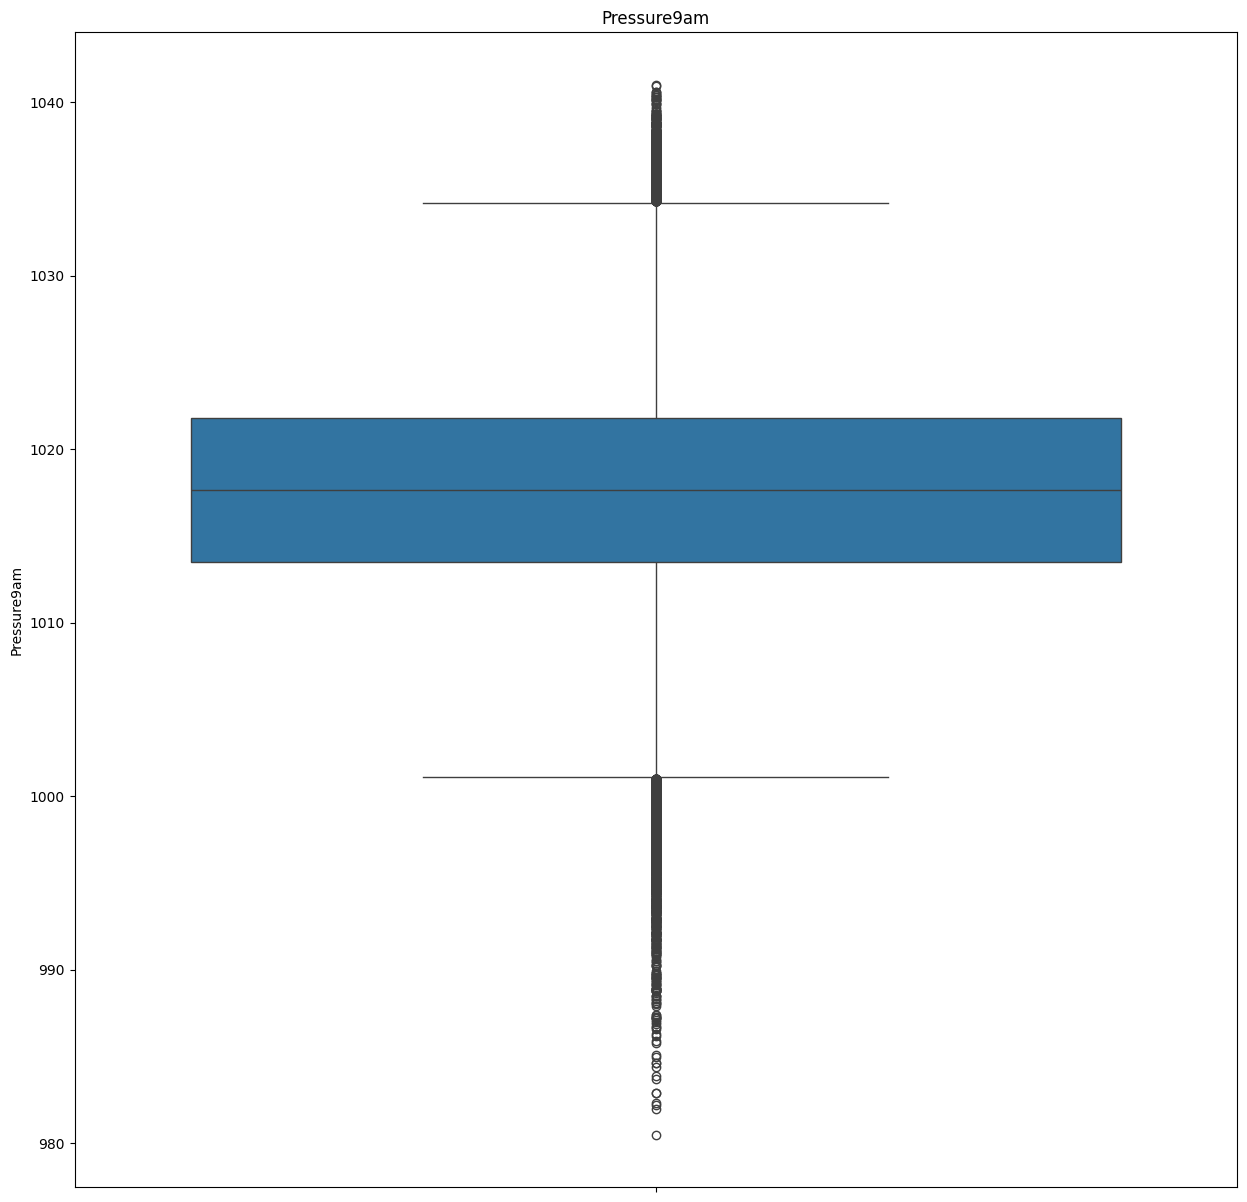

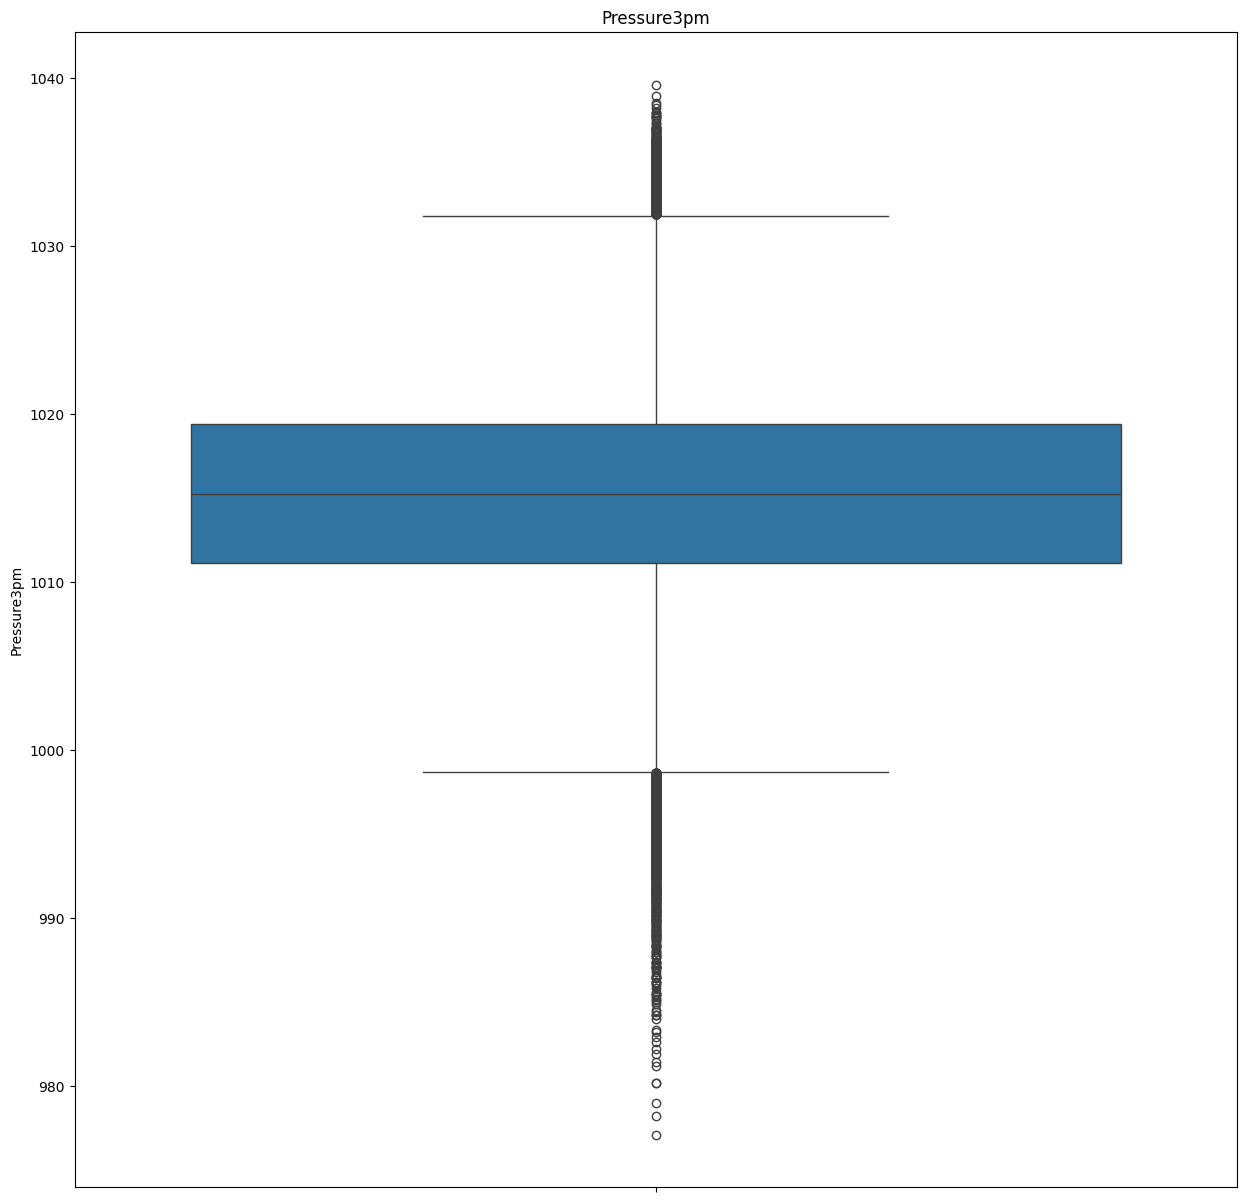

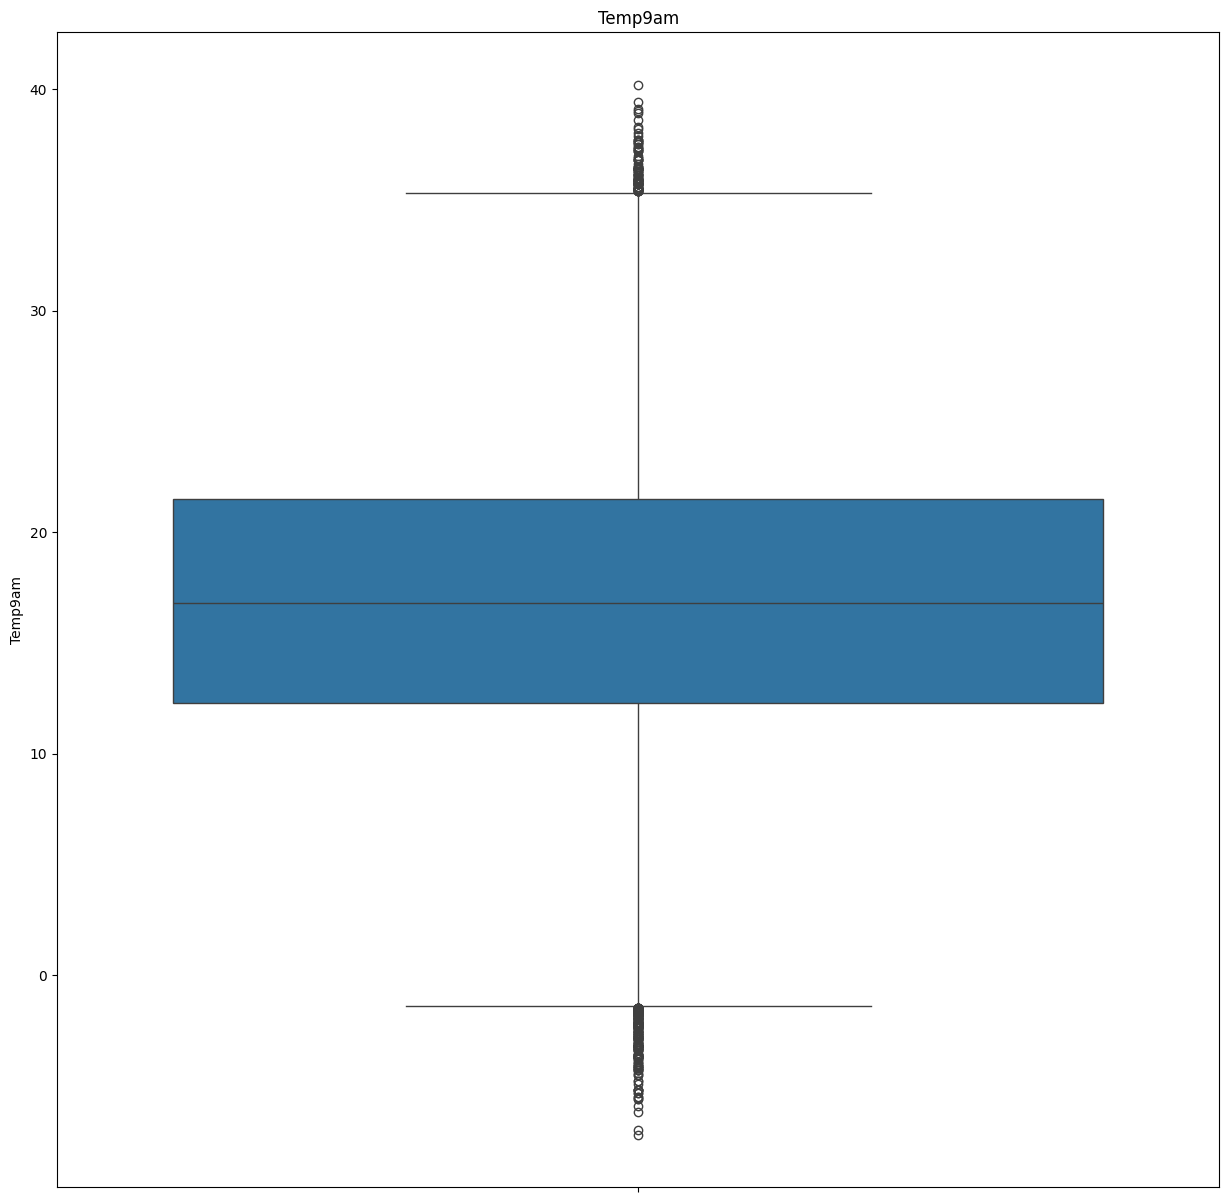

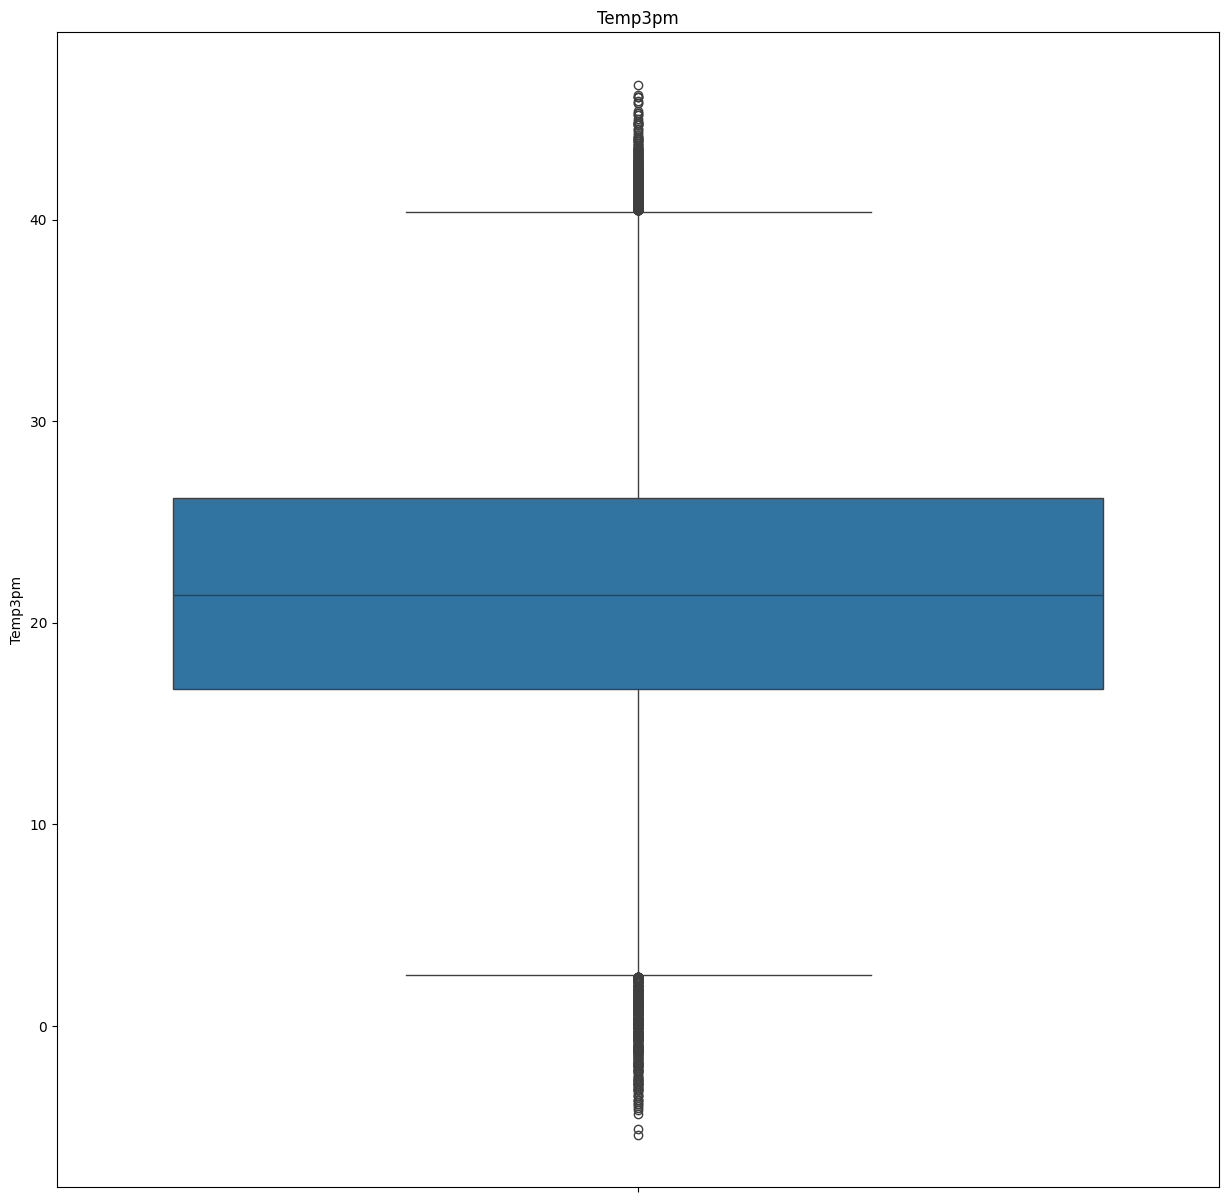

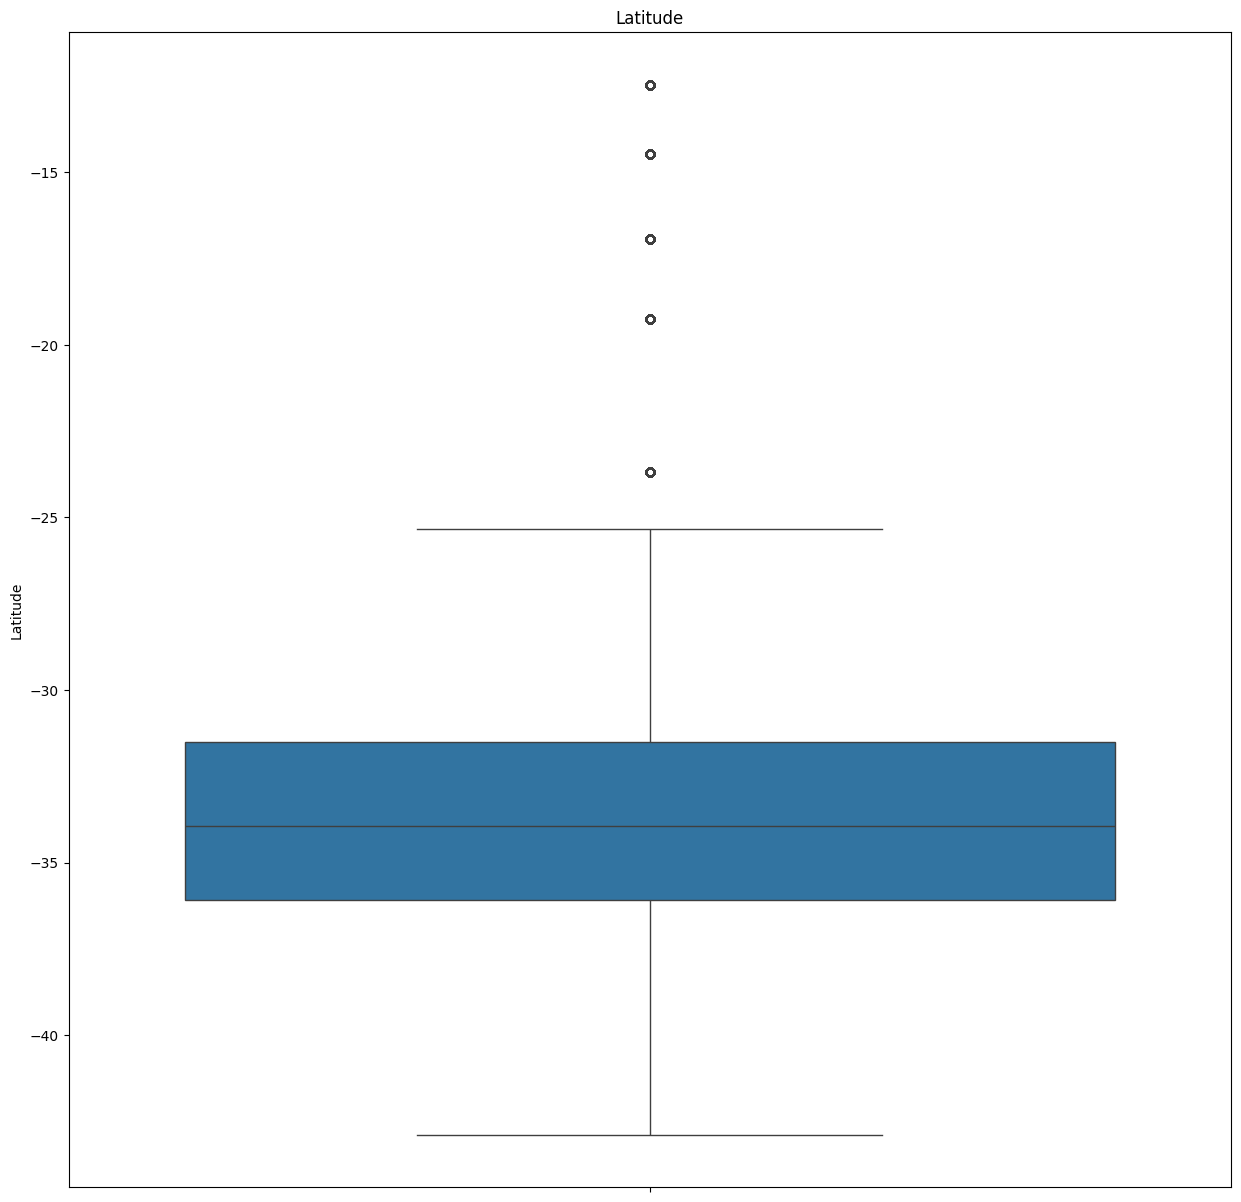

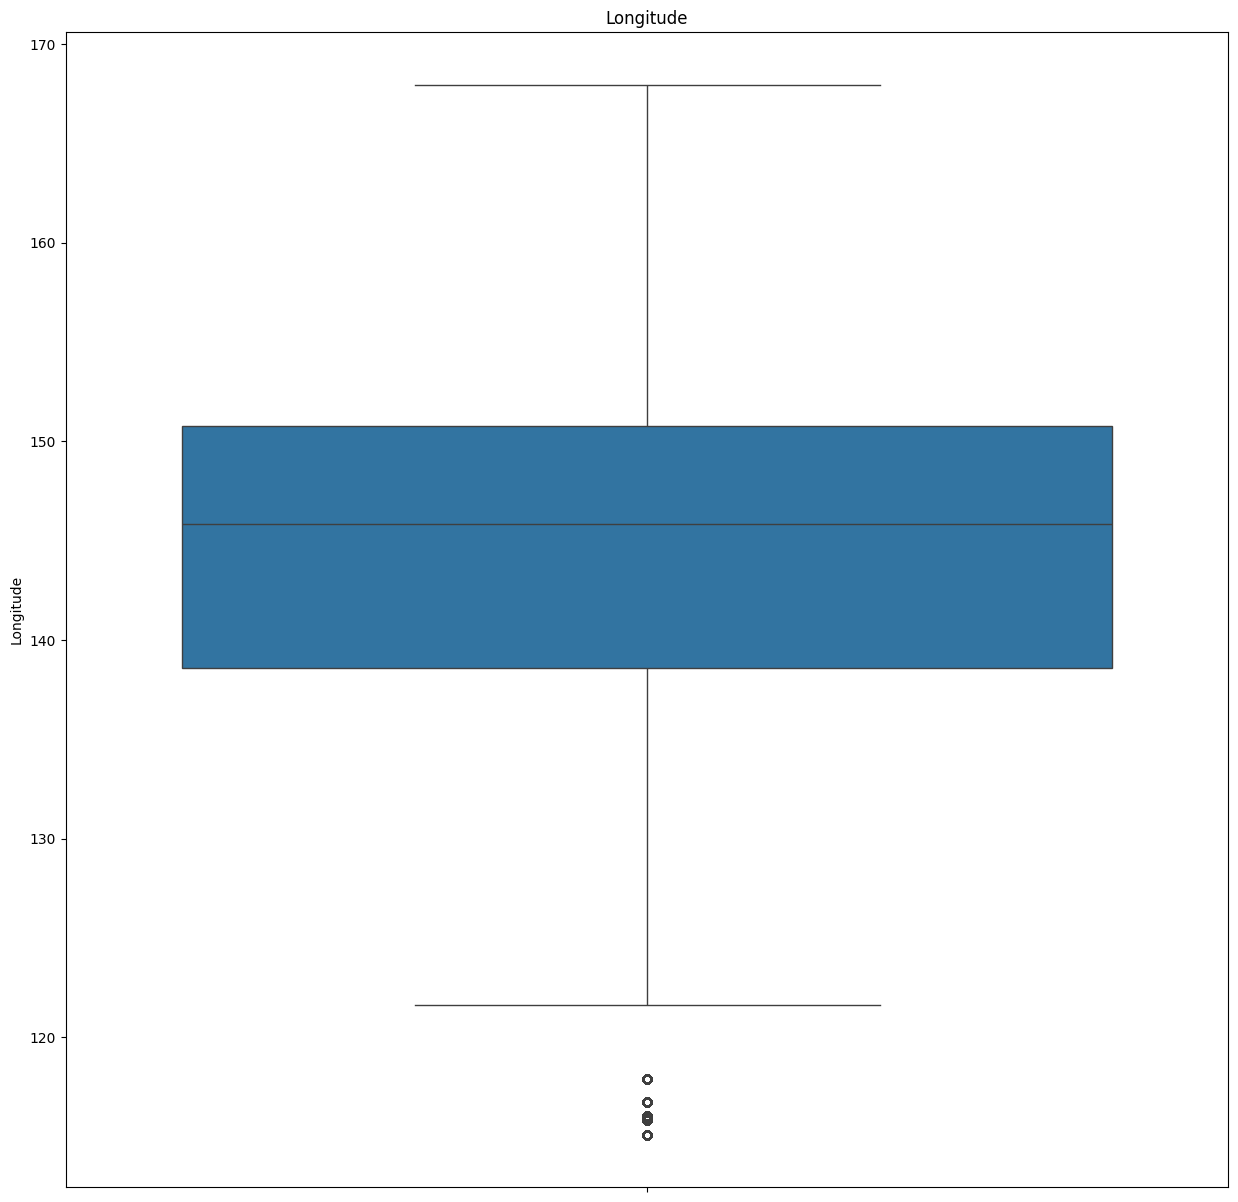

<Figure size 1500x1500 with 0 Axes>

In [52]:
for feature in cont_vars:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
    

In [53]:
for feature in cont_vars:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm
Latitude
Longitude


# MinTemp Column

In [54]:
#another way to do what above is done is to use if condition or loop as shown below
 #for index, row in df.iterrows():
#    if row["MinTemp"] >= 30.45:
  #      df.at[index, "MinTemp"] = 30.45
  #  elif row["MinTemp"] <= -5.95:
  #      df.at[index, "MinTemp"] = -5.95 


In [55]:
# Now we are going to find outliers in every feature of cont_vars and replace them using IQR method

# MaxTemp 

# Rainfall

# Function to replace outlier with IQR method

In [56]:
# calculation upper and lower bound values and replacing ouliers with them using IQR method directly
'''IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)'''

'IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)\nlower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)\nupper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)\nprint(lower_bridge, upper_bridge)'

In [57]:
    #You can find outliers using this IQR method and replace them with lower bound and upper bound values 
    '''     Q1=df["MinTemp"].quantile(0.25)
            Q3=df["MinTemp"].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q3+1.5*IQR
            df.loc[df["MinTemp"] > lower_bound,"MinTemp"]=lower_bound
            df.loc[df["MinTemp"] > upper_bound,"MinTemp"]=upper_bound
            print(upper_bound,lower_bound) '''

'     Q1=df["MinTemp"].quantile(0.25)\n        Q3=df["MinTemp"].quantile(0.75)\n        IQR=Q3-Q1\n        lower_bound=Q1-1.5*IQR\n        upper_bound=Q3+1.5*IQR\n        df.loc[df["MinTemp"] > lower_bound,"MinTemp"]=lower_bound\n        df.loc[df["MinTemp"] > upper_bound,"MinTemp"]=upper_bound\n        print(upper_bound,lower_bound) '

In [58]:
# Instead of calculating IQR, lower bound and upper bound for every column,we replace it with a function and call it whenever necessary

In [59]:


def replace_outliers_with_bounds(df, cont_vars):
    for column in cont_vars:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with lower and upper bounds
        df.loc[df[column] < lower_bound, column] = lower_bound
        df.loc[df[column] > upper_bound, column] = upper_bound



replace_outliers_with_bounds(df, cont_vars)

# Print or handle the modified DataFrame
print(df)


       Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0       NaT        30     13.4  22.900000       0.6     5.468232  7.611178   
1       NaT        30      7.4  25.100000       0.0     5.468232  7.611178   
2       NaT        30     12.9  25.700000       0.0     5.468232  7.611178   
3       NaT        30      9.2  28.000000       0.0     5.468232  7.611178   
4       NaT        30     17.5  32.300000       1.0     5.468232  7.611178   
...     ...       ...      ...        ...       ...          ...       ...   
145455  NaT        49      2.8  23.400000       0.0     5.468232  7.611178   
145456  NaT        49      3.6  25.300000       0.0     5.468232  7.611178   
145457  NaT        49      5.4  26.900000       0.0     5.468232  7.611178   
145458  NaT        49      7.8  27.000000       0.0     5.468232  7.611178   
145459  NaT        49     14.9  23.221348       0.0     5.468232  7.611178   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  Win

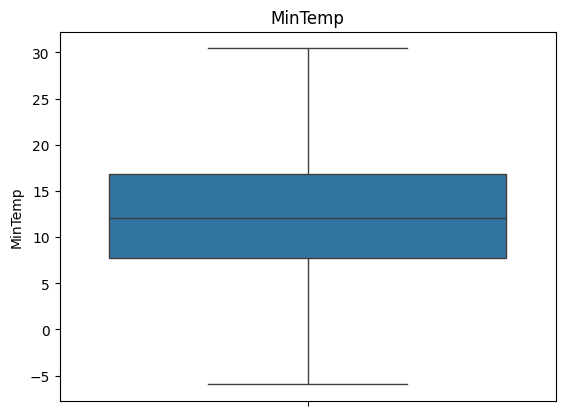

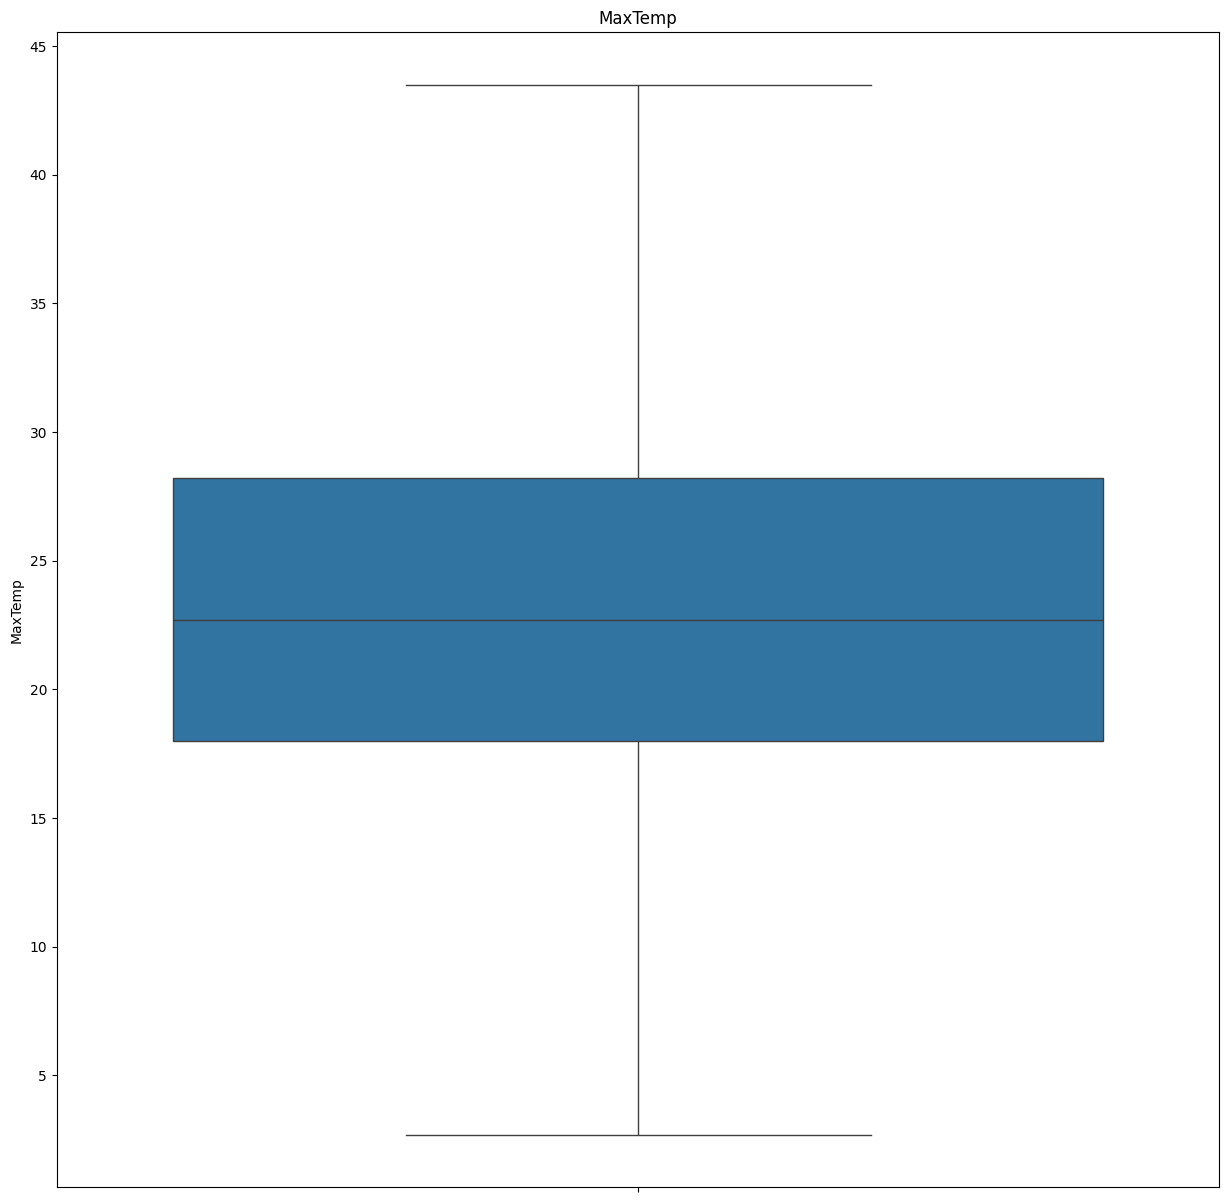

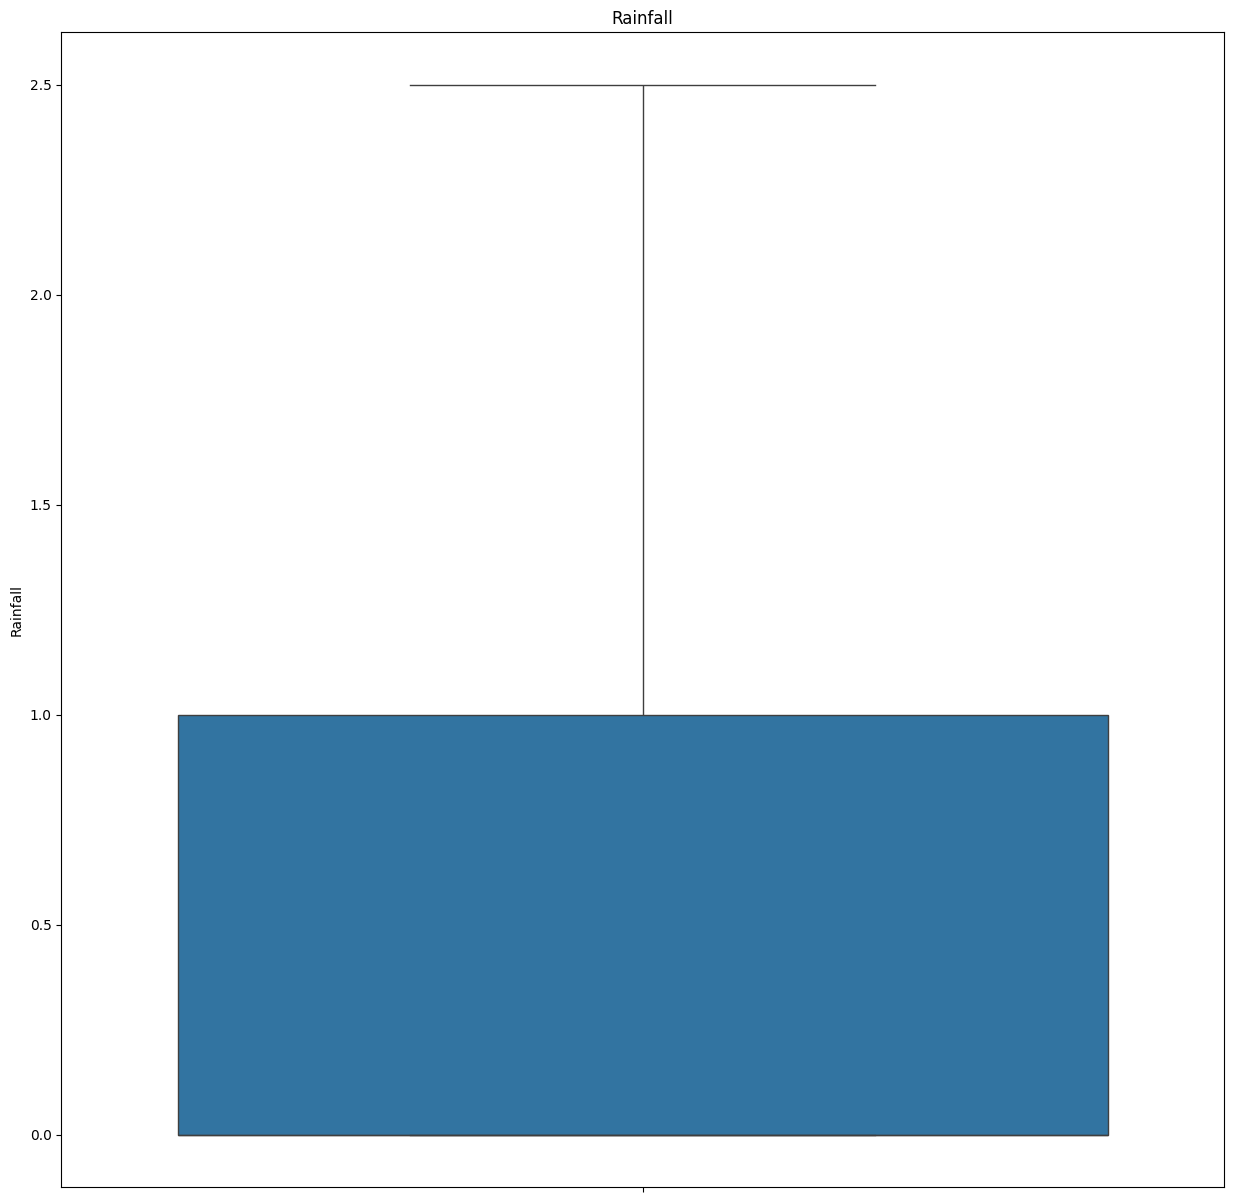

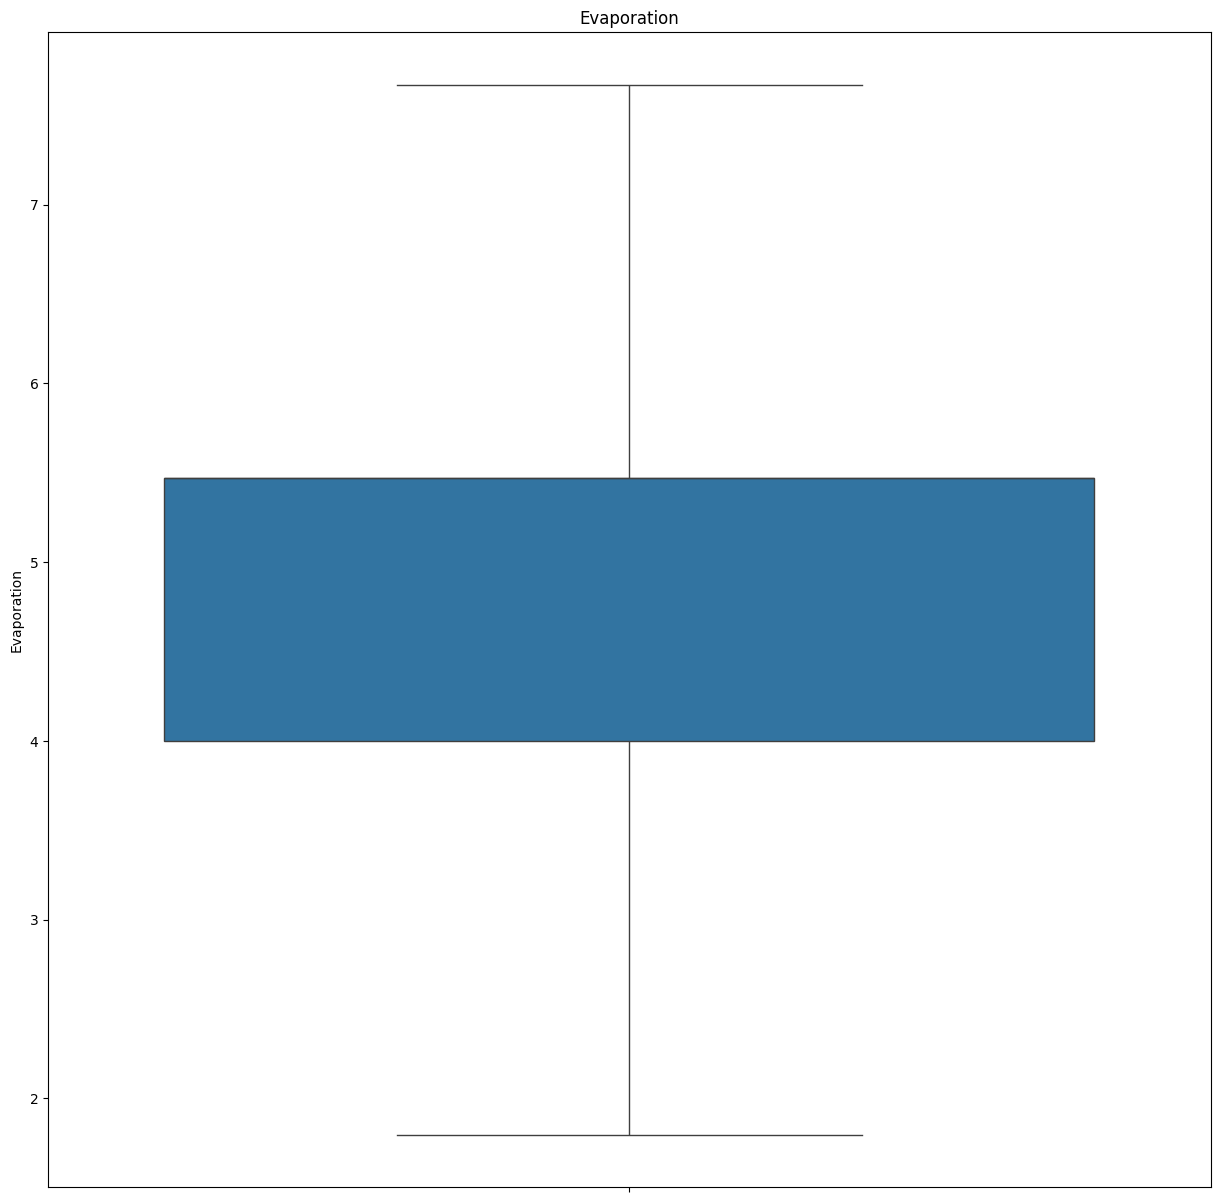

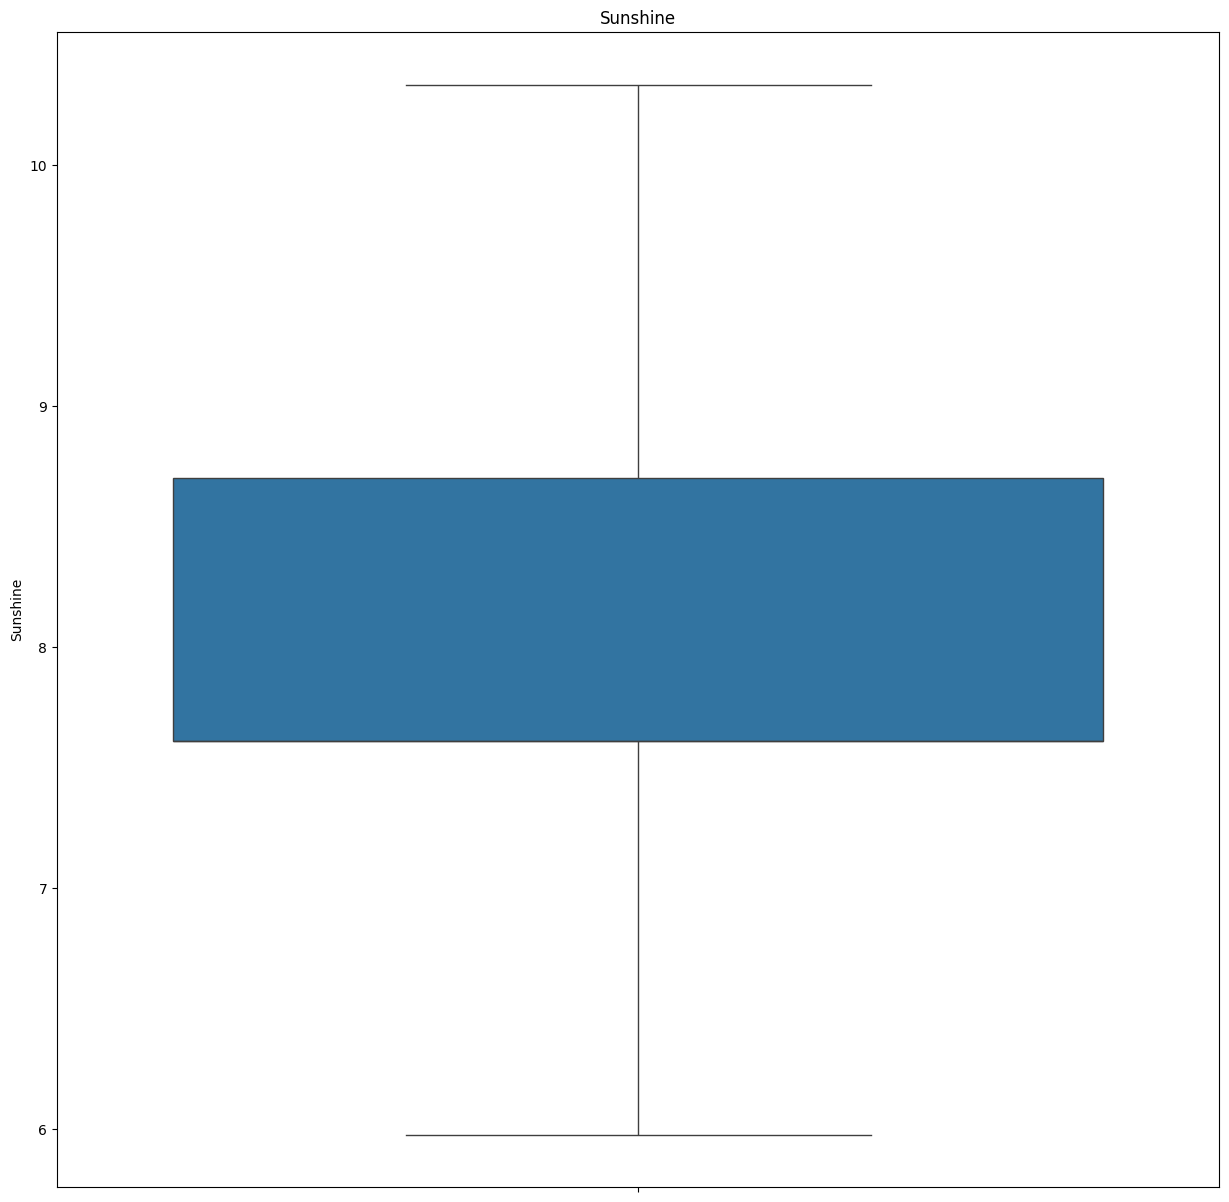

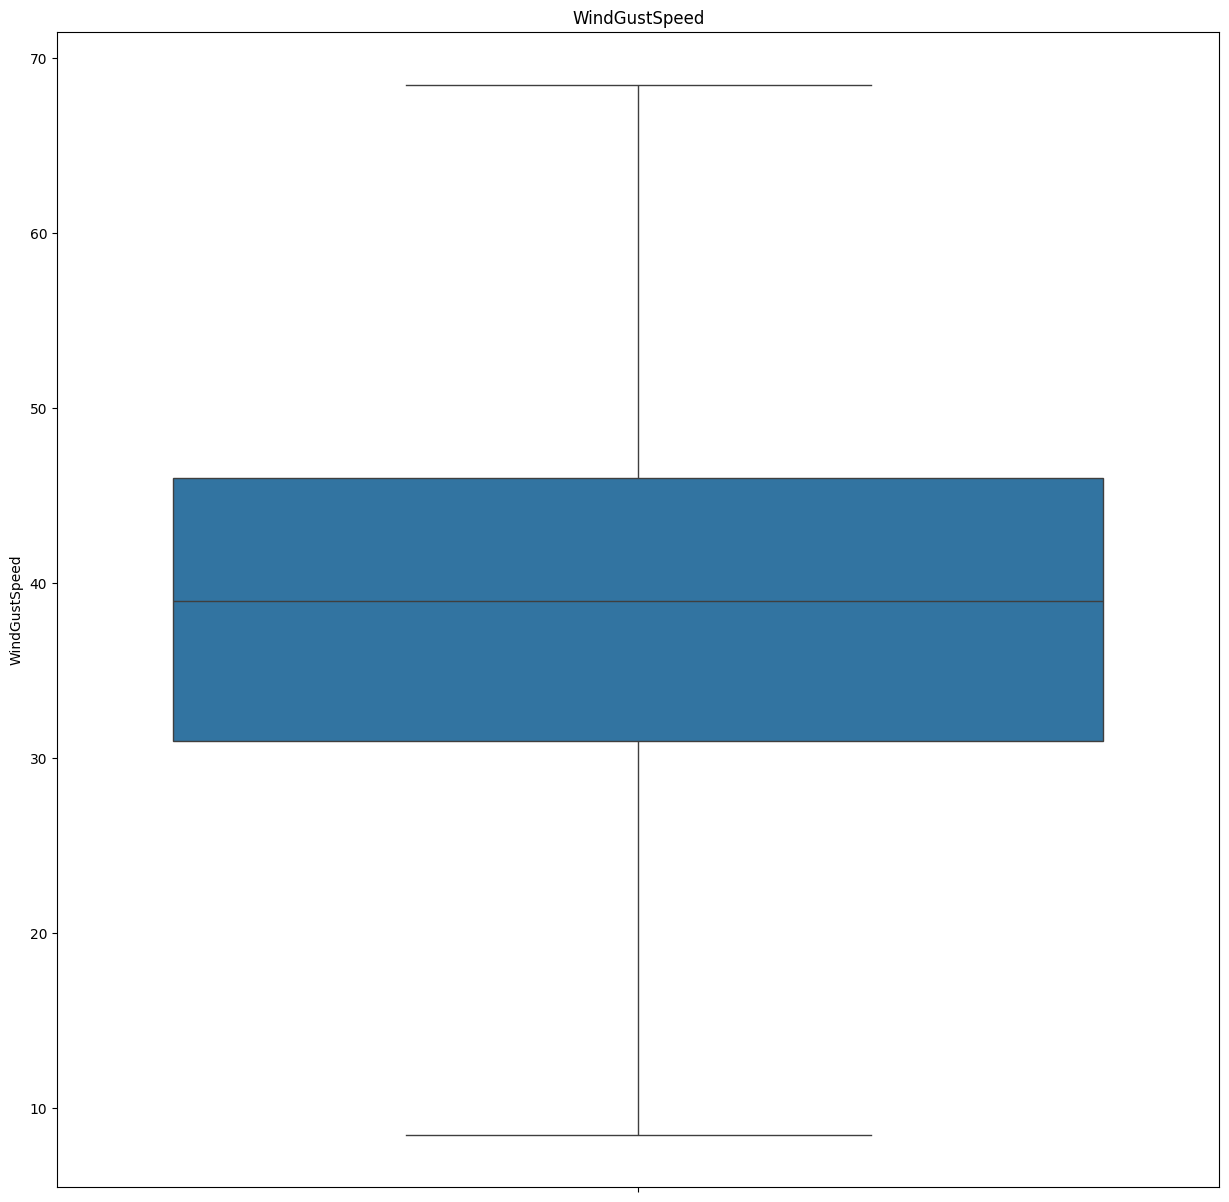

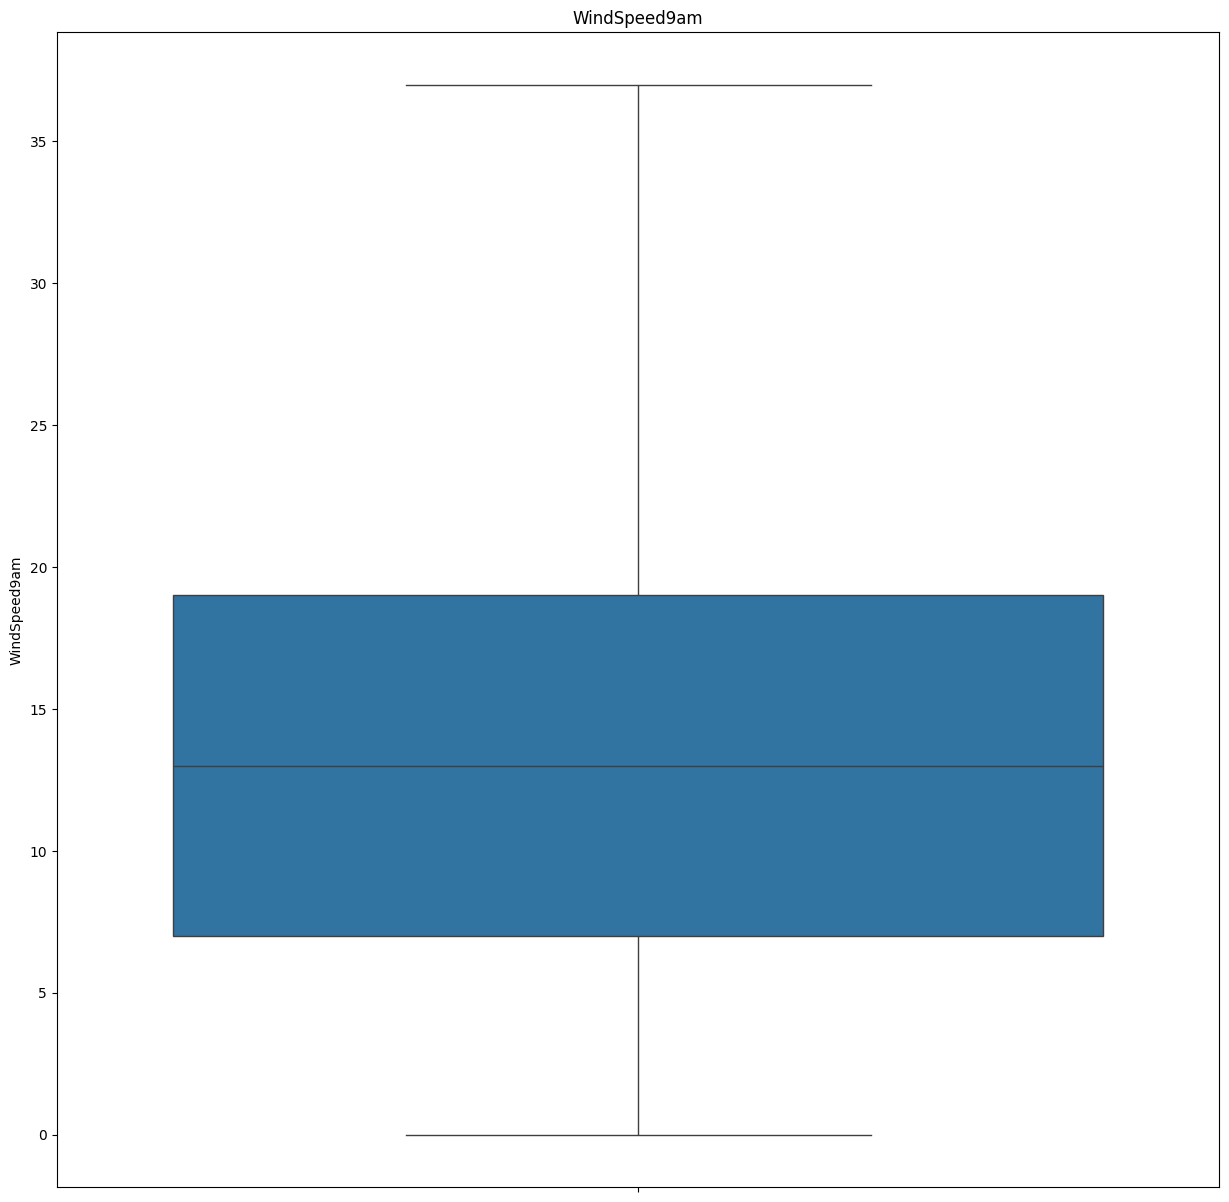

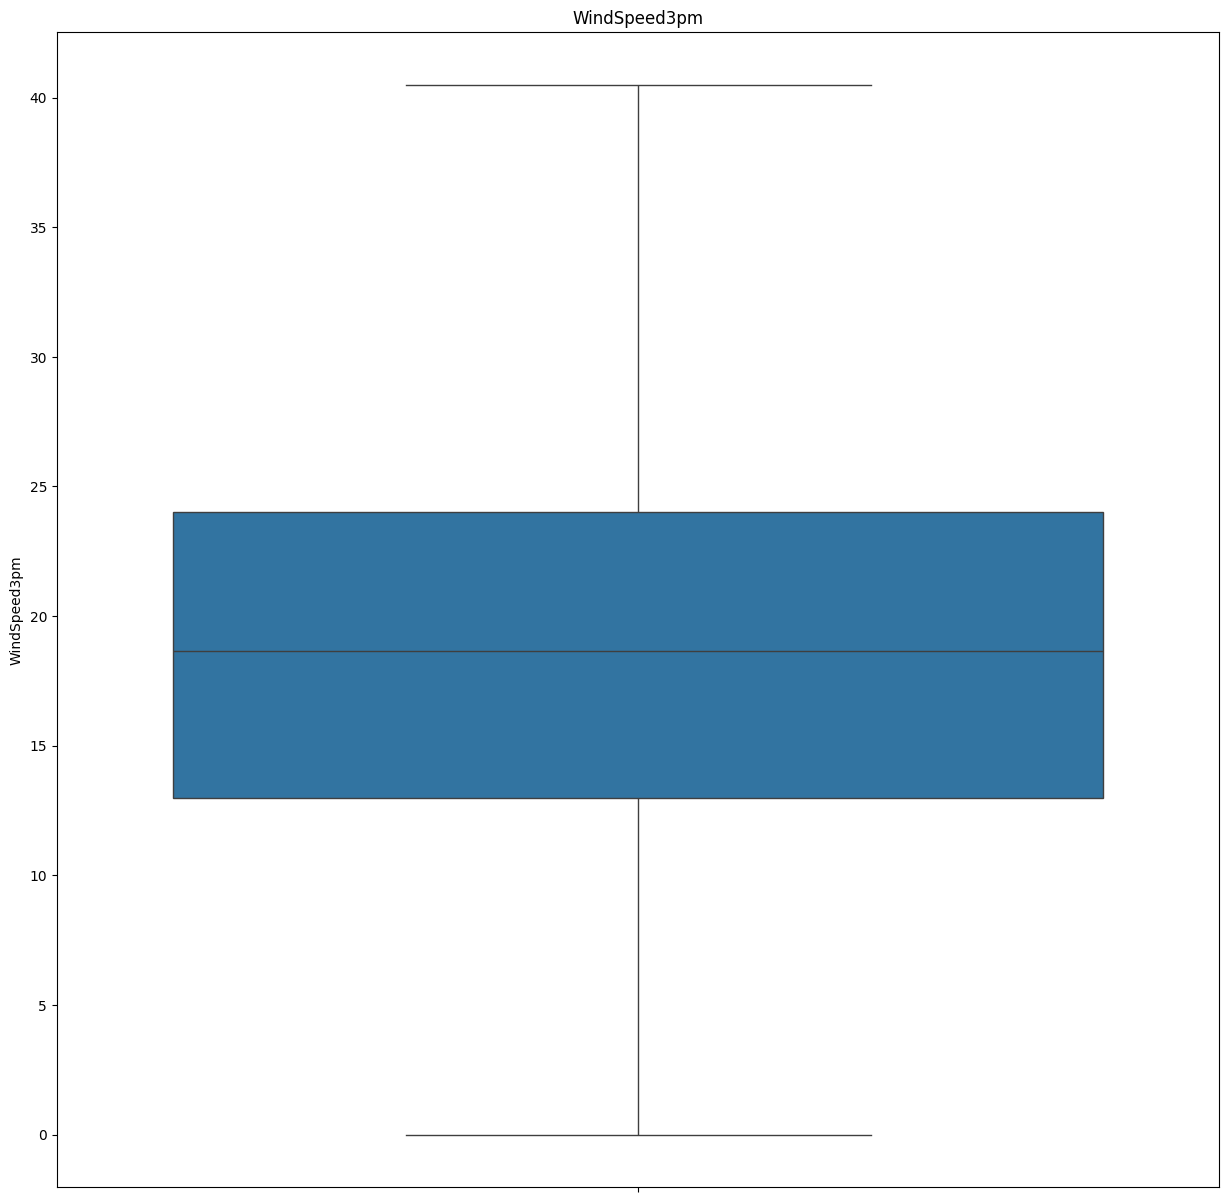

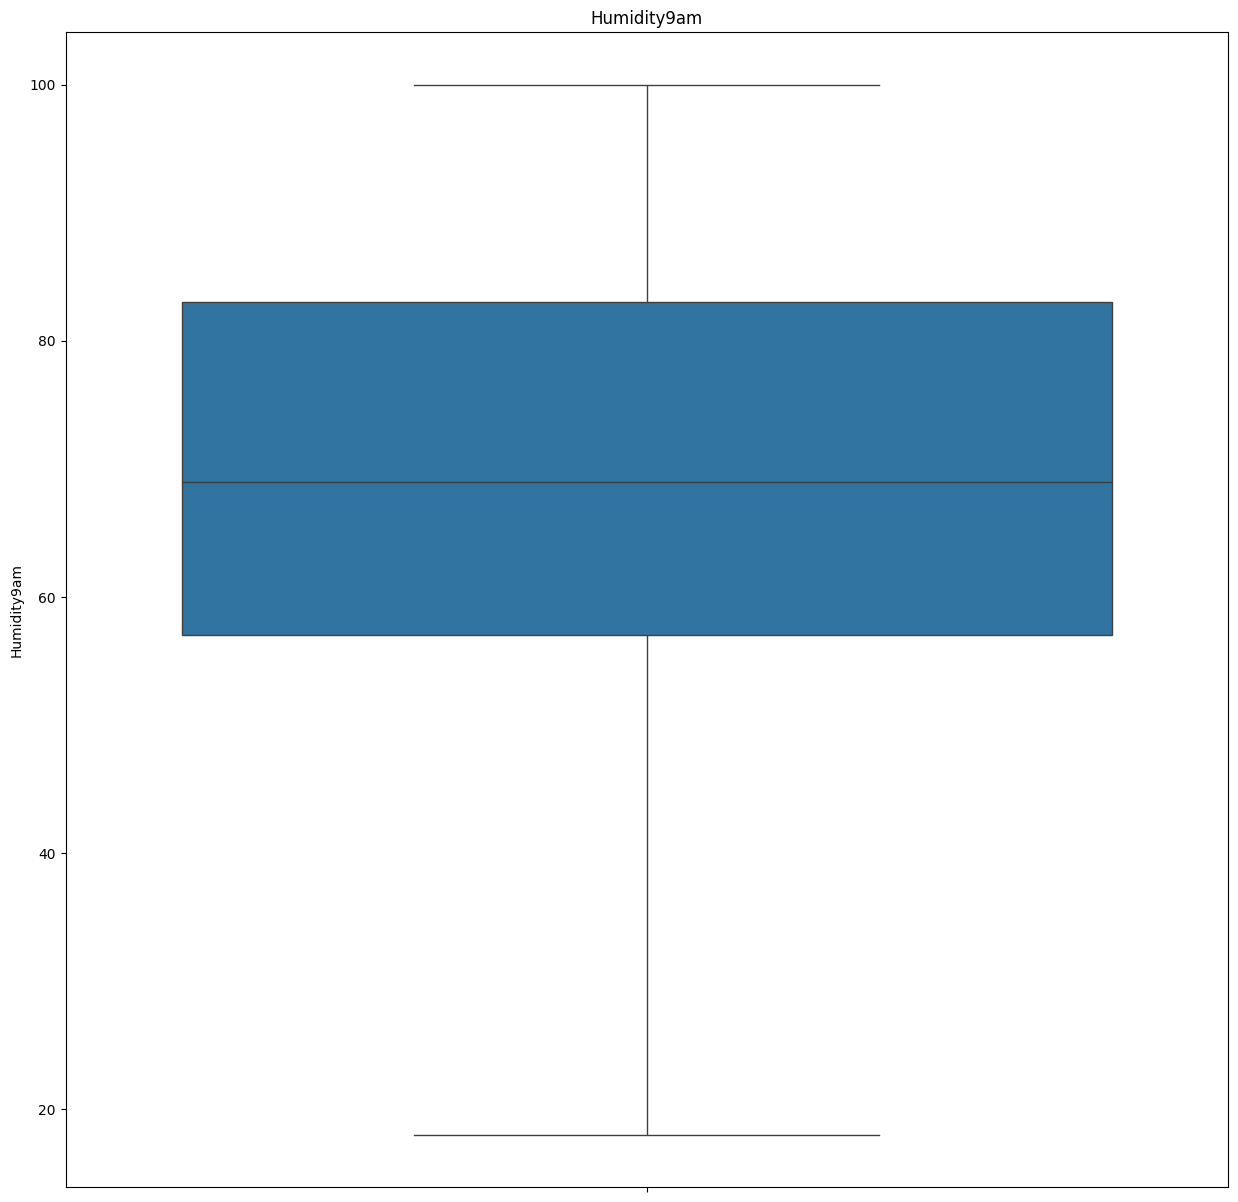

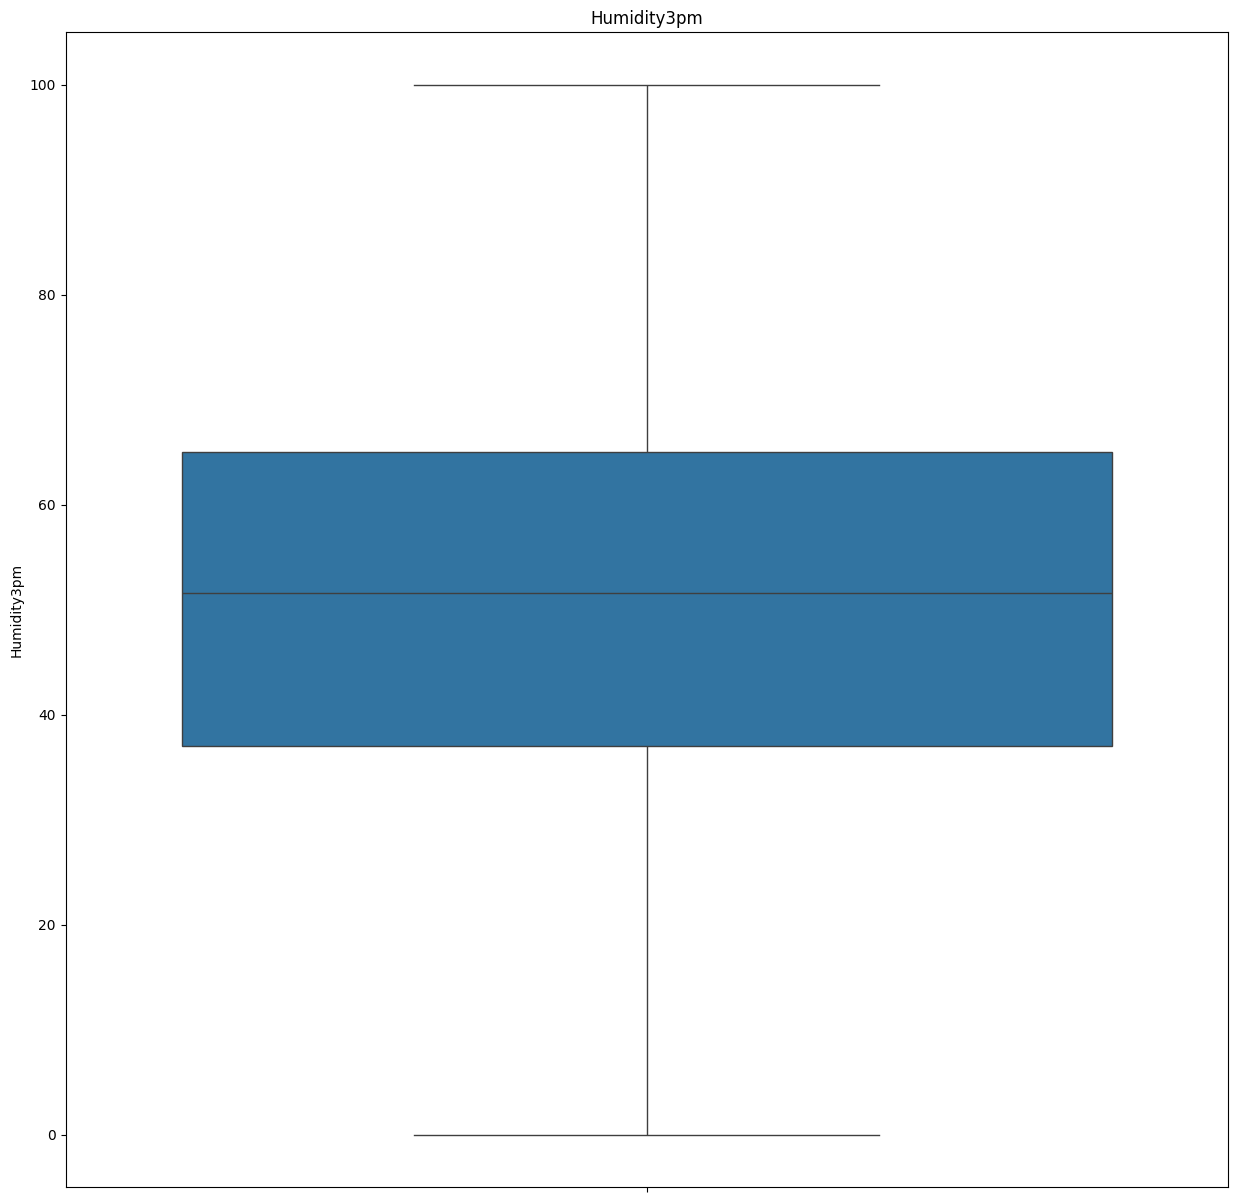

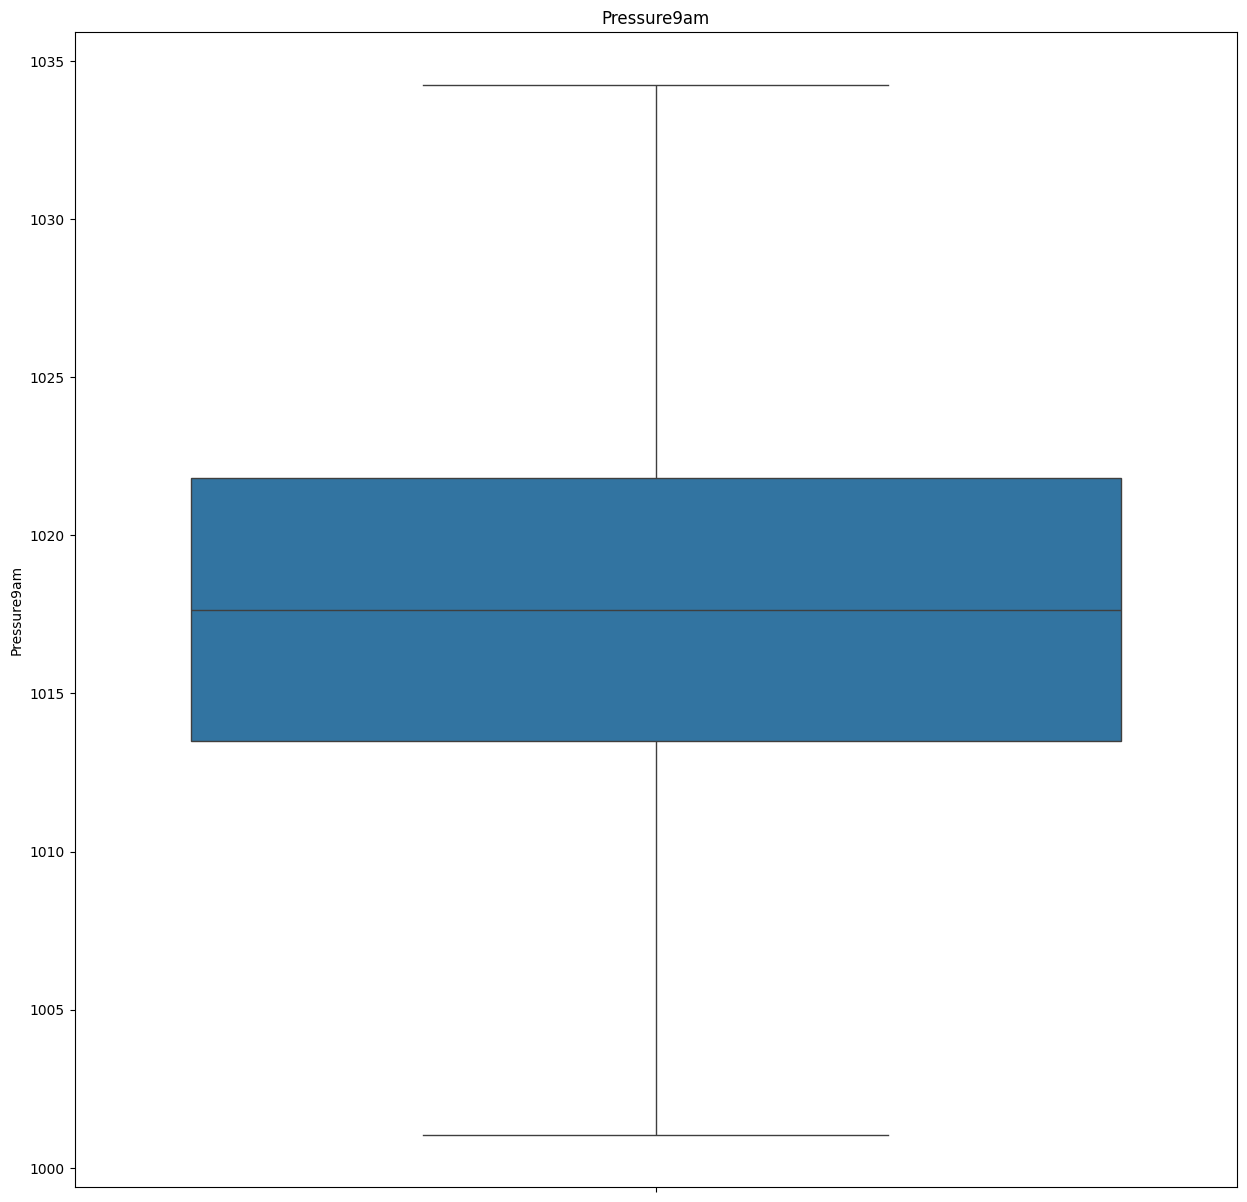

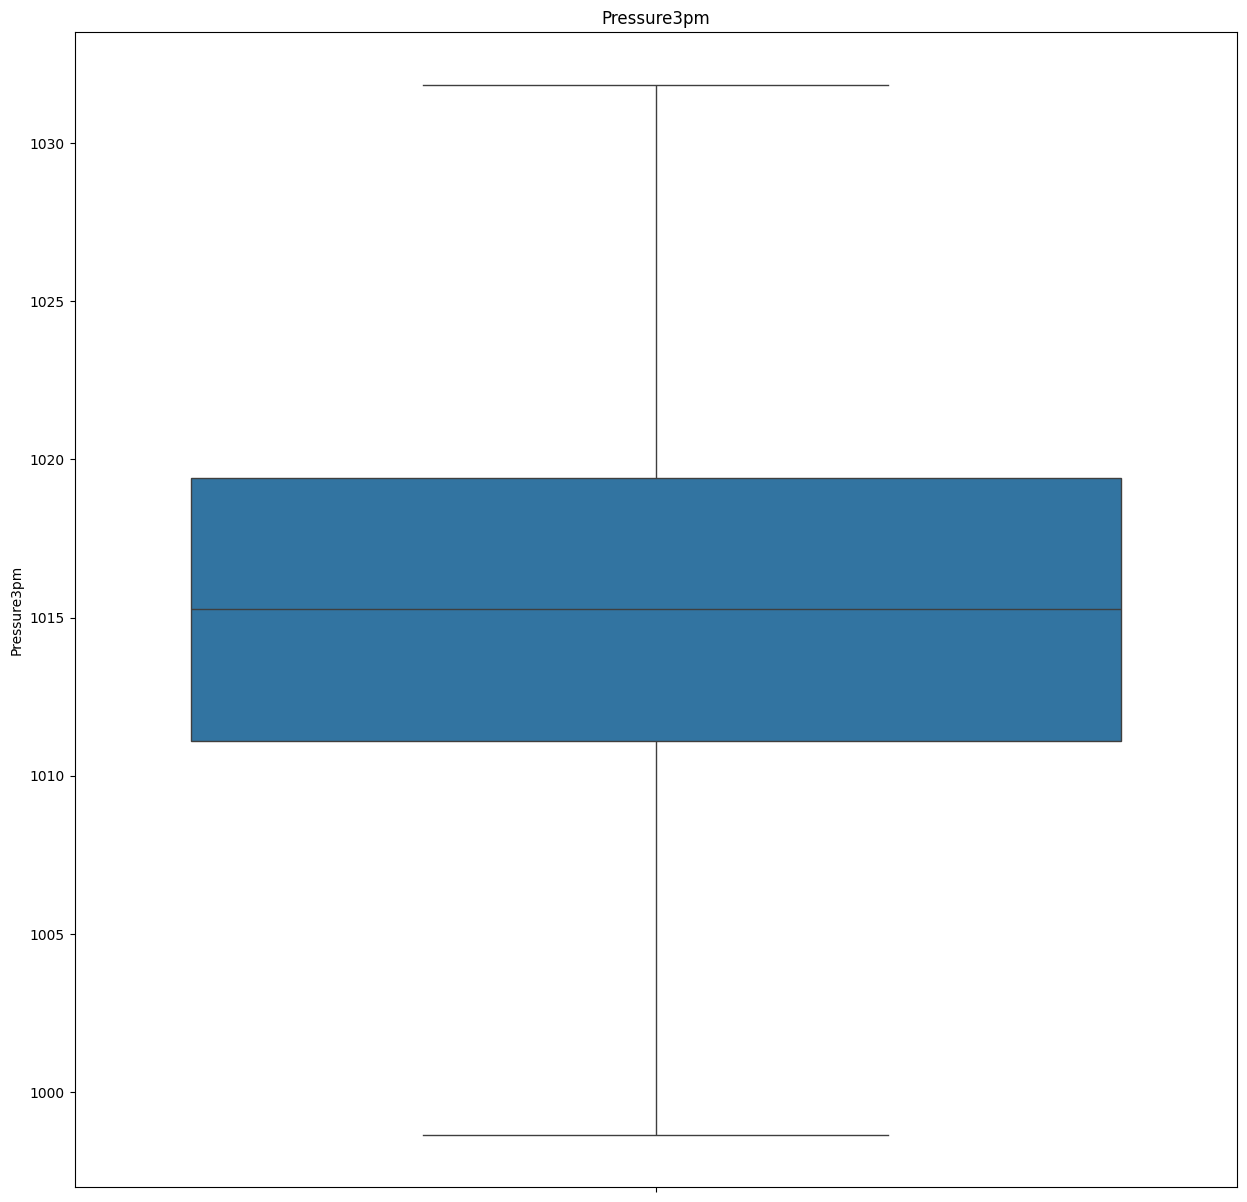

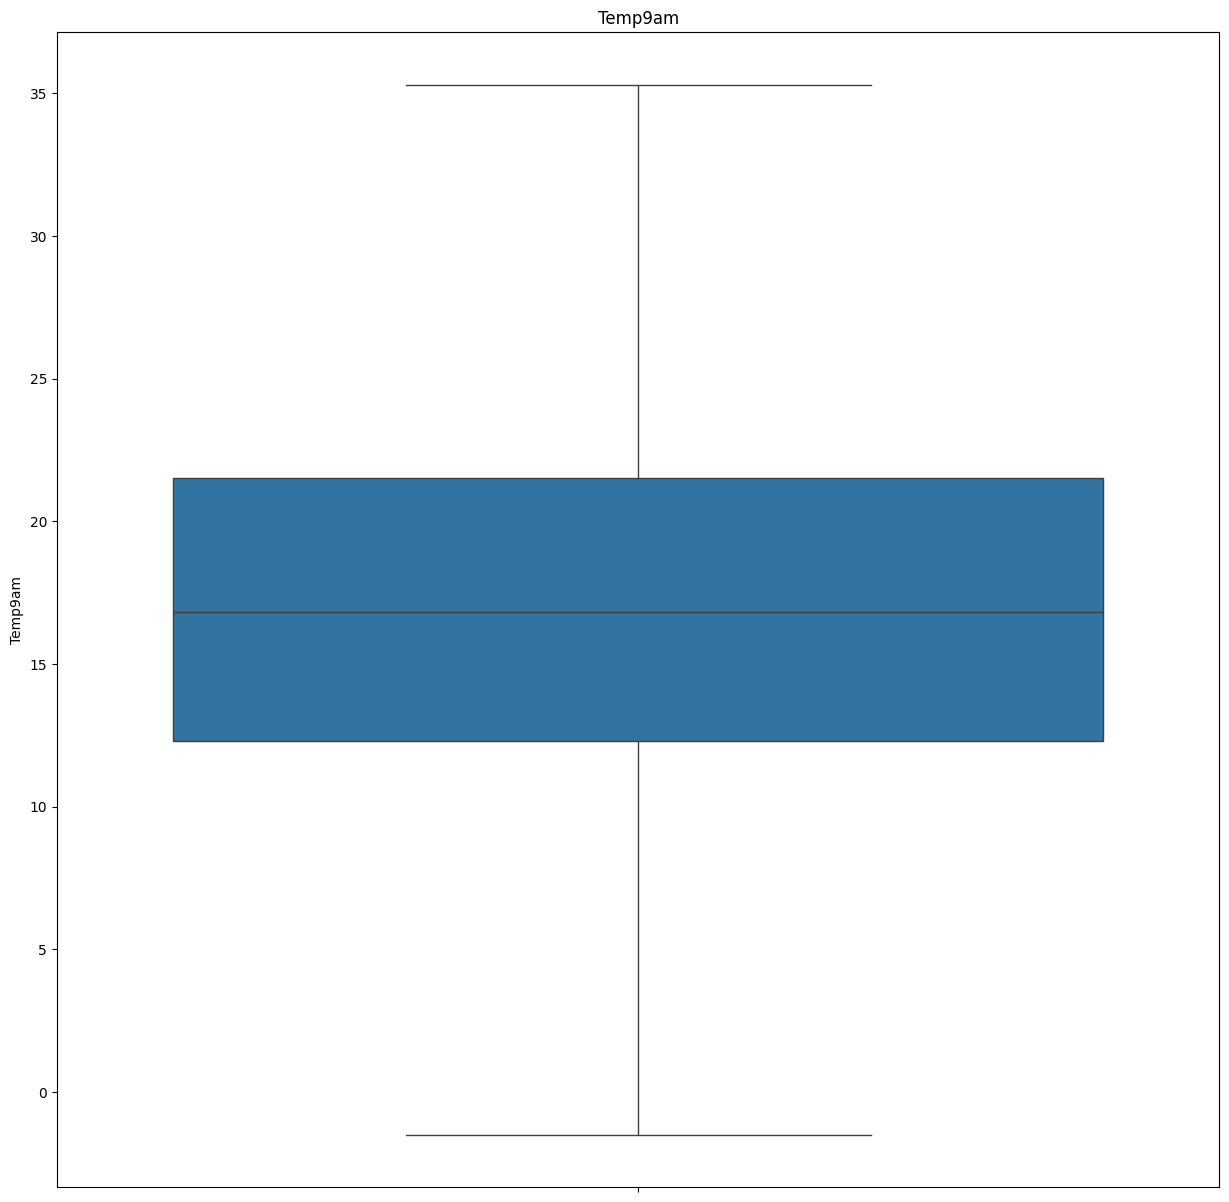

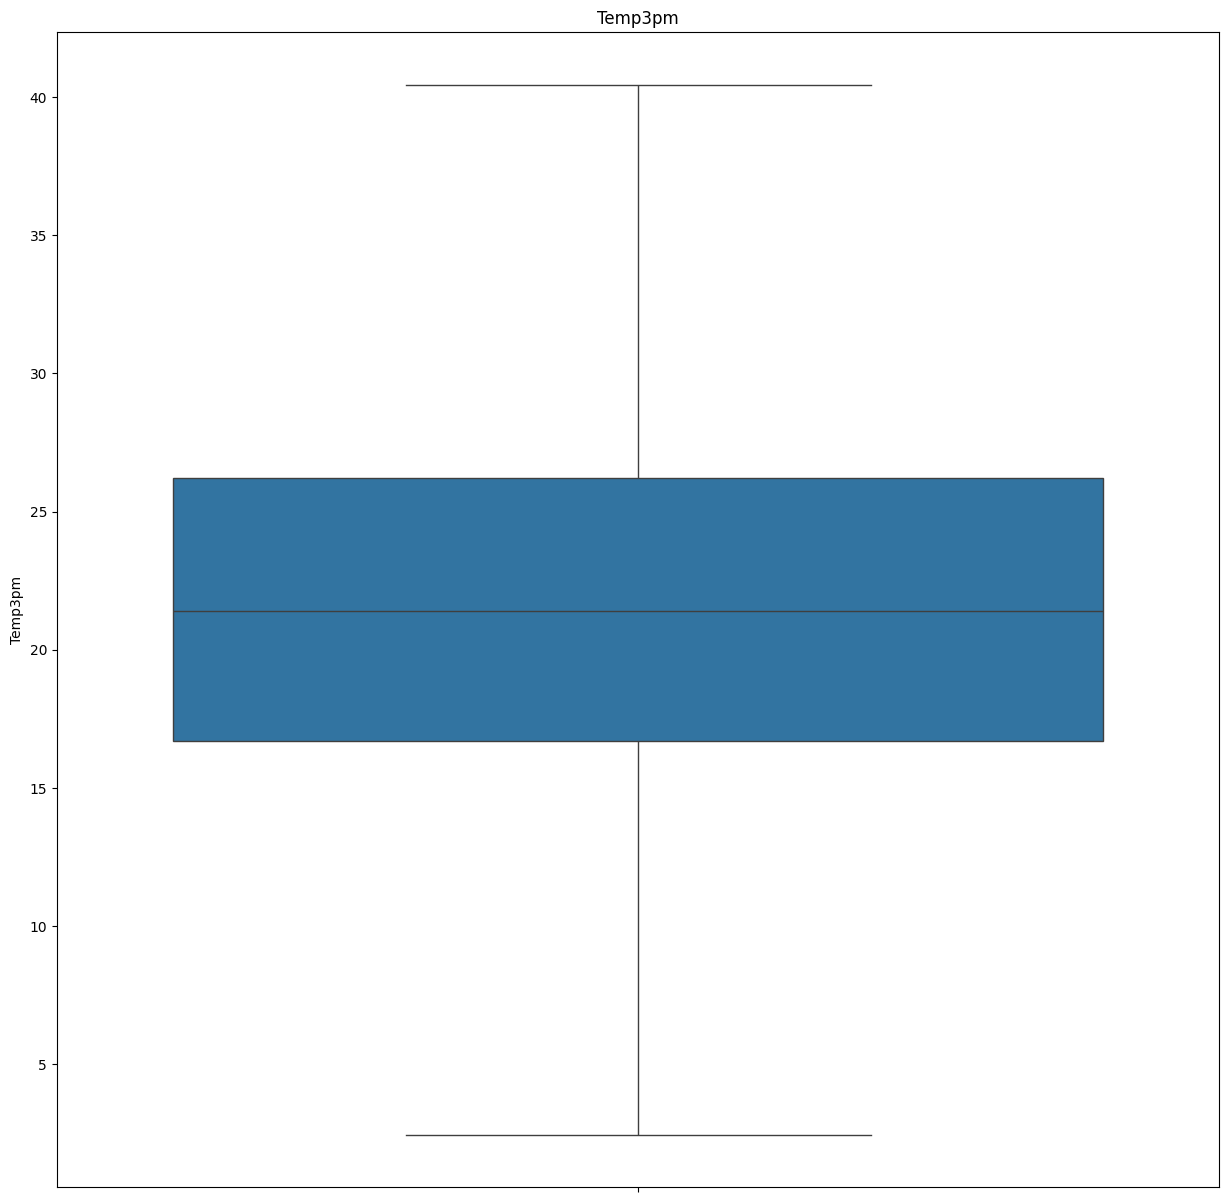

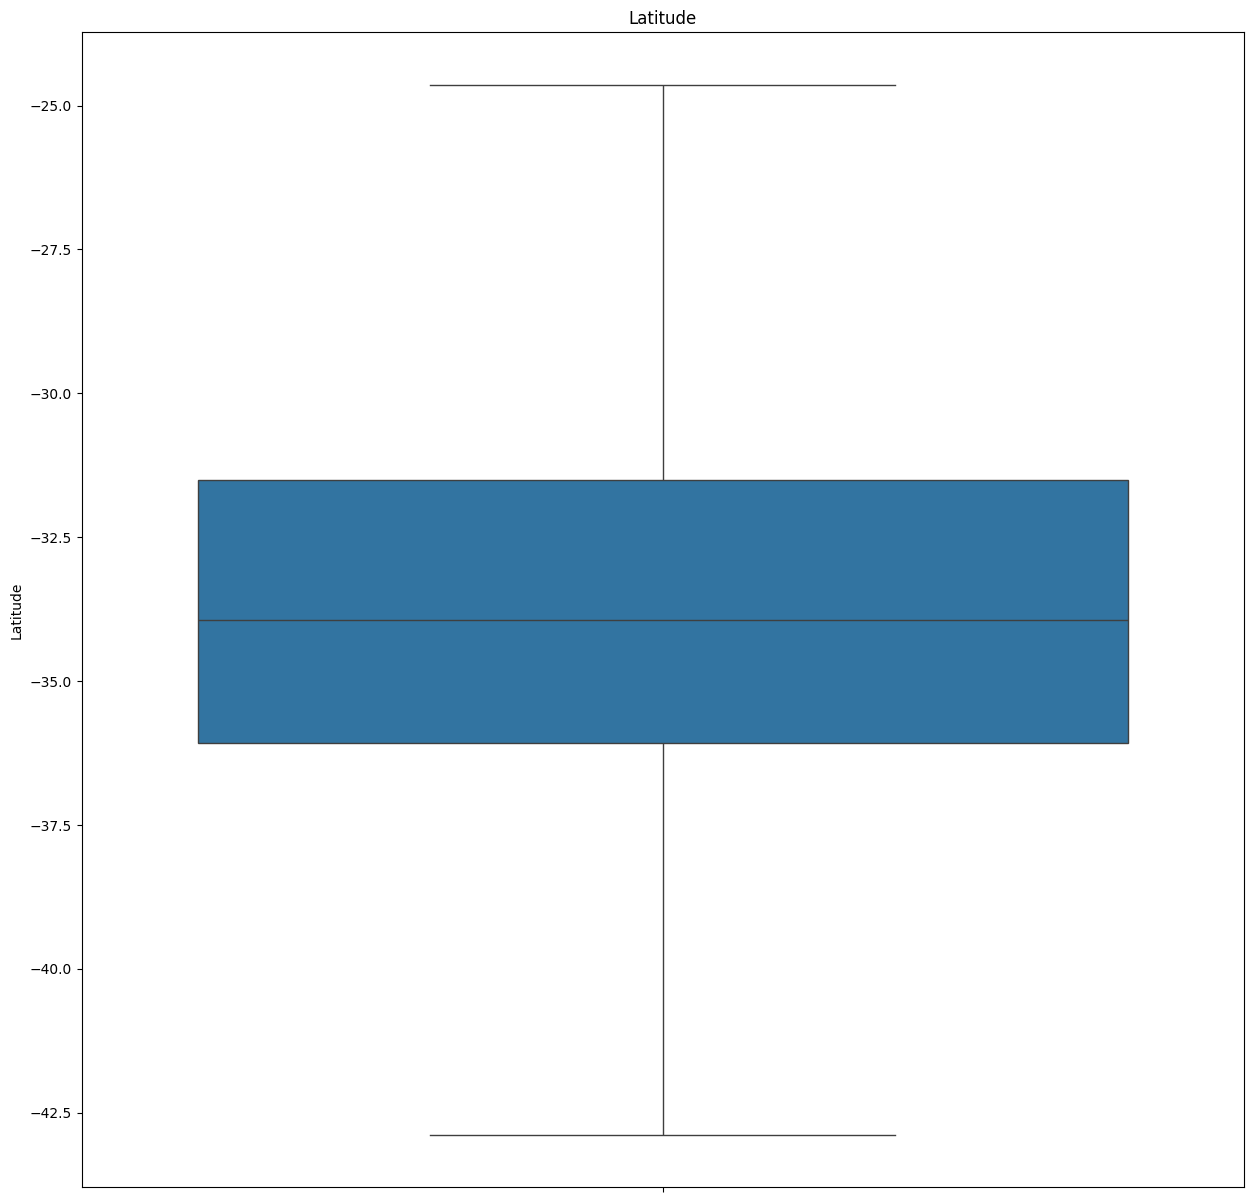

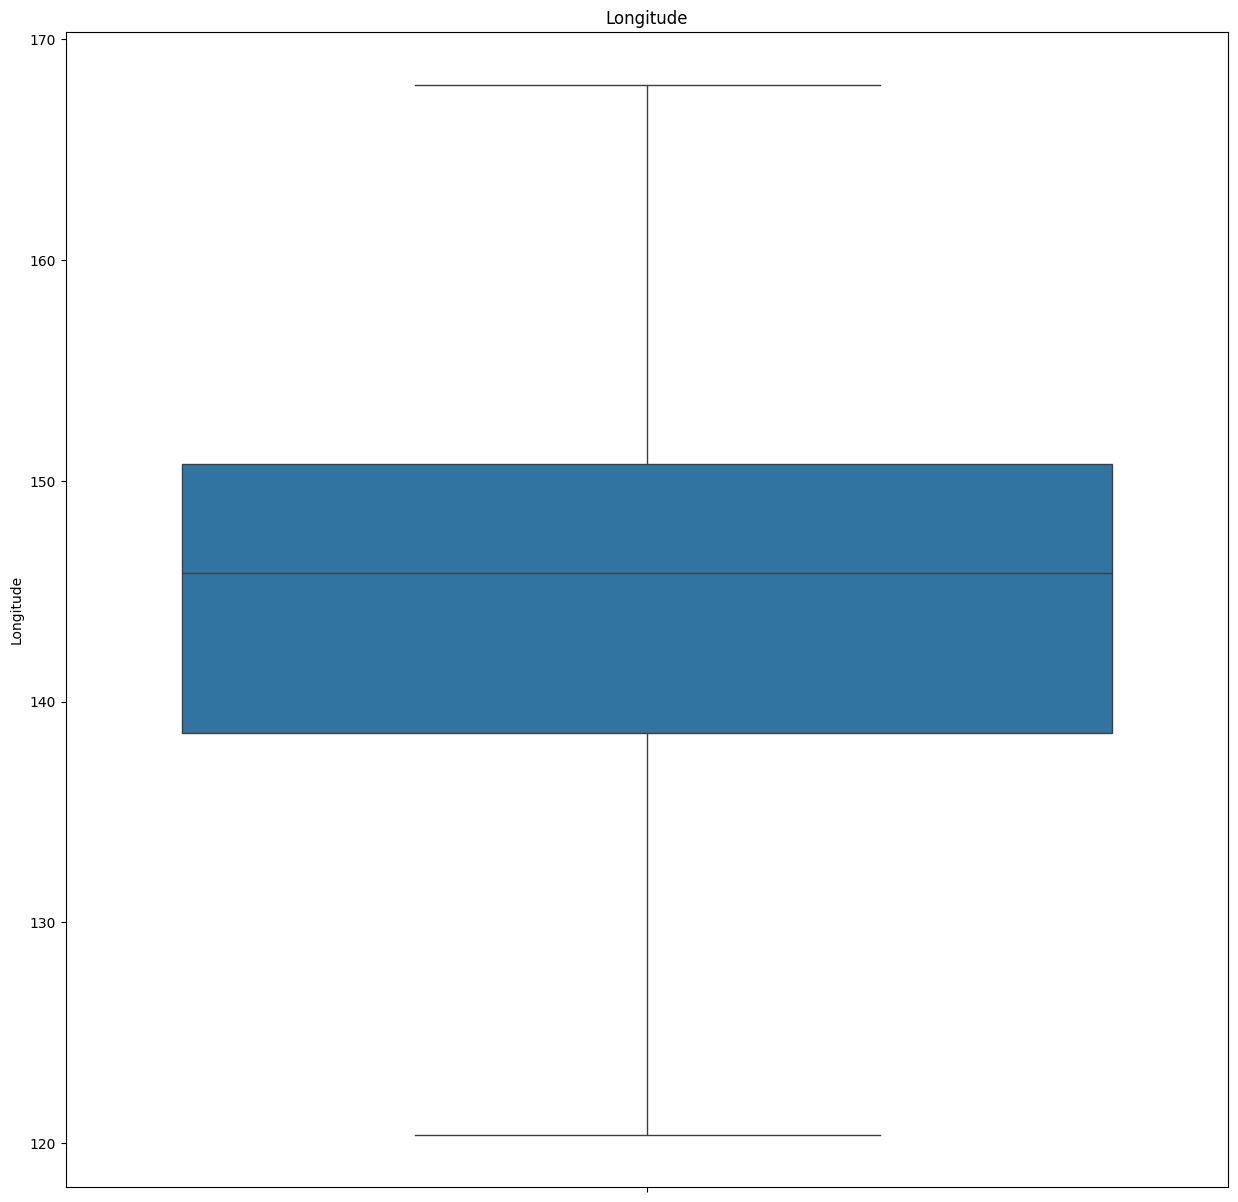

<Figure size 1500x1500 with 0 Axes>

In [60]:
for feature in cont_vars:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

MinTemp


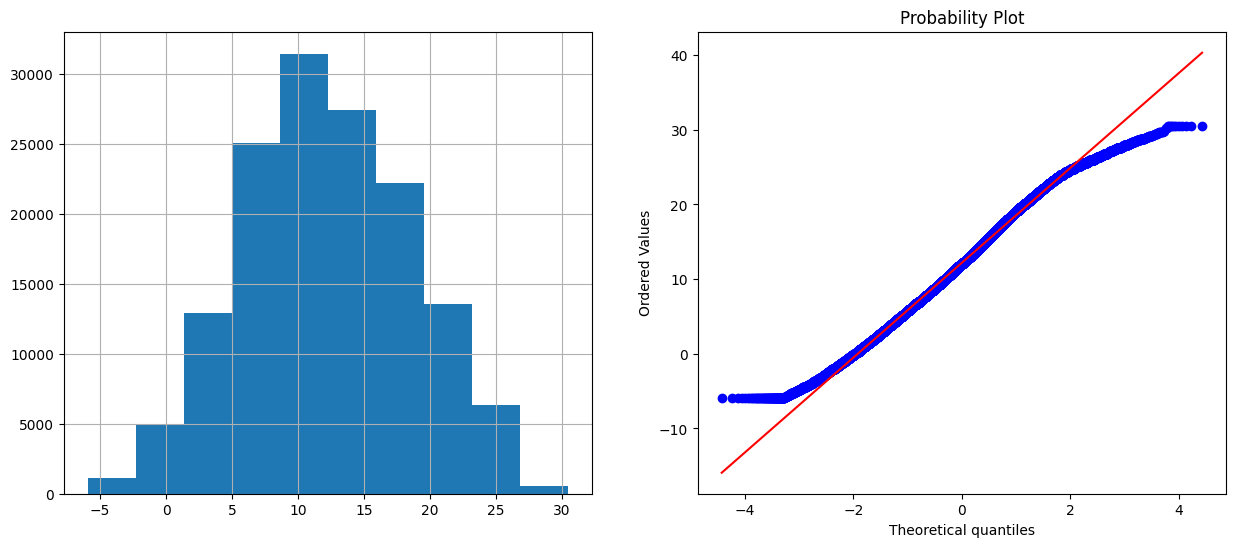

MaxTemp


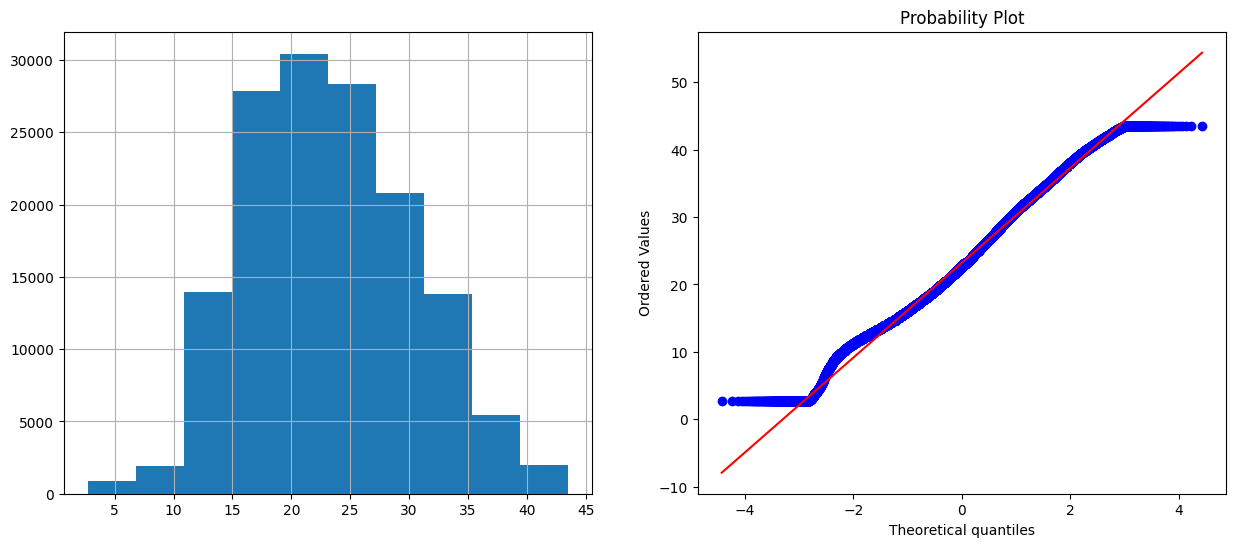

Rainfall


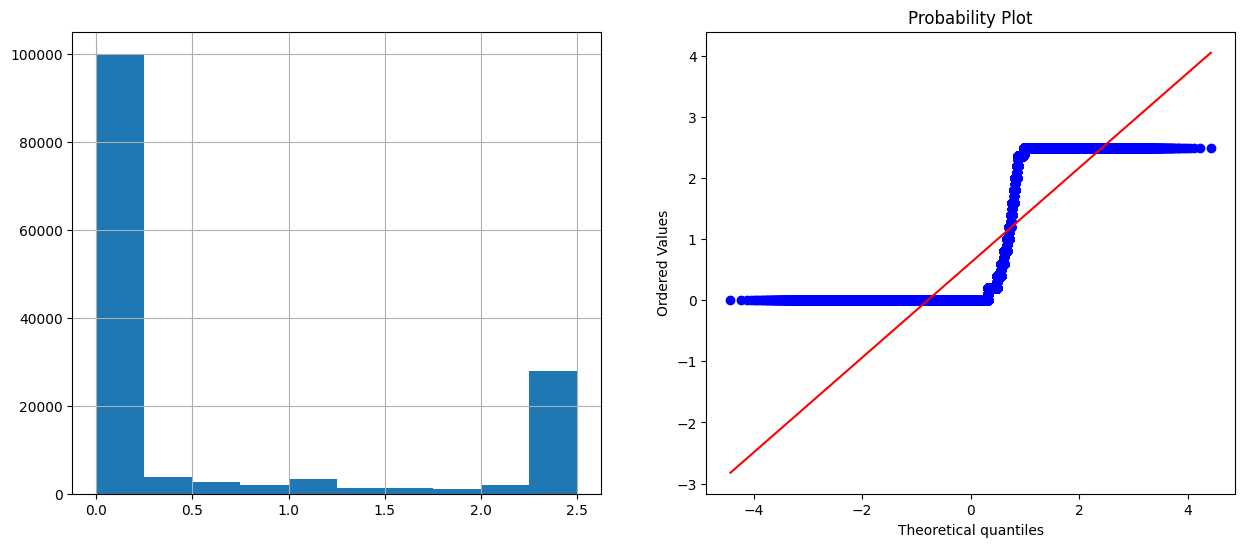

Evaporation


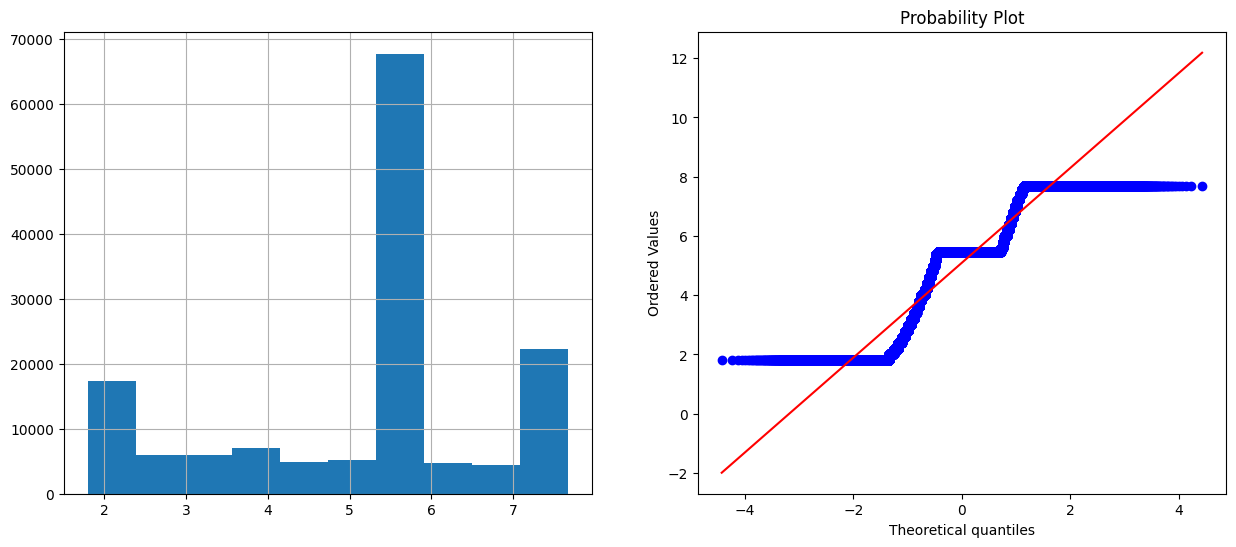

Sunshine


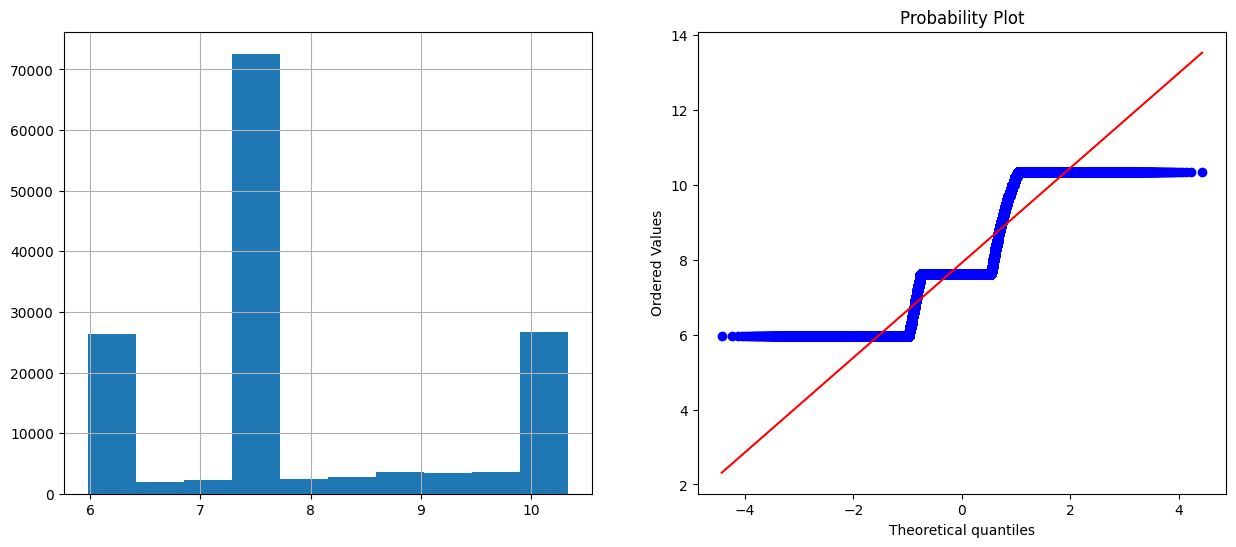

WindGustSpeed


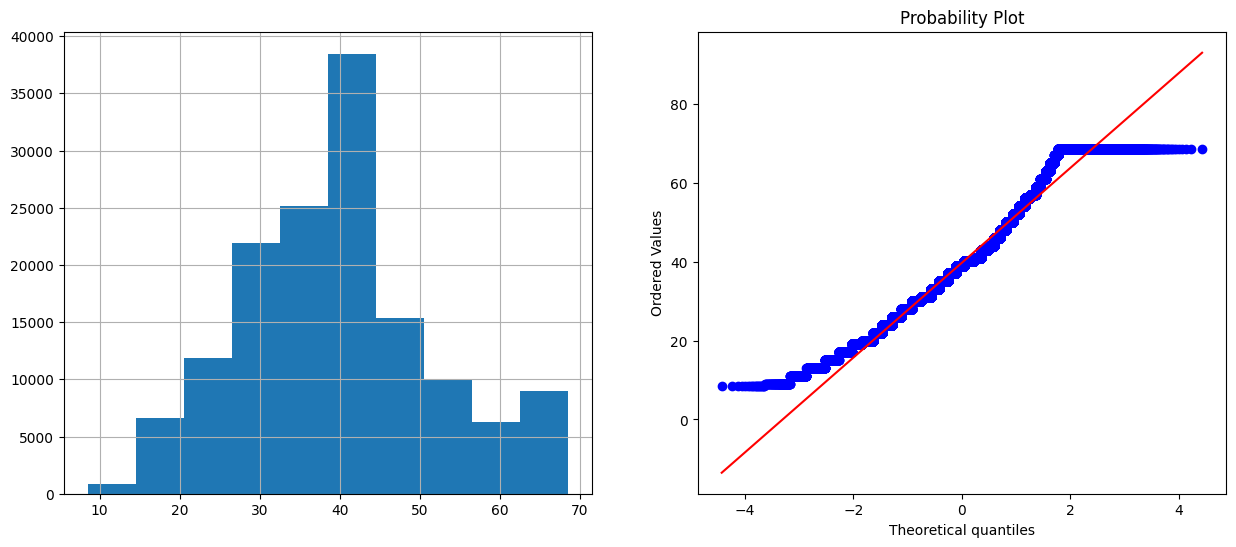

WindSpeed9am


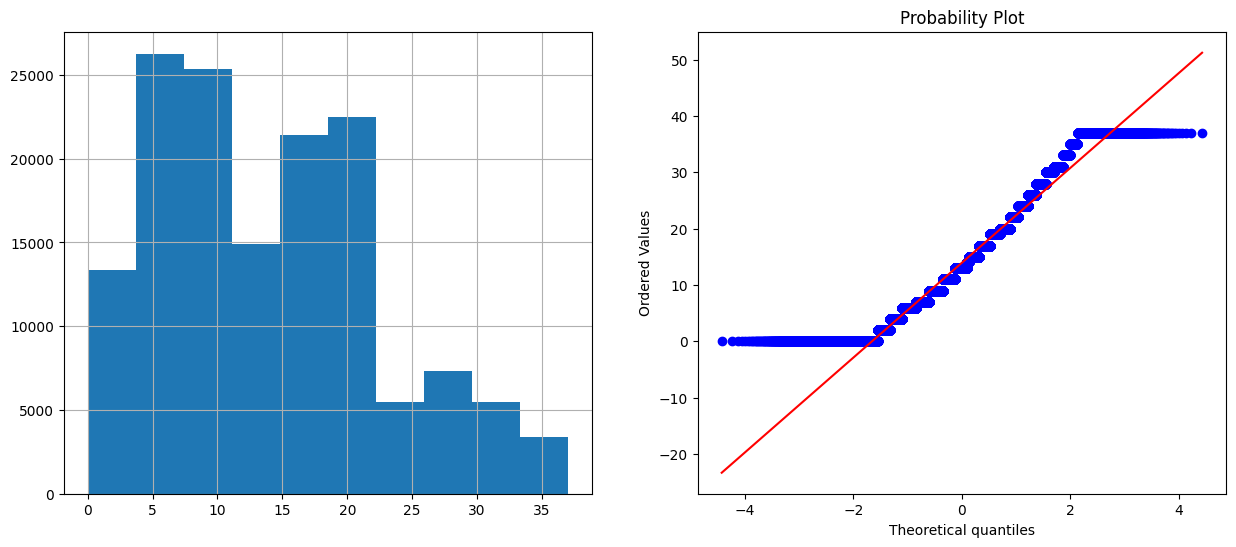

WindSpeed3pm


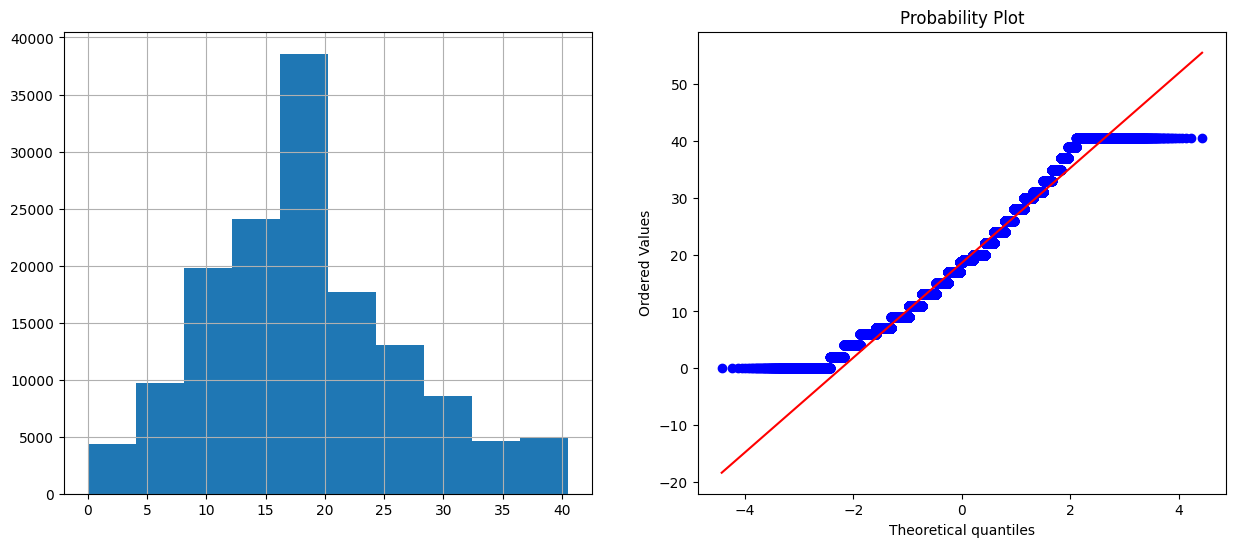

Humidity9am


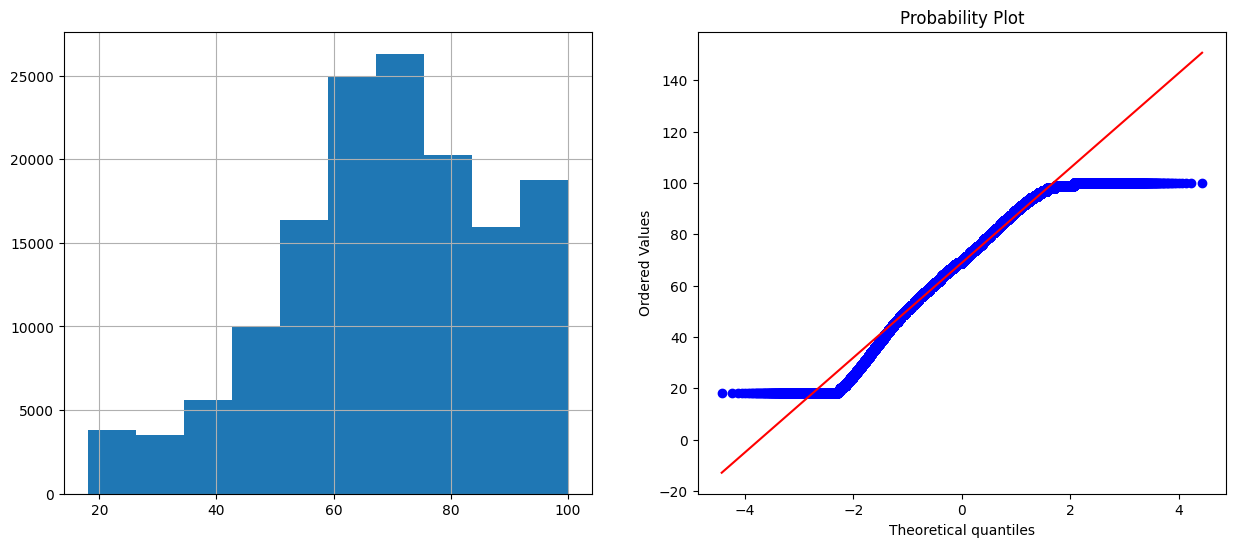

Humidity3pm


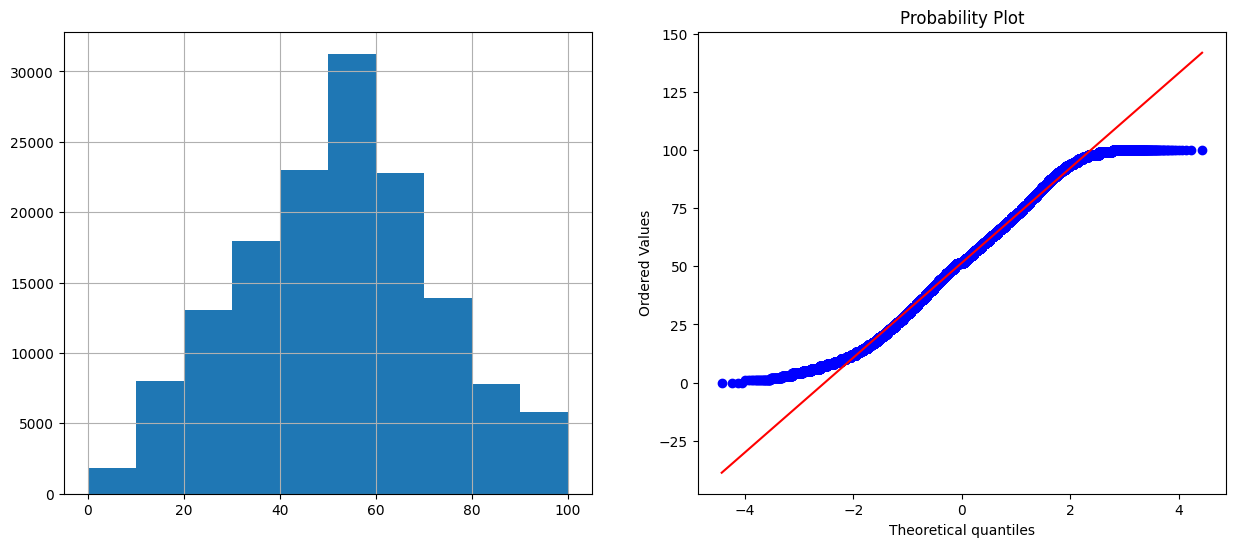

Pressure9am


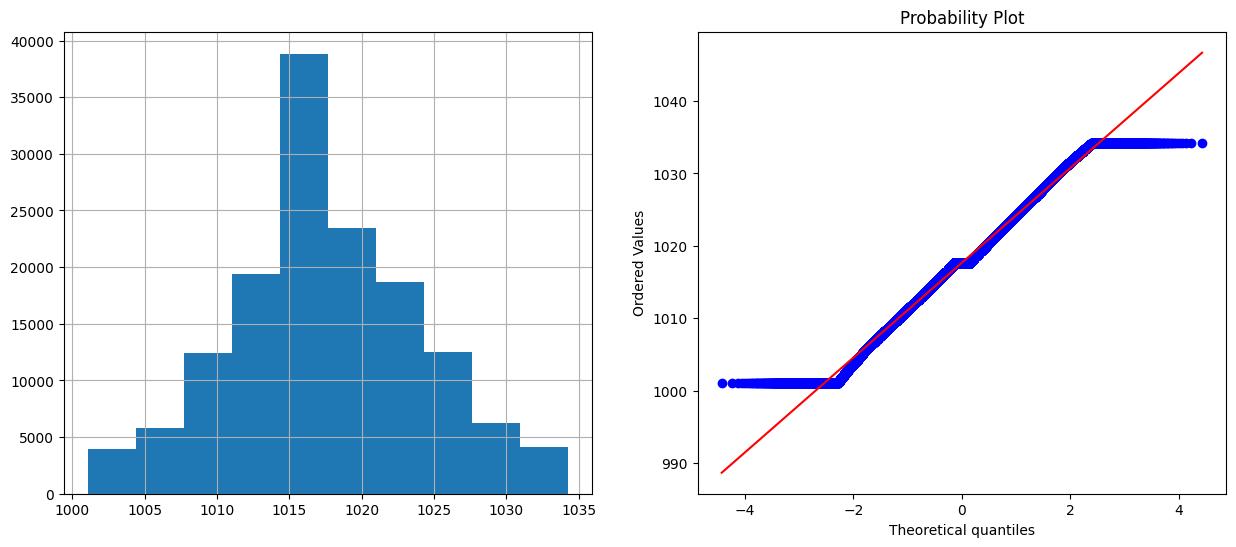

Pressure3pm


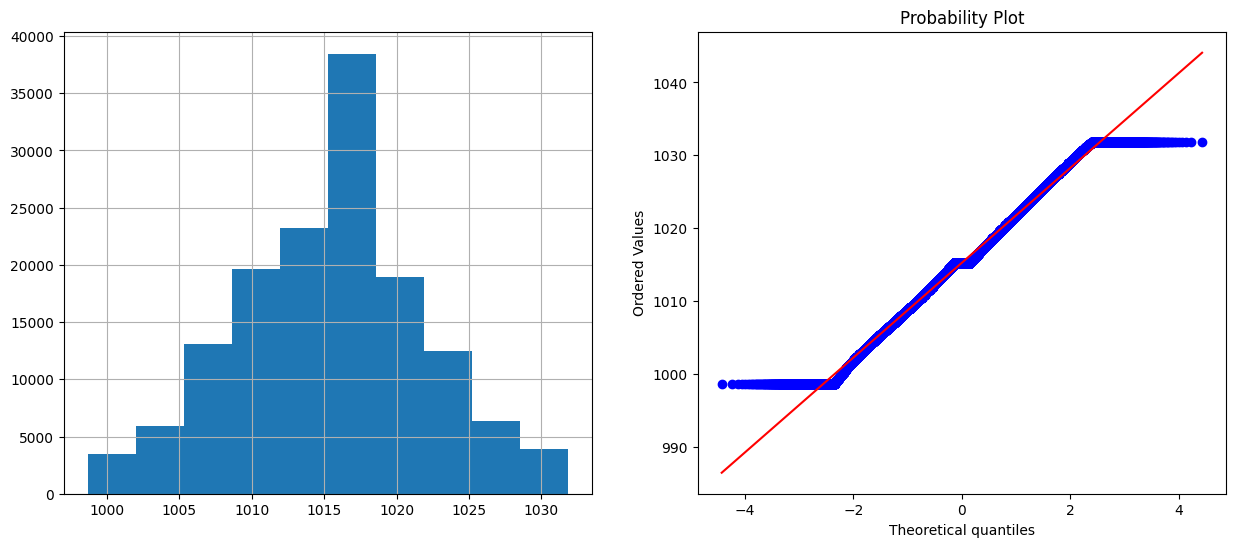

Temp9am


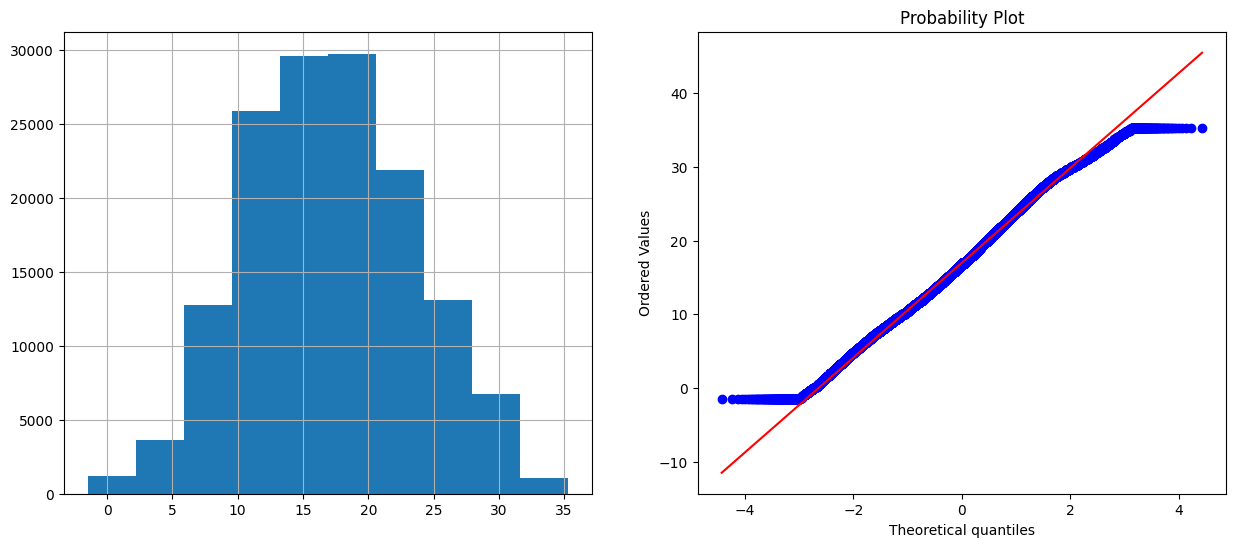

Temp3pm


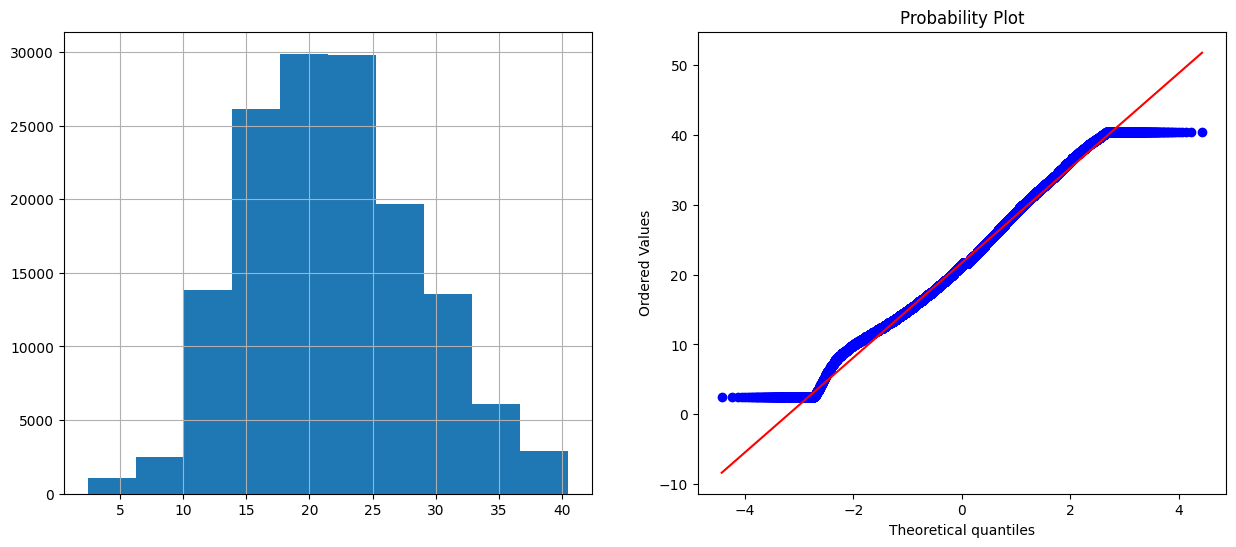

Latitude


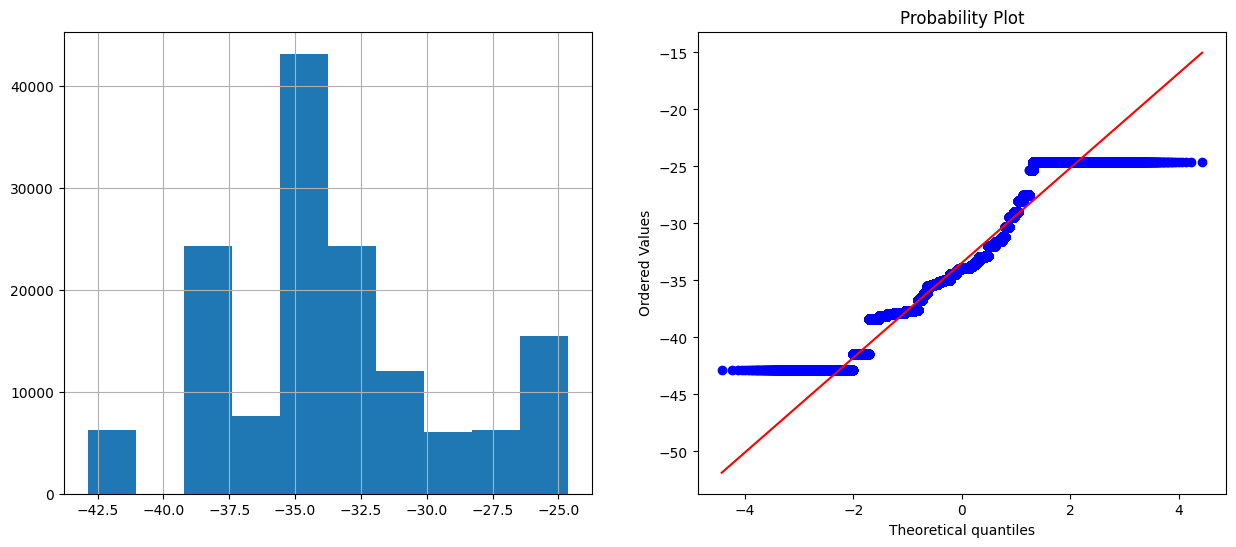

Longitude


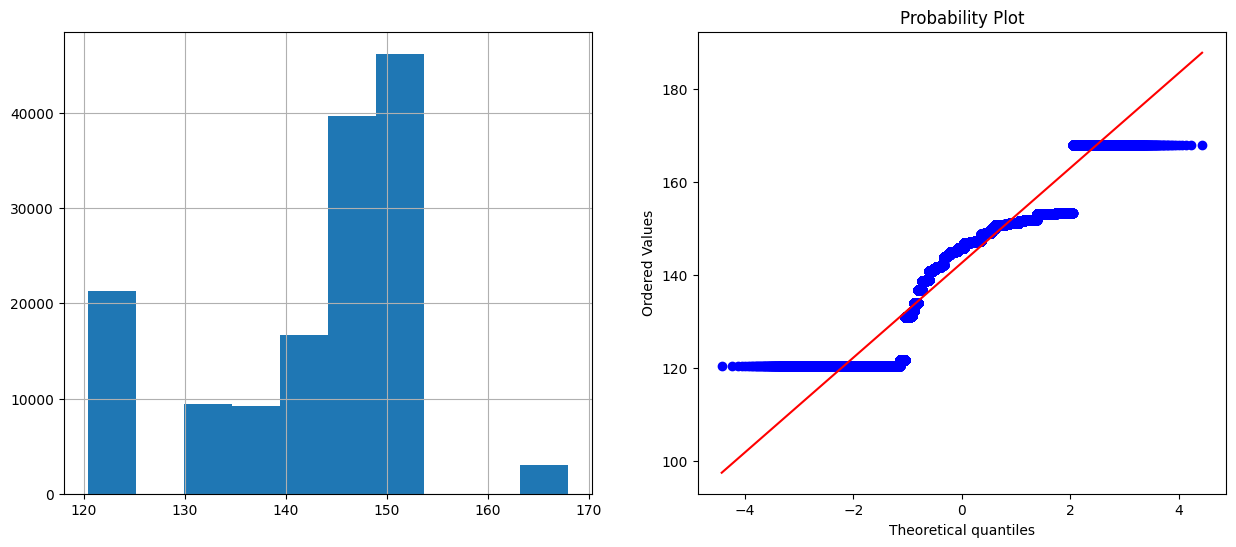

In [61]:
for feature in cont_vars:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm', plot=plt)
    plt.show()

In [62]:
#df.to_csv("preprocessed_2.csv",index=False)

In [63]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,Date-month,Date-day
0,NaT,30,13.4,22.900000,0.6,5.468232,7.611178,4,44.00000,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,False,False,-36.073773,146.913526,NaN,NaN
1,NaT,30,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,False,False,-36.073773,146.913526,NaN,NaN
2,NaT,30,12.9,25.700000,0.0,5.468232,7.611178,5,46.00000,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,False,False,-36.073773,146.913526,NaN,NaN
3,NaT,30,9.2,28.000000,0.0,5.468232,7.611178,11,24.00000,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,False,False,-36.073773,146.913526,NaN,NaN
4,NaT,30,17.5,32.300000,1.0,5.468232,7.611178,4,41.00000,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,False,False,-36.073773,146.913526,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,NaT,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,13,13,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,False,False,-25.345554,131.036961,NaN,NaN
145456,NaT,49,3.6,25.300000,0.0,5.468232,7.611178,0,22.00000,13,2,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,False,False,-25.345554,131.036961,NaN,NaN
145457,NaT,49,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,13,3,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,False,False,-25.345554,131.036961,NaN,NaN
145458,NaT,49,7.8,27.000000,0.0,5.468232,7.611178,12,28.00000,11,2,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,False,False,-25.345554,131.036961,NaN,NaN


In [64]:

X=df.drop(["RainTomorrow","Date",'Date-month','Date-day'],axis=1)
Y=df["RainTomorrow"]

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 0)

In [66]:
from sklearn.impute import SimpleImputer
imp_X=SimpleImputer(strategy='median')
X_train_imp=imp_X.fit_transform(X_train)

X_train_imp=np.where(np.isinf(X_train_imp),np.nan,X_train_imp)
X_train_imp=imp_X.fit_transform(X_train_imp)

imp_Y=SimpleImputer(strategy='median')
Y_train_imp=imp_Y.fit_transform(Y_train.values.reshape(-1,1)).ravel()

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 0)

In [68]:
Y_train

22926      True
80735     False
121764    False
139821    False
1867       True
          ...  
41993     False
97639     False
95939     False
117952    False
43567     False
Name: RainTomorrow, Length: 116368, dtype: bool

In [69]:
sm=SMOTE(random_state=0)
X_train_res, Y_train_res=sm.fit_resample(X_train_imp,Y_train_imp)
print("no of class before fit{}".format(Counter(Y_train_imp)))
print("no of class after fit{}".format(Counter(Y_train_res)))

no of class before fitCounter({0.0: 90857, 1.0: 25511})
no of class after fitCounter({1.0: 90857, 0.0: 90857})


In [70]:
df.shape

(145460, 27)

In [71]:
cat=CatBoostClassifier(iterations=2000,verbose=200)
cat.fit(X_train, Y_train)                                        
Y_pred=cat.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Learning rate set to 0.041591
0:	learn: 0.6607158	total: 202ms	remaining: 6m 43s
200:	learn: 0.3323815	total: 4.03s	remaining: 36.1s
400:	learn: 0.3173782	total: 7.53s	remaining: 30s
600:	learn: 0.3069922	total: 11.2s	remaining: 26.1s
800:	learn: 0.2988197	total: 14.6s	remaining: 21.9s
1000:	learn: 0.2917702	total: 18s	remaining: 18s
1200:	learn: 0.2857767	total: 21.3s	remaining: 14.2s
1400:	learn: 0.2800772	total: 24.7s	remaining: 10.5s
1600:	learn: 0.2749194	total: 28s	remaining: 6.97s
1800:	learn: 0.2699488	total: 31.3s	remaining: 3.46s
1999:	learn: 0.2652583	total: 34.5s	remaining: 0us
[[21594  1132]
 [ 2830  3536]]
0.7574978577549272
0.8638113570741097
              precision    recall  f1-score   support

       False       0.88      0.95      0.92     22726
        True       0.76      0.56      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [72]:
#metrics.plot_roc_curve(cat, X_test, Y_test)
#metrics.roc_auc_score(Y_test, Y_pred, average=None)  #remove comment when necessary
joblib.dump(cat, "./models/cat.pkl")

['./models/cat.pkl']

In [73]:
rf=RandomForestClassifier()
rf.fit(X_train_res,Y_train_res)
#print("NaN or Infinite values in X_test: {}".format(np.isnan(X_test).sum().sum() + np.isinf(X_test).sum().sum()))

RandomForestClassifier()

In [74]:
print("NaN or Infinite values in X_test: {}".format(np.isnan(X_test).sum().sum() + np.isinf(X_test).sum().sum()))

NaN or Infinite values in X_test: 0


In [75]:
imp_X_test=SimpleImputer(strategy="median")
X_test_imp=imp_X_test.fit_transform(X_test)

In [88]:
Y_pred1=rf.predict(X_test_imp)
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))
print(accuracy_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))
#metrics.plot_roc_curve(rf,X_test_imp,Y_test)
metrics.roc_auc_score(Y_test,Y_pred1,average=None)
joblib.dump(rf, "./models/rf.pkl")

[[20923  1803]
 [ 2483  3883]]
0.6829053816391136
0.8526742747146981
              precision    recall  f1-score   support

       False       0.89      0.92      0.91     22726
        True       0.68      0.61      0.64      6366

    accuracy                           0.85     29092
   macro avg       0.79      0.77      0.78     29092
weighted avg       0.85      0.85      0.85     29092



['./models/rf.pkl']

In [77]:
logreg=LogisticRegression()
logreg.fit(X_train_res,Y_train_res)
Y_pred2=logreg.predict(X_test_imp)
print(confusion_matrix(Y_test,Y_pred2))
print(accuracy_score(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))
#metrics.plot_roc_curve(logreg,X_test_imp,Y_test)
metrics.roc_auc_score(Y_test,Y_pred2,average=None)
joblib.dump(logreg, "./models/logreg.pkl")

[[17799  4927]
 [ 1539  4827]]
0.7777395847655713
              precision    recall  f1-score   support

       False       0.92      0.78      0.85     22726
        True       0.49      0.76      0.60      6366

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



d:\CB\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['./models/logreg.pkl']

In [91]:
gnb=GaussianNB()
gnb.fit(X_train_res,Y_train_res)
Y_pred3=gnb.predict(X_test_imp)
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))
print(accuracy_score(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))
#metrics.plot_roc_curve(gnb,X_test_imp,Y_test)
metrics.roc_auc_score(Y_test,Y_pred,average=None)
joblib.dump(gnb, "./models/gnb.pkl")

[[16994  5732]
 [ 1647  4719]]
0.45153573820687015
0.7463563866355012
              precision    recall  f1-score   support

       False       0.91      0.75      0.82     22726
        True       0.45      0.74      0.56      6366

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.69     29092
weighted avg       0.81      0.75      0.76     29092



['./models/gnb.pkl']

In [79]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res,Y_train_res)
Y_pred4=knn.predict(X_test_imp)
print(confusion_matrix(Y_test,Y_pred4))
print(accuracy_score(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))
#metrics.plot_roc_curve(knn,X_test_imp,Y_test)
metrics.roc_auc_score(Y_test,Y_pred4)
joblib.dump(knn, "./models/knn.pkl")

[[17907  4819]
 [ 1852  4514]]
0.7706929740134745
              precision    recall  f1-score   support

       False       0.91      0.79      0.84     22726
        True       0.48      0.71      0.58      6366

    accuracy                           0.77     29092
   macro avg       0.69      0.75      0.71     29092
weighted avg       0.81      0.77      0.78     29092



['./models/knn.pkl']

In [80]:
xgb=XGBClassifier()
xgb.fit(X_train_res,Y_train_res)
Y_pred5=xgb.predict(X_test_imp)
print(confusion_matrix(Y_test,Y_pred5))
print(accuracy_score(Y_test,Y_pred5))
print(classification_report(Y_test,Y_pred5))
#metrics.plot_roc_curve(xgb,X_test_imp,Y_test)
metrics.roc_auc_score(Y_test,Y_pred5,average=None)
joblib.dump(xgb, "./models/xgb.pkl")

[[21325  1401]
 [ 2728  3638]]
0.8580709473394748
              precision    recall  f1-score   support

       False       0.89      0.94      0.91     22726
        True       0.72      0.57      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



['./models/xgb.pkl']

In [81]:
'''svc=SVC()
svc.fit(X_train_res,Y_train_res)
Y_pred6=svc.predict(X_test_imp)
print(confusion_matrix(Y_test,Y_pred6))
print(accuracy_score(Y_test,Y_pred6))
print(classification_report(Y_test,Y_pred6))
metrics.plot_roc_curve(svc,X_test_imp,Y_test)
metrics.roc_auc_score(Y_test,Y_pred5,average=None)'''


'svc=SVC()\nsvc.fit(X_train_res,Y_train_res)\nY_pred6=svc.predict(X_test_imp)\nprint(confusion_matrix(Y_test,Y_pred6))\nprint(accuracy_score(Y_test,Y_pred6))\nprint(classification_report(Y_test,Y_pred6))\nmetrics.plot_roc_curve(svc,X_test_imp,Y_test)\nmetrics.roc_auc_score(Y_test,Y_pred5,average=None)'

In [82]:
'''joblib.dump(cat, "./models/cat.pkl")
joblib.dump(rf, "./models/rf.pkl")
joblib.dump(logreg, "./models/logreg.pkl")
joblib.dump(gnb, "./models/gnb.pkl")
joblib.dump(knn, "./models/knn.pkl")
joblib.dump(xgb, "./models/xgb.pkl")
#joblib.dump(svc, "./models/svc.pkl")'''

'joblib.dump(cat, "./models/cat.pkl")\njoblib.dump(rf, "./models/rf.pkl")\njoblib.dump(logreg, "./models/logreg.pkl")\njoblib.dump(gnb, "./models/gnb.pkl")\njoblib.dump(knn, "./models/knn.pkl")\njoblib.dump(xgb, "./models/xgb.pkl")\n#joblib.dump(svc, "./models/svc.pkl")'

In [83]:
df[(df['Evaporation']==2) & (df['Sunshine']==23)]


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,Date-month,Date-day


In [84]:
df.isnull().sum()

Date             145460
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          0
Latitude              0
Longitude             0
Date-month       145460
Date-day         145460
dtype: int64